In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install polars missingno pycountry pycountry_convert --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 21.5 MB/s eta 0:00:00


In [ ]:
!pip install itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00


In [ ]:
import polars as pl
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import itables
from itables import show
import pycountry
import pycountry_convert as pc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#hits = pl.read_csv('/content/drive/MyDrive/Colab Notebooks/study/data/ga_hits.csv')
# hits = pl.read_csv('/content/drive/MyDrive/mephi_ml/hackaton/data/ga_hits.csv')
hits = pl.read_csv('/content/drive/MyDrive/Colab Notebooks/study/data/ga_hits.csv') # Даша
# hits = pl.read_parquet('/content/drive/MyDrive/mephi_ml/Hack/ga_hits.parquet')

In [ ]:
#sessions = pl.read_csv('/content/drive/MyDrive/Colab Notebooks/study/data/ga_sessions.csv', schema_overrides={"client_id": pl.String})
# sessions = pl.read_csv('/content/drive/MyDrive/mephi_ml/hackaton/data/ga_sessions.csv', schema_overrides={"client_id": pl.String})
sessions = pl.read_csv('/content/drive/MyDrive/Colab Notebooks/study/data/ga_sessions.csv', schema_overrides={"client_id": pl.String})
# sessions = pl.read_csv('/content/drive/MyDrive/mephi_ml/Hack/ga_sessions.csv', schema_overrides={"client_id": pl.String})

# Исследование датасетов

In [ ]:
sessions

shape: (1_860_042, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ device_sc ┆ device_br ┆ geo_count ┆ geo_city │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ reen_reso ┆ owser     ┆ ry        ┆ ---      │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ lution    ┆ ---       ┆ ---       ┆ str      │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ ---       ┆ str       ┆ str       ┆          │
│           ┆           ┆           ┆           ┆   ┆ str       ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 905543474 ┆ 210838270 ┆ 2021-11-2 ┆ 14:36:32  ┆ … ┆ 360x720   ┆ Chrome    ┆ Russia    ┆ Zlatoust │
│ 558993299 ┆ 0.1637753 ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 1.1637753 ┆ 791       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 792…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544597 ┆ 210838531 ┆ 2021-11-1 ┆ 08:21:30  ┆ … ┆ 385x854   ┆ Samsung   ┆ Russia    ┆ Moscow   │
│ 018549464 ┆ .16368672 ┆ 4         ┆           ┆   ┆           ┆ Internet  ┆           ┆          │
│ .16368672 ┆ 88        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 90.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ 360x720   ┆ Chrome    ┆ Russia    ┆ Krasnoya │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆           ┆           ┆           ┆ rsk      │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544704 ┆ 210838556 ┆ 2021-05-2 ┆ 05:00:00  ┆ … ┆ 393x786   ┆ Chrome    ┆ Russia    ┆ Moscow   │
│ 636077027 ┆ 4.1622255 ┆ 9         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2.1622255 ┆ 328       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 328…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544704 ┆ 210838556 ┆ 2021-05-2 ┆ 05:00:00  ┆ … ┆ 393x786   ┆ Chrome    ┆ Russia    ┆ Moscow   │
│ 636077027 ┆ 4.1622255 ┆ 9         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2.1622255 ┆ 328       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 345…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 905541558 ┆ 210837823 ┆ 2021-12-2 ┆ 10:48:25  ┆ … ┆ 1920x1080 ┆ Chrome    ┆ Russia    ┆ Moscow   │
│ 144826375 ┆ 8.1640159 ┆ 2         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2.1640159 ┆ 304       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 305…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905542113 ┆ 210837953 ┆ 2021-05-2 ┆ 08:00:00  ┆ … ┆ 390x844   ┆ Safari    ┆ Russia    ┆ Stavropo │
│ 052785818 ┆ 0.1622007 ┆ 6         ┆           ┆   ┆           ┆           ┆           ┆ l        │
│ 5.1622007 ┆ 305       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 305…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905542295 ┆ 210837995 ┆ 2021-11-1 ┆ 15:31:55  ┆ … ┆ 375x667   ┆ Safari    ┆ Russia    ┆ Moscow   │
│ 590393119 ┆ 5.1636979 ┆ 5         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 5.1636979 ┆ 515       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 515…      ┆           ┆           ┆ 

In [ ]:
hits

shape: (15_726_470, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ hit_date  ┆ hit_time  ┆ hit_numbe ┆ … ┆ event_cat ┆ event_act ┆ event_lab ┆ event_va │
│ d         ┆ ---       ┆ ---       ┆ r         ┆   ┆ egory     ┆ ion       ┆ el        ┆ lue      │
│ ---       ┆ str       ┆ f64       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆           ┆           ┆ i64       ┆   ┆ str       ┆ str       ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 563962307 ┆ 2021-12-2 ┆ 597864.0  ┆ 30        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 871272406 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 4.1640254 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 056…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 775035229 ┆ 2021-12-2 ┆ 597331.0  ┆ 41        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 496911505 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 9.1640271 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 109…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 885342191 ┆ 2021-12-2 ┆ 796252.0  ┆ 49        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 847998240 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ .16402358 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 142526202 ┆ 2021-12-2 ┆ 934292.0  ┆ 46        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 120934167 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ .16402110 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 14.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 345008610 ┆ 2021-12-2 ┆ 768741.0  ┆ 79        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 883747570 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 1.1640265 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 078…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 686615985 ┆ 2021-12-2 ┆ 810589.0  ┆ 43        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 891655961 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 7.1640270 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 865…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 731030458 ┆ 2021-12-2 ┆ 904927.0  ┆ 40        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 736446069 ┆ 3         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2.1640261 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 783…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 801370268 ┆ 2021-12-2 ┆ 2.172865e ┆ 43        ┆ … ┆ quiz      ┆ quiz_show ┆ null      ┆ null     │
│ 578431217 ┆ 3         ┆ 6         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 9.1640270 ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 195…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 802150555 ┆ 2021-12-2 ┆ 713325.0  ┆

In [ ]:
hits.null_count()

shape: (1, 11)
┌────────────┬──────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ session_id ┆ hit_date ┆ hit_time ┆ hit_numbe ┆ … ┆ event_cat ┆ event_act ┆ event_lab ┆ event_val │
│ ---        ┆ ---      ┆ ---      ┆ r         ┆   ┆ egory     ┆ ion       ┆ el        ┆ ue        │
│ u32        ┆ u32      ┆ u32      ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆          ┆          ┆ u32       ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0          ┆ 0        ┆ 9160322  ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 3760184   ┆ 15726470  │
└────────────┴──────────┴──────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

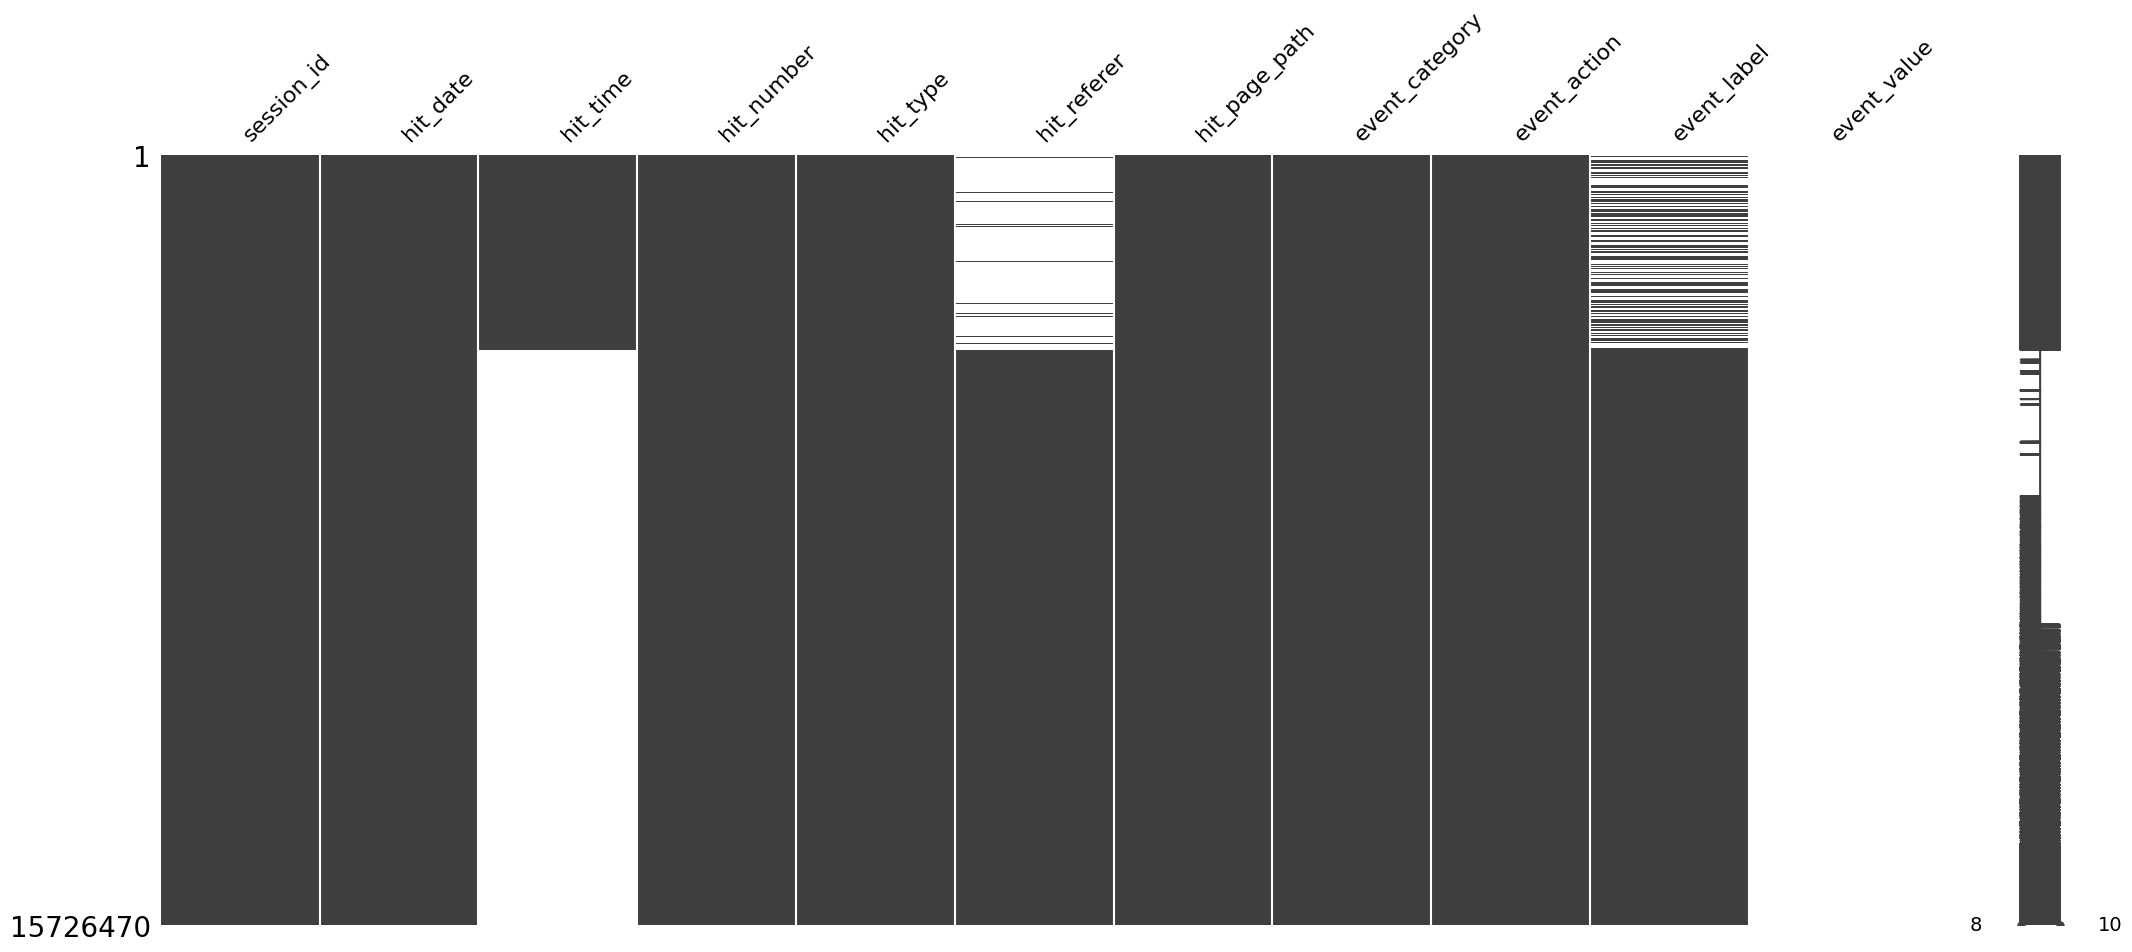

In [ ]:
msno.matrix(hits.to_pandas())
plt.show()

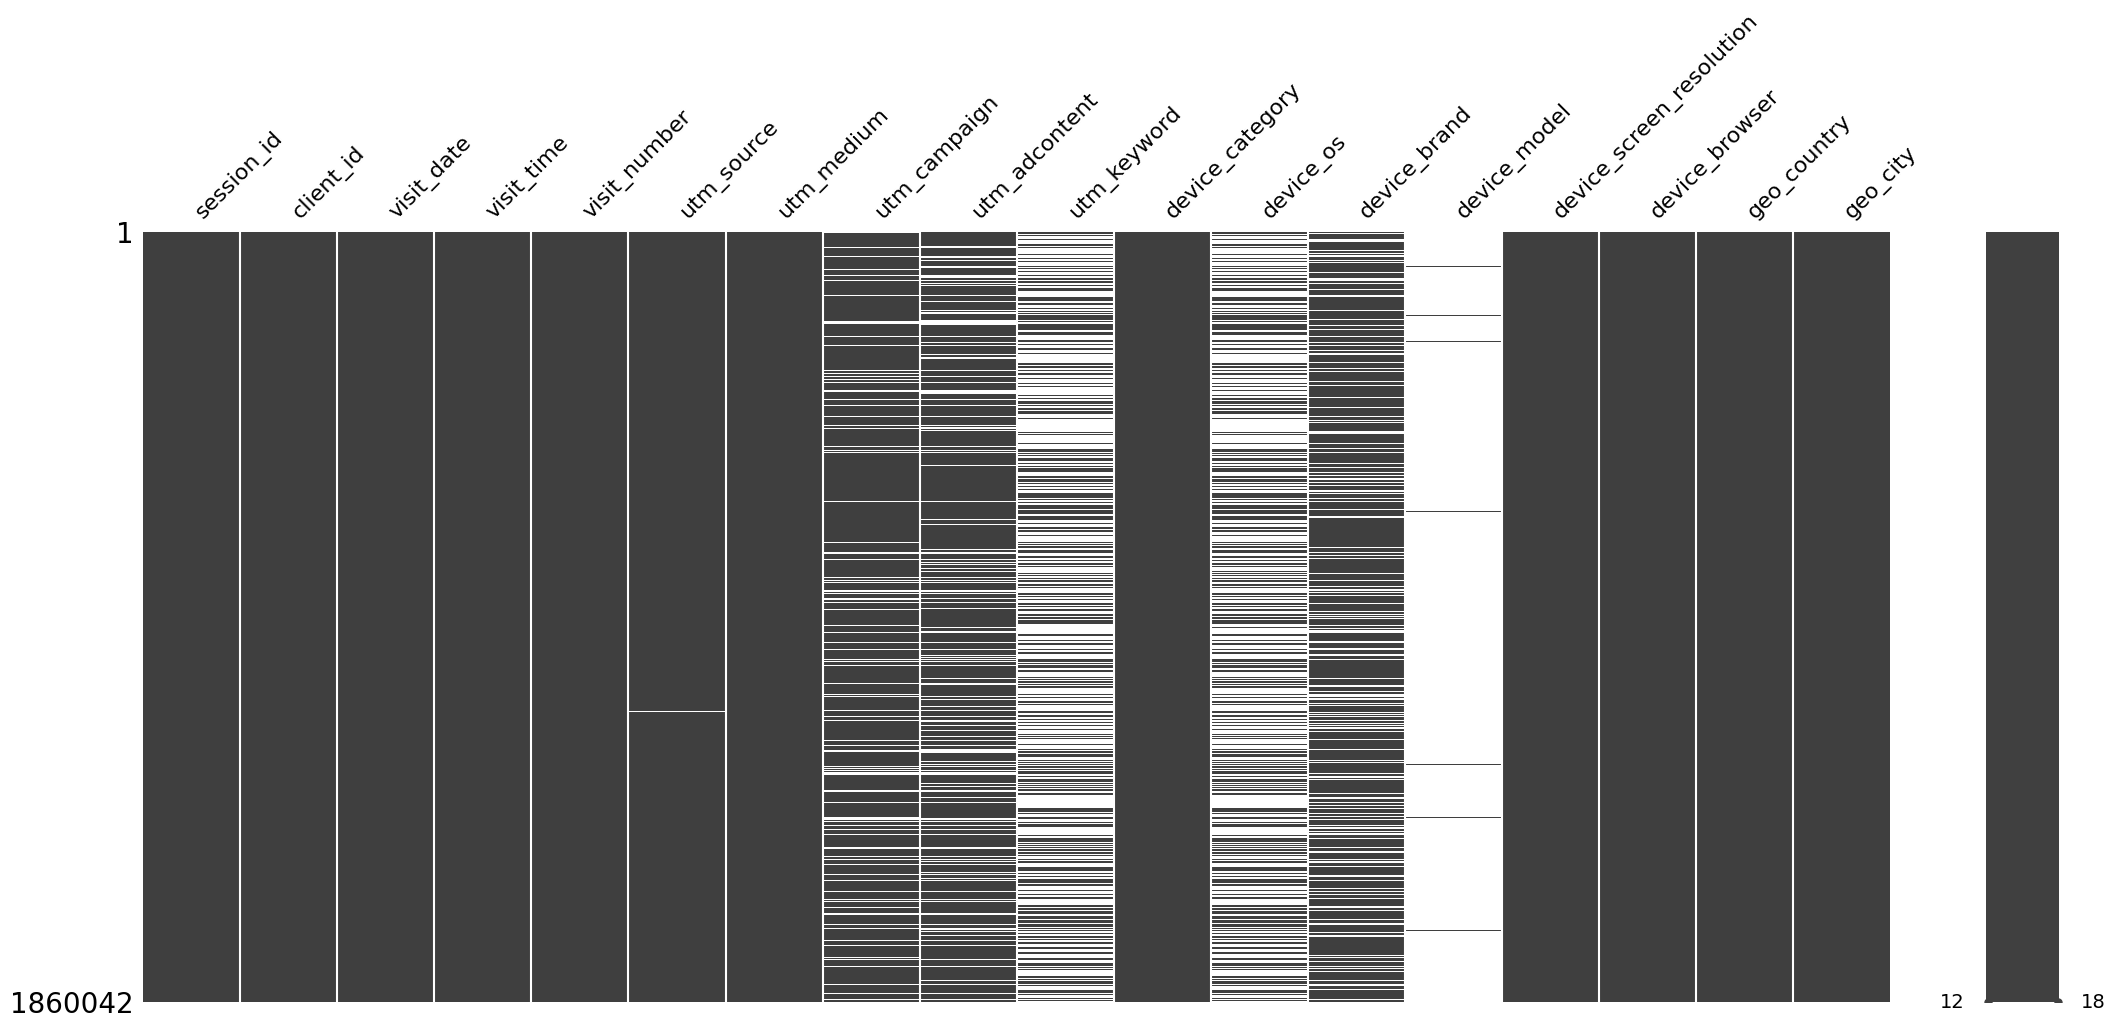

In [ ]:
msno.matrix(sessions.to_pandas())
plt.show()

In [ ]:
sessions.null_count()

shape: (1, 18)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ device_sc ┆ device_br ┆ geo_count ┆ geo_city │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ reen_reso ┆ owser     ┆ ry        ┆ ---      │
│ ---       ┆ u32       ┆ ---       ┆ ---       ┆   ┆ lution    ┆ ---       ┆ ---       ┆ u32      │
│ u32       ┆           ┆ u32       ┆ u32       ┆   ┆ ---       ┆ u32       ┆ u32       ┆          │
│           ┆           ┆           ┆           ┆   ┆ u32       ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 0         ┆ 0         ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

## Удаление лишних столбцов, получение новых столбцов

In [ ]:
hits_new = hits.clone().with_columns(
    pl.col('hit_date').str.to_datetime(format="%Y-%m-%d")
).with_columns(
    dayofweek=pl.col('hit_date').dt.weekday(),                                     #день недели
    is_holiday = pl.when(pl.col('hit_date').dt.weekday() > 5)
                  .then(1)
                  .otherwise(0),
    season=pl.when(                                                                     #сезон (зима, весна, лето, осень)
            (pl.col('hit_date').dt.month() < 3) | (pl.col('hit_date').dt.month() == 12)
        ).then(0).otherwise(
                 pl.when(
                     pl.col('hit_date').dt.month() < 6
                     ).then(1).otherwise(
                          pl.when(
                              pl.col('hit_date').dt.month() < 9
                          ).then(2).otherwise(3)
             )
        ),
    session_duration =
        pl.col('hit_time').max().over('session_id') - pl.col('hit_time').min().over('session_id')   #получение длительности одной сессии
).drop(
    'event_value', 'hit_referer'
)

In [ ]:
#Заполнение пропусков в важных для нас колонках
hits_new = hits_new.join(
    hits_new.group_by('event_action').agg(
        pl.col('event_label').mode().alias('event_label_mode')
    ).with_columns(
        event_label_mode = pl.col('event_label_mode').list.first()
    ).fill_null(
        hits_new['event_label'].mode()
    ),
    on='event_action',
    how='left'
).with_columns(
    pl.when(
        pl.col('event_label').is_null()
    ).then(
        pl.col('event_label_mode')
    ).otherwise(
        pl.col('event_label')
    ).alias('event_label')
).drop('event_label_mode')

In [ ]:
sessions_new = sessions.clone()
sessions_new = sessions_new.with_columns(
    pl.concat_str(
        ['visit_date', 'visit_time']
    ).alias('full_date')
).with_columns(
    pl.col('full_date').str.to_datetime(format="%Y-%m-%d %H:%M:%S")
).drop(
    'device_model', 'device_os', 'device_brand'
).filter(
    pl.col('geo_city') != '(not_set)'
).join(
    sessions_new.group_by('geo_city').len(),
    on='geo_city',
    how='left'
).filter(
    pl.col('len') > 1500
).drop('len').with_columns(
    dayofweek=pl.col('full_date').dt.weekday(),
    is_holiday = pl.when(pl.col('full_date').dt.weekday() > 5)
                  .then(1)
                  .otherwise(0),
    season=pl.when(
        (pl.col('full_date').dt.month() < 3) | (pl.col('full_date').dt.month() == 12)
        ).then(0).otherwise(
                 pl.when(
                     pl.col('full_date').dt.month() < 6
                     ).then(1).otherwise(
                          pl.when(
                              pl.col('full_date').dt.month() < 9
                          ).then(2).otherwise(3)
             )
      )
).with_columns(
    pl.col('utm_source').fill_null(
        pl.col('utm_source').mode()
    )
).with_columns(
    pl.when(pl.col('device_category') == 'mobile').then(1).otherwise(0).alias('is_mobile')
)

## Удаление дубликатов

In [ ]:
sessions_new.filter(sessions_new.is_duplicated())

shape: (0, 20)
┌────────────┬───────────┬────────────┬───────────┬───┬───────────┬───────────┬────────┬───────────┐
│ session_id ┆ client_id ┆ visit_date ┆ visit_tim ┆ … ┆ dayofweek ┆ is_holida ┆ season ┆ is_mobile │
│ ---        ┆ ---       ┆ ---        ┆ e         ┆   ┆ ---       ┆ y         ┆ ---    ┆ ---       │
│ str        ┆ str       ┆ str        ┆ ---       ┆   ┆ i8        ┆ ---       ┆ i32    ┆ i32       │
│            ┆           ┆            ┆ str       ┆   ┆           ┆ i32       ┆        ┆           │
╞════════════╪═══════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪════════╪═══════════╡
└────────────┴───────────┴────────────┴───────────┴───┴───────────┴───────────┴────────┴───────────┘

In [ ]:
sessions_new.filter(
    sessions_new.select(['session_id', 'visit_date', 'visit_number']).is_duplicated()
)

shape: (0, 20)
┌────────────┬───────────┬────────────┬───────────┬───┬───────────┬───────────┬────────┬───────────┐
│ session_id ┆ client_id ┆ visit_date ┆ visit_tim ┆ … ┆ dayofweek ┆ is_holida ┆ season ┆ is_mobile │
│ ---        ┆ ---       ┆ ---        ┆ e         ┆   ┆ ---       ┆ y         ┆ ---    ┆ ---       │
│ str        ┆ str       ┆ str        ┆ ---       ┆   ┆ i8        ┆ ---       ┆ i32    ┆ i32       │
│            ┆           ┆            ┆ str       ┆   ┆           ┆ i32       ┆        ┆           │
╞════════════╪═══════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪════════╪═══════════╡
└────────────┴───────────┴────────────┴───────────┴───┴───────────┴───────────┴────────┴───────────┘

In [ ]:
hits_new.filter(hits_new.is_duplicated())

shape: (0, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬───────────┬───────────┬────────┬───────────┐
│ session_id ┆ hit_date   ┆ hit_time ┆ hit_number ┆ … ┆ dayofweek ┆ is_holida ┆ season ┆ session_d │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆   ┆ ---       ┆ y         ┆ ---    ┆ uration   │
│ str        ┆ datetime[μ ┆ f64      ┆ i64        ┆   ┆ i8        ┆ ---       ┆ i32    ┆ ---       │
│            ┆ s]         ┆          ┆            ┆   ┆           ┆ i32       ┆        ┆ f64       │
╞════════════╪════════════╪══════════╪════════════╪═══╪═══════════╪═══════════╪════════╪═══════════╡
└────────────┴────────────┴──────────┴────────────┴───┴───────────┴───────────┴────────┴───────────┘

In [ ]:
#Удаление полных дубликатов
hits_new = hits_new.filter(~hits_new.is_duplicated())

In [ ]:
hits_new.filter(hits_new.select('session_id', 'hit_number').is_duplicated())

shape: (451_724, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬───────────┬───────────┬────────┬───────────┐
│ session_id ┆ hit_date   ┆ hit_time ┆ hit_number ┆ … ┆ dayofweek ┆ is_holida ┆ season ┆ session_d │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆   ┆ ---       ┆ y         ┆ ---    ┆ uration   │
│ str        ┆ datetime[μ ┆ f64      ┆ i64        ┆   ┆ i8        ┆ ---       ┆ i32    ┆ ---       │
│            ┆ s]         ┆          ┆            ┆   ┆           ┆ i32       ┆        ┆ f64       │
╞════════════╪════════════╪══════════╪════════════╪═══╪═══════════╪═══════════╪════════╪═══════════╡
│ 2482311934 ┆ 2021-09-22 ┆ 2963.0   ┆ 7          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 2967.0    │
│ 159544567. ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 1632297202 ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 2493081100 ┆ 2021-09-22 ┆ 102.0    ┆ 6          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 433.0     │
│ 797813030. ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 1632313646 ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 2605321305 ┆ 2021-09-22 ┆ 100.0    ┆ 3          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 684.0     │
│ 050539964. ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 1632331709 ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 2415139362 ┆ 2021-09-22 ┆ 2906.0   ┆ 7          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 2857.0    │
│ 909660821. ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 1632315035 ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 2439420818 ┆ 2021-09-22 ┆ 1323.0   ┆ 7          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 1297.0    │
│ 783702636. ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 1632341613 ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆ …          ┆ …        ┆ …          ┆ … ┆ …         ┆ …         ┆ …      ┆ …         │
│ 2543520150 ┆ 2021-09-22 ┆ 442.0    ┆ 5          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 755.0     │
│ 55612502.1 ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 632332373. ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 2692989178 ┆ 2021-09-22 ┆ 463.0    ┆ 3          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 174.0     │
│ 57516439.1 ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 632328602. ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 3176065023 ┆ 2021-09-22 ┆ 17.0     ┆ 3          ┆ … ┆ 3         ┆ 0         ┆ 3      ┆ 828.0     │
│ 89723268.1 ┆ 00:00:00   ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 632317574. ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ …          ┆            ┆          ┆            ┆   ┆           ┆           ┆        ┆           │
│ 3415437595 ┆ 2021-09-22 ┆ 388.0    ┆ 5

In [ ]:
#удаление дубликатов по айди сессии и номер действия
hits_new = hits_new.filter(~hits_new.select('session_id', 'hit_number').is_duplicated())

## Миллионики

In [ ]:
# по данным Росстата за 2024

million_cities = [
    "Moscow",
    "Saint Petersburg",
    "Novosibirsk",
    "Yekaterinburg",
    "Kazan",
    "Krasnoyarsk",
    "Nizhny Novgorod",
    "Chelyabinsk",
    "Ufa",
    "Samara",
    "Rostov-on-Don",
    "Krasnodar",
    "Omsk",
    "Voronezh",
    "Perm",
    "Volgograd"
]

In [ ]:
# признак миллионника только для РФ
sessions_new = sessions_new.with_columns(
    pl.when(
        (pl.col("geo_country") == "Russia") &
        (pl.col("geo_city").is_in(million_cities)
    ) )
    .then(1)
    .otherwise(0)
    .alias("is_million")
)

In [ ]:
sessions_new['is_million'].value_counts()

shape: (2, 2)
┌────────────┬─────────┐
│ is_million ┆ count   │
│ ---        ┆ ---     │
│ i32        ┆ u32     │
╞════════════╪═════════╡
│ 0          ┆ 365751  │
│ 1          ┆ 1364633 │
└────────────┴─────────┘

# Распределение значений

In [ ]:
hits_pandas = hits_new.to_pandas()
sessions_pandas = sessions_new.to_pandas()

full_table = pd.merge(
    sessions_pandas,
    hits_pandas.drop(columns=['is_holiday', 'dayofweek', 'season'], axis=1),
    on='session_id',
    how='left'
)

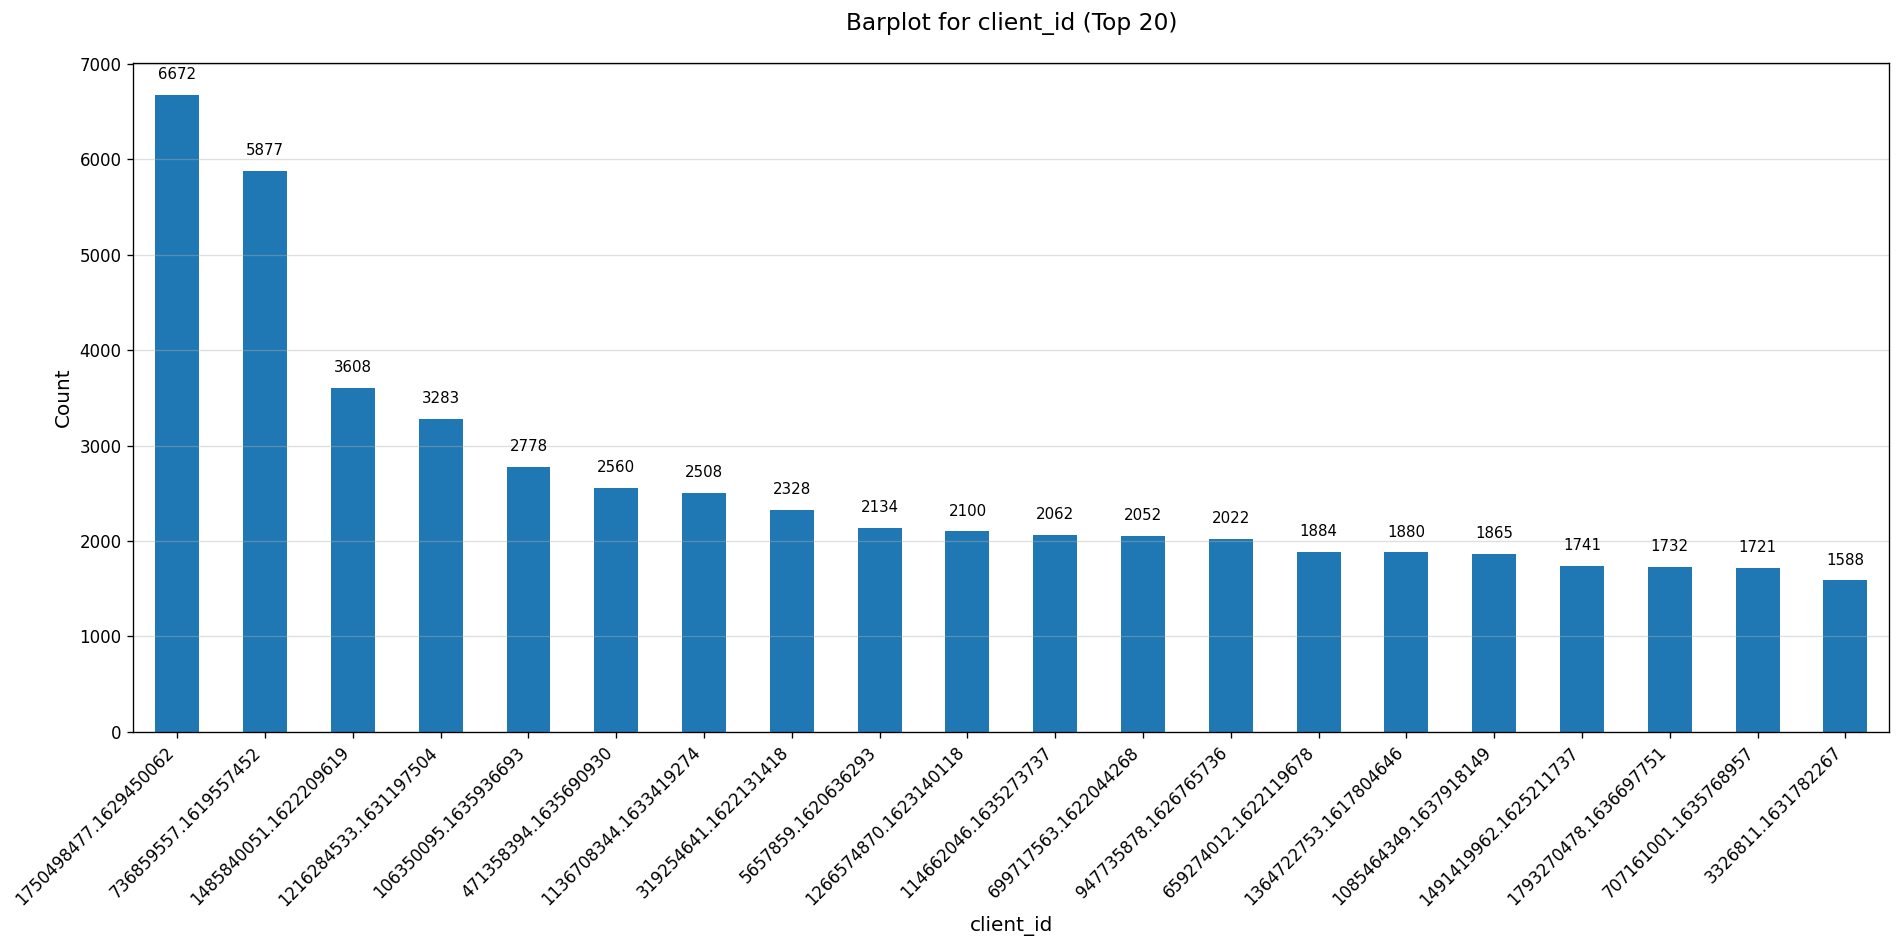

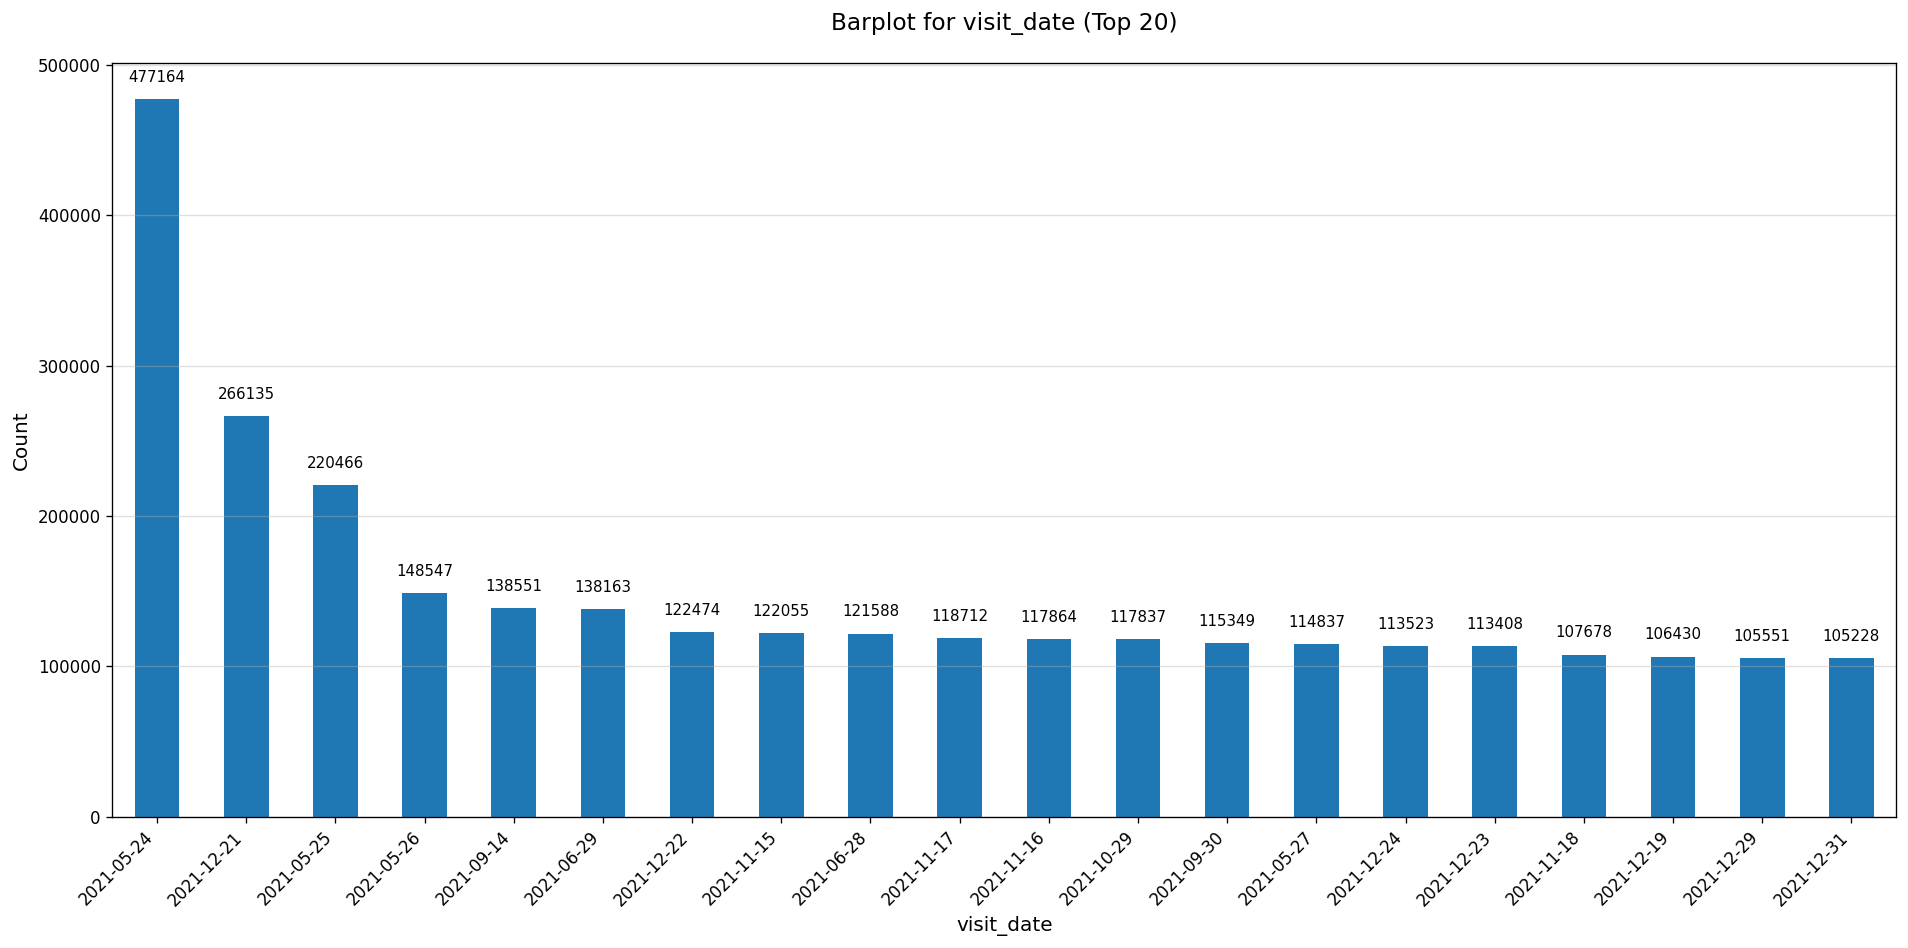

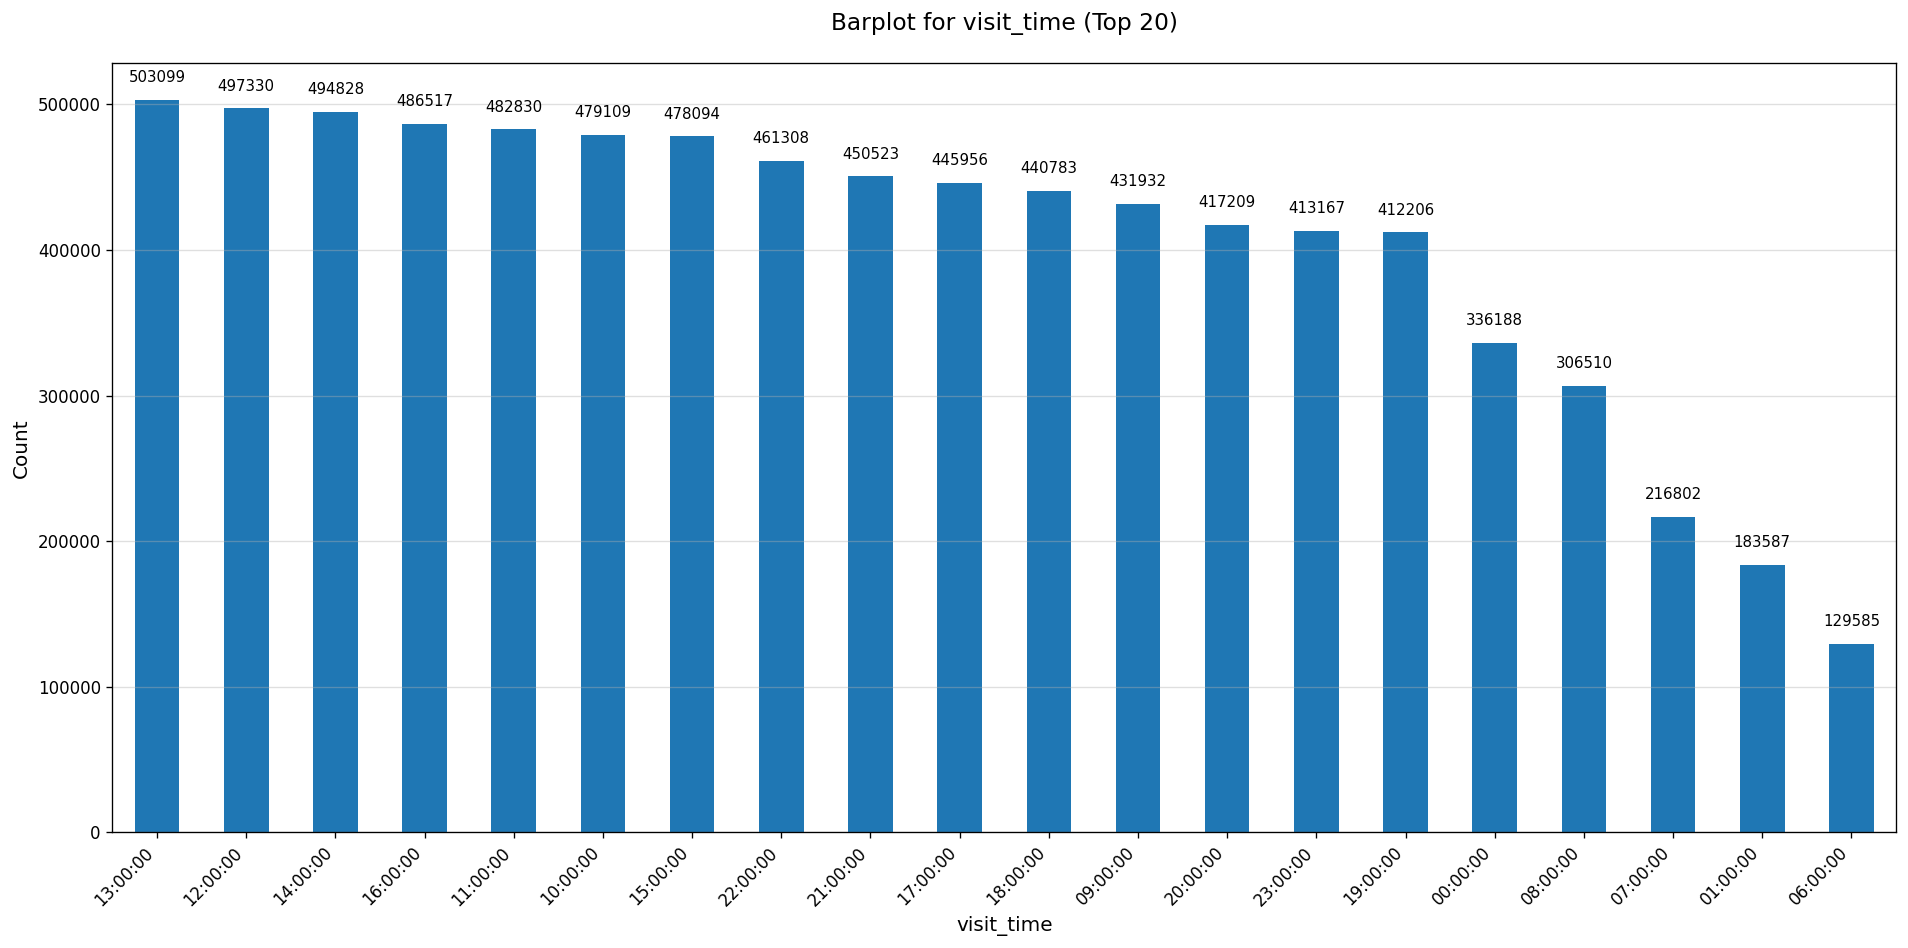

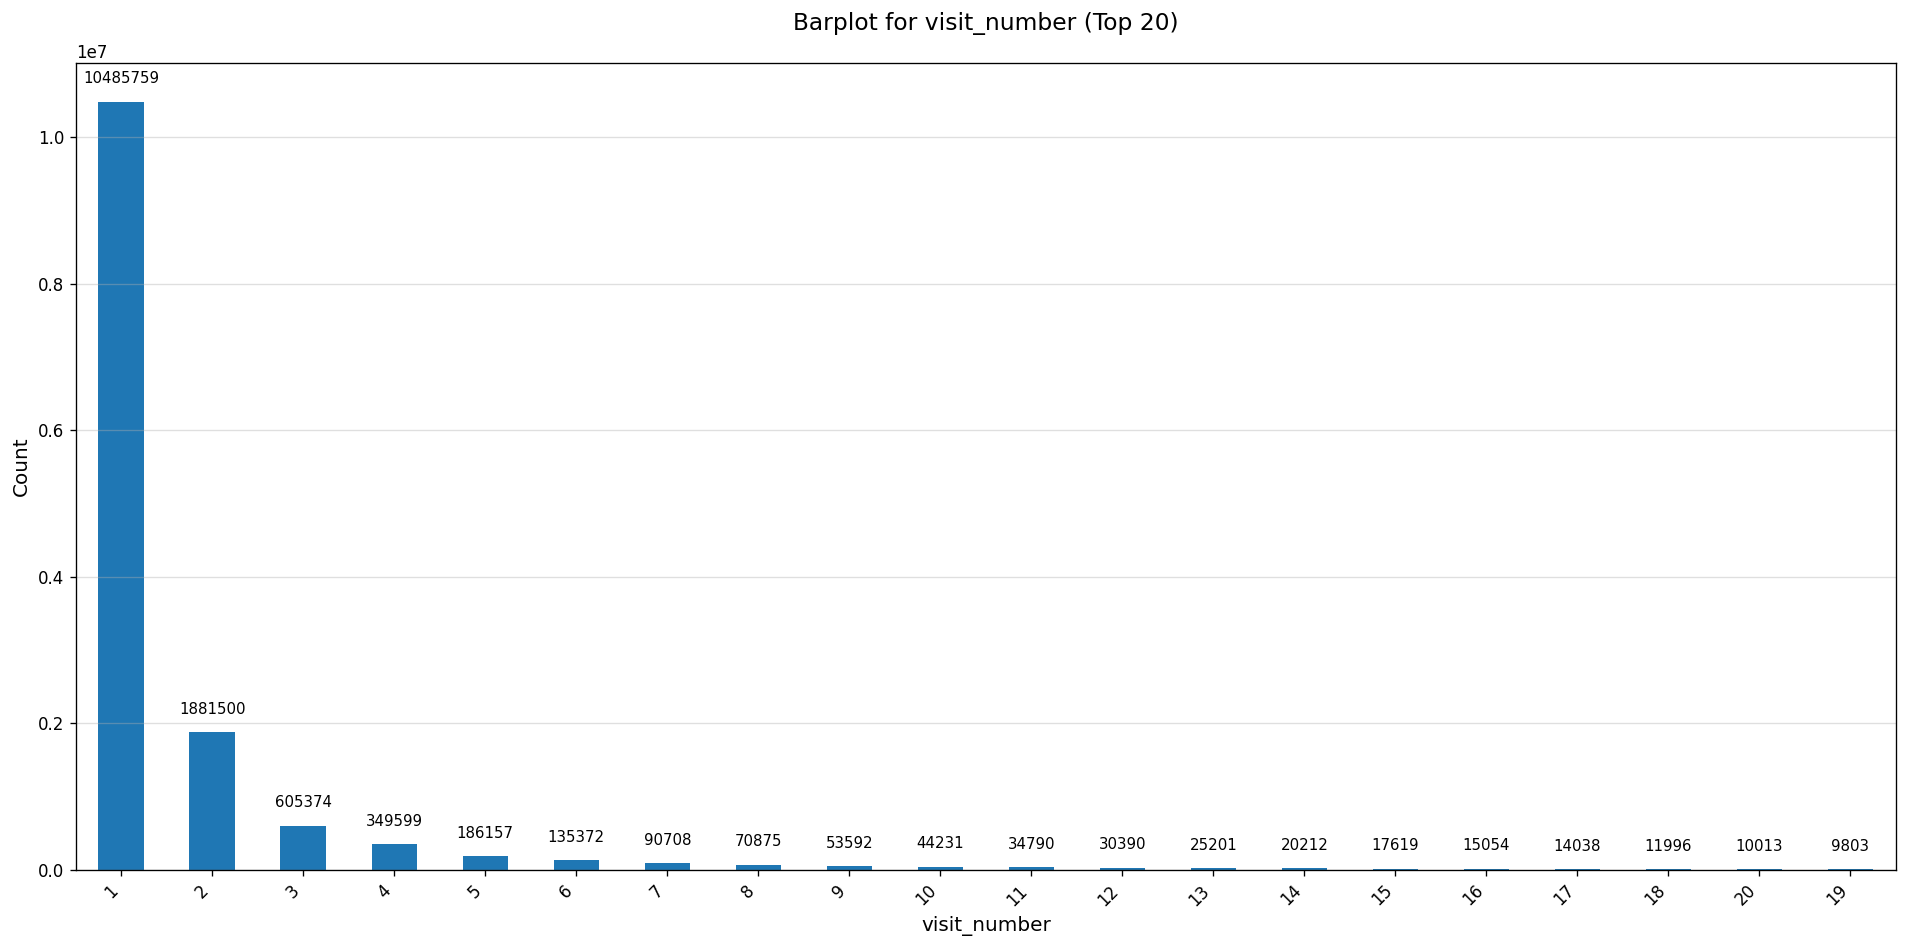

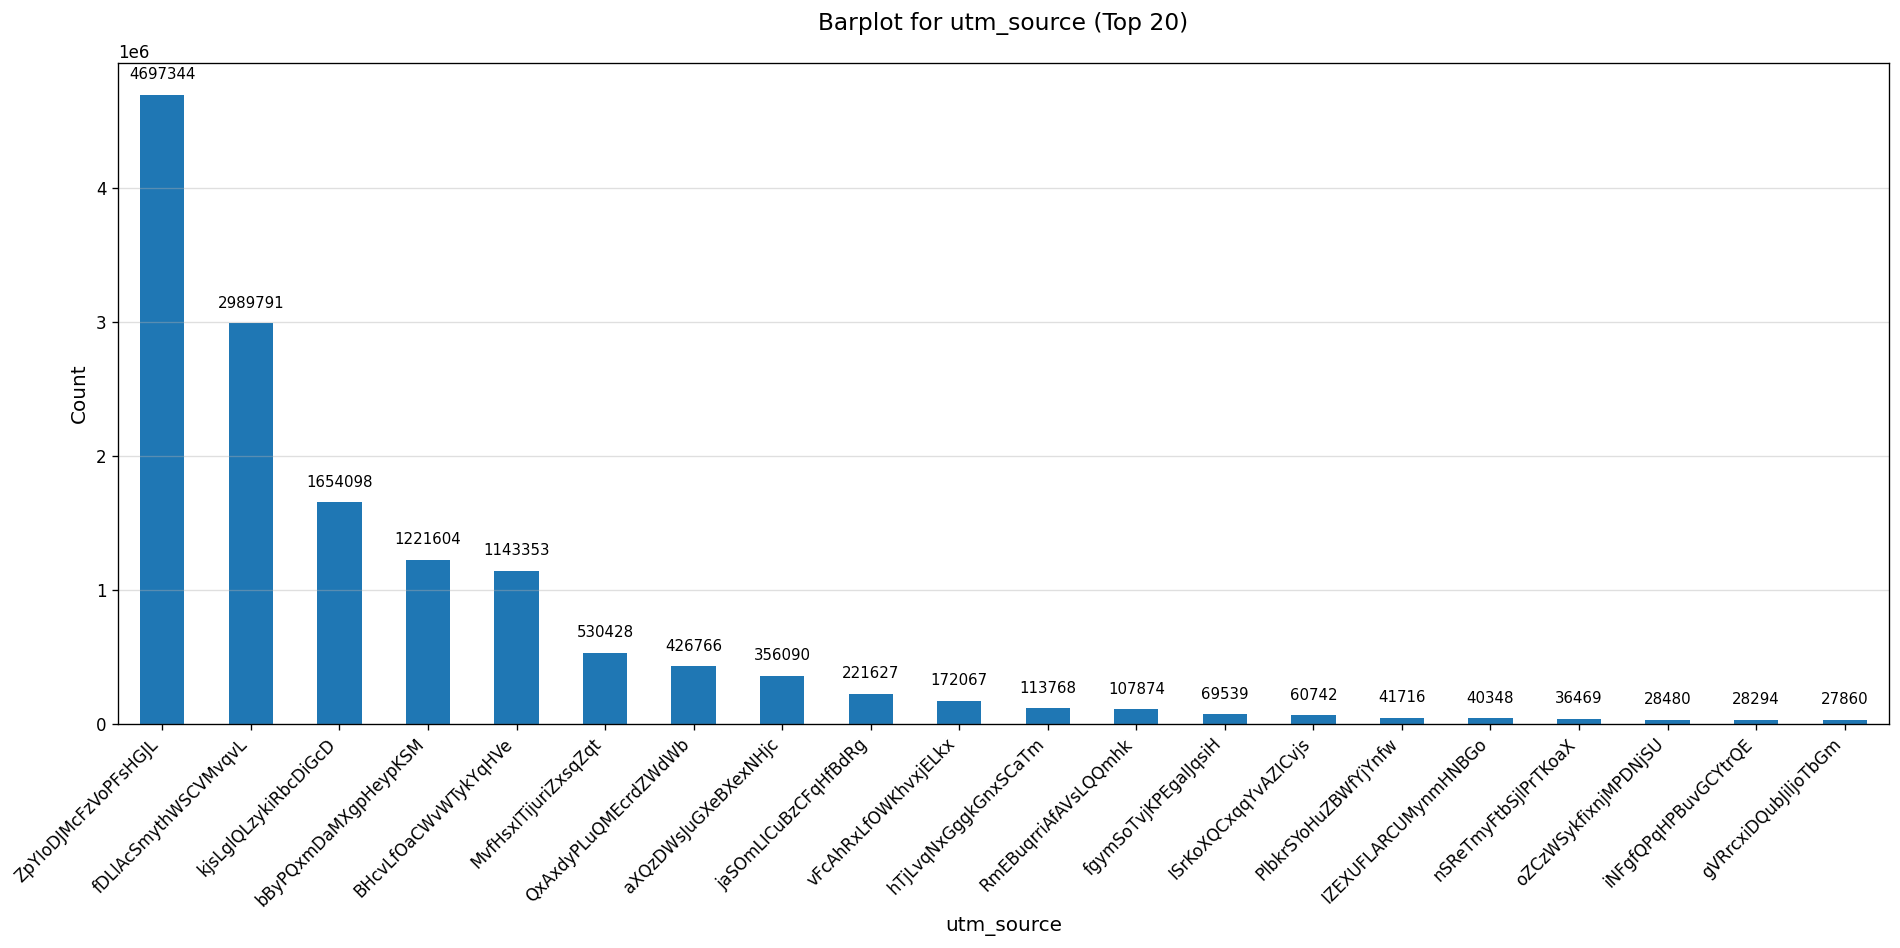

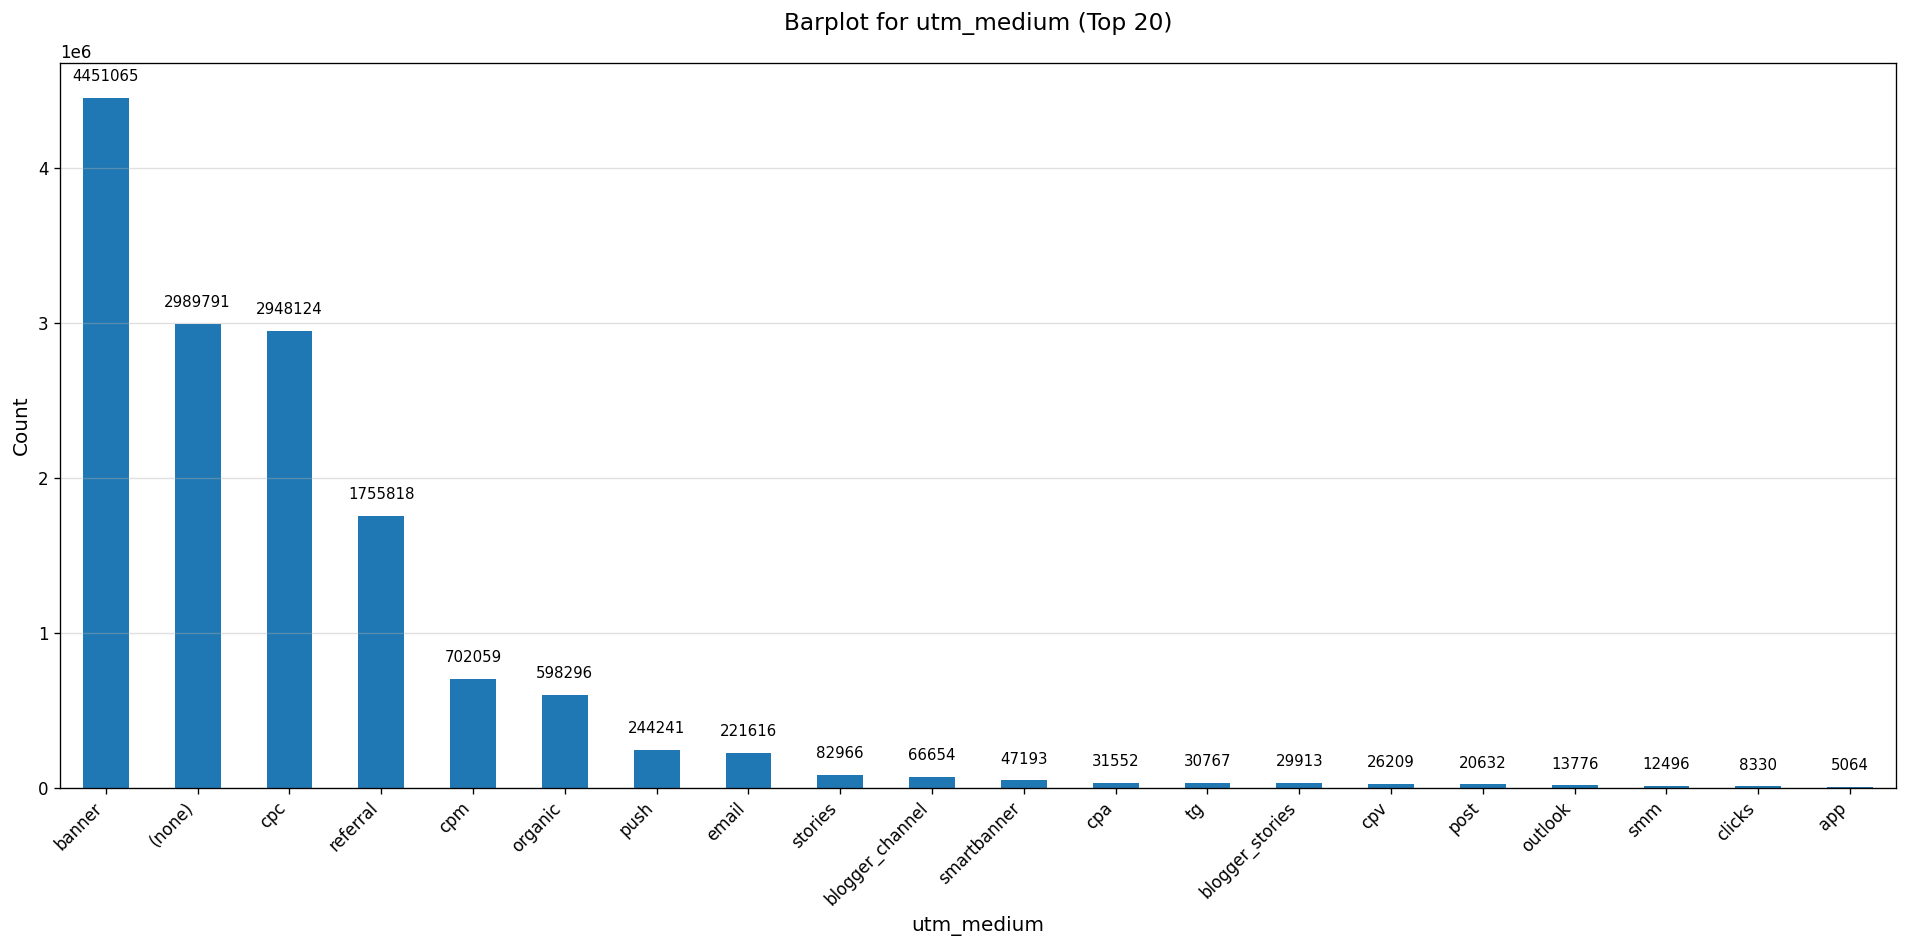

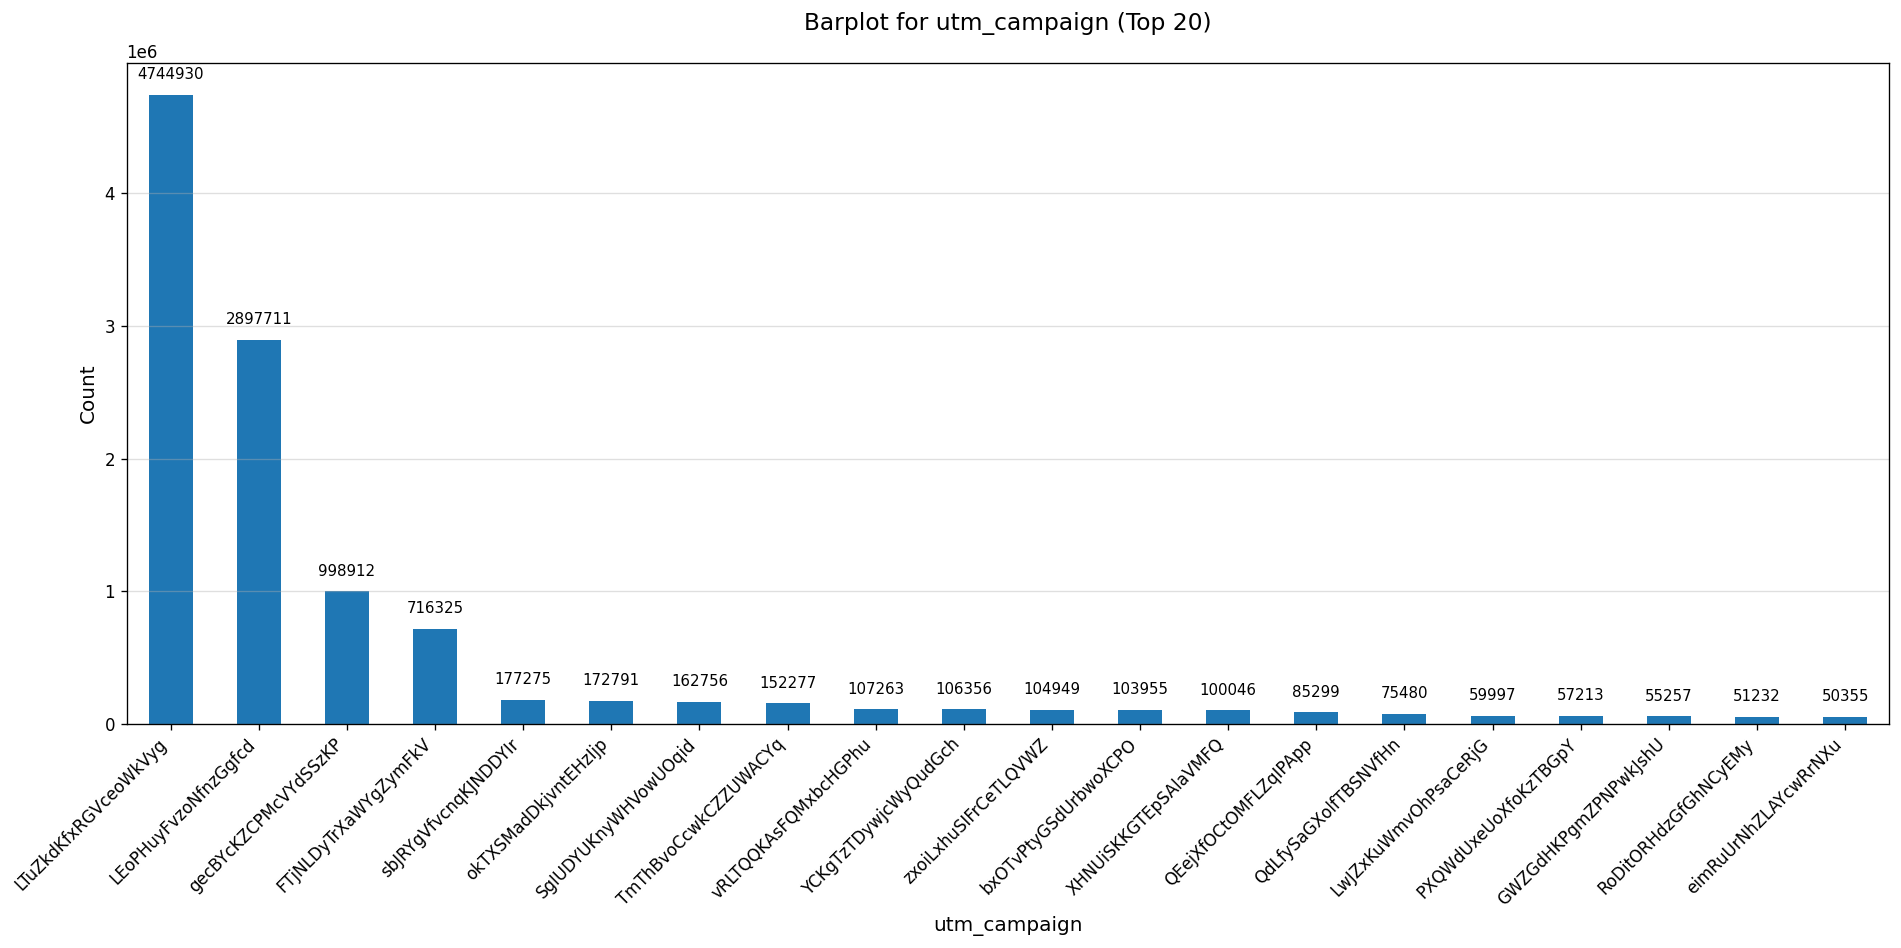

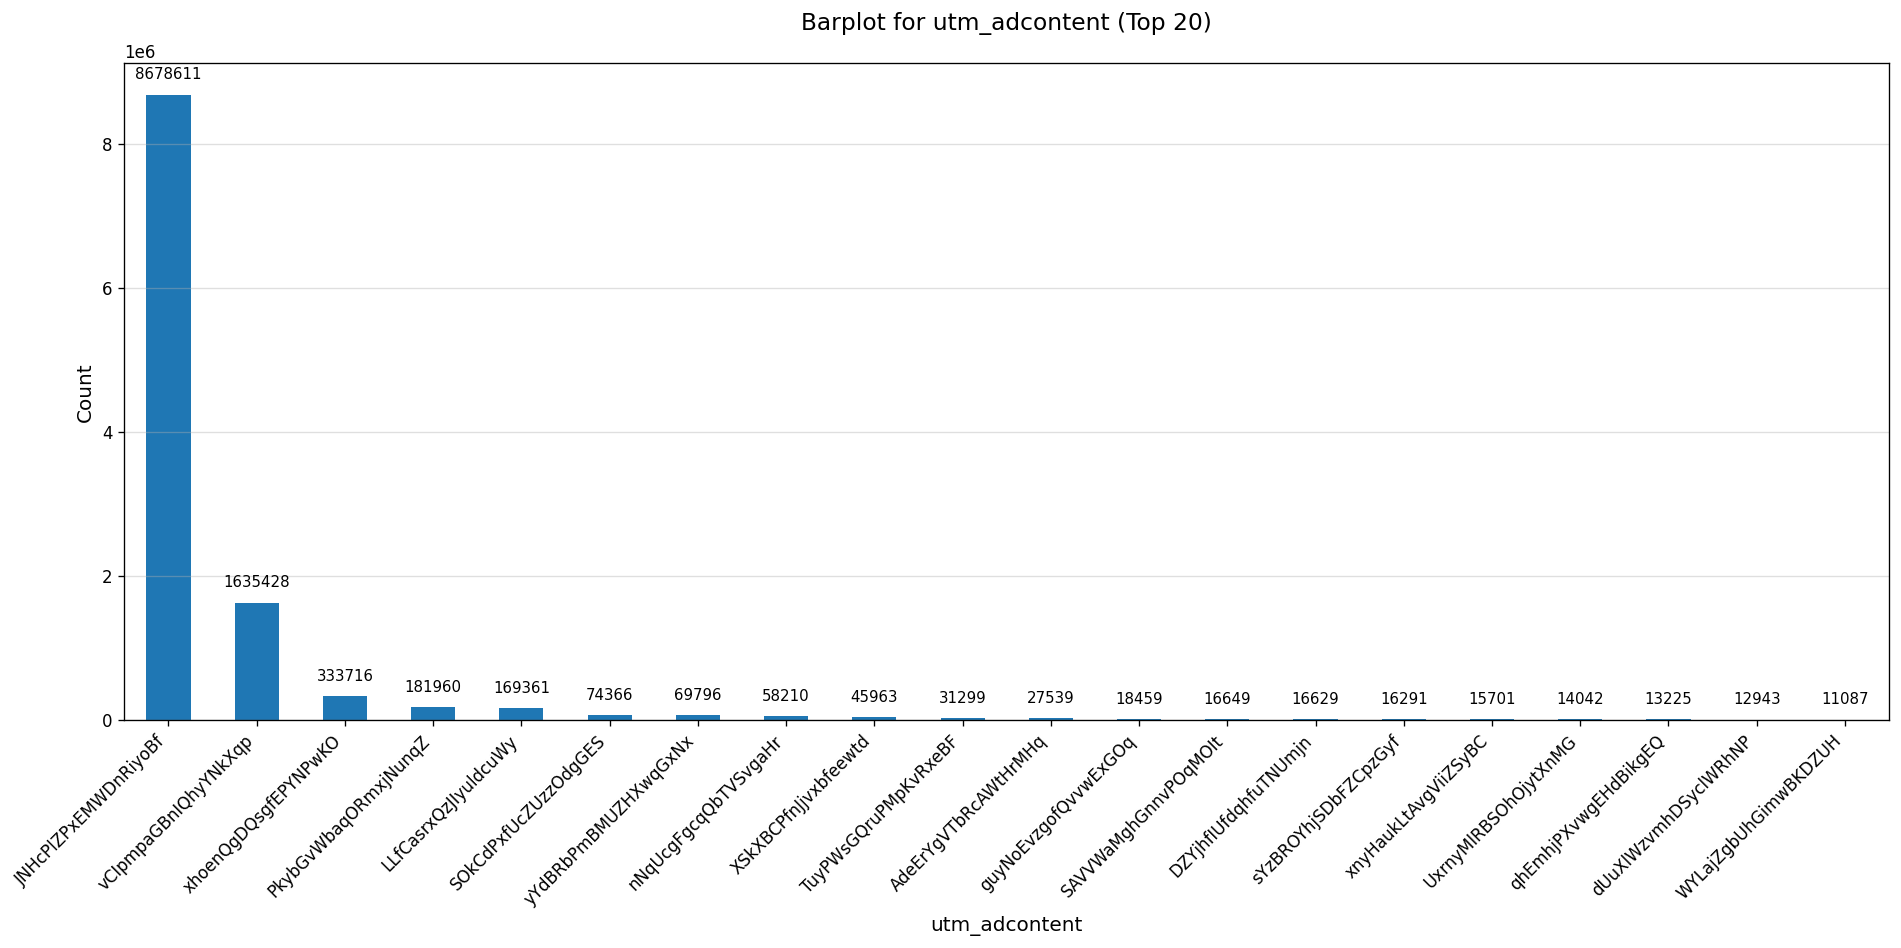

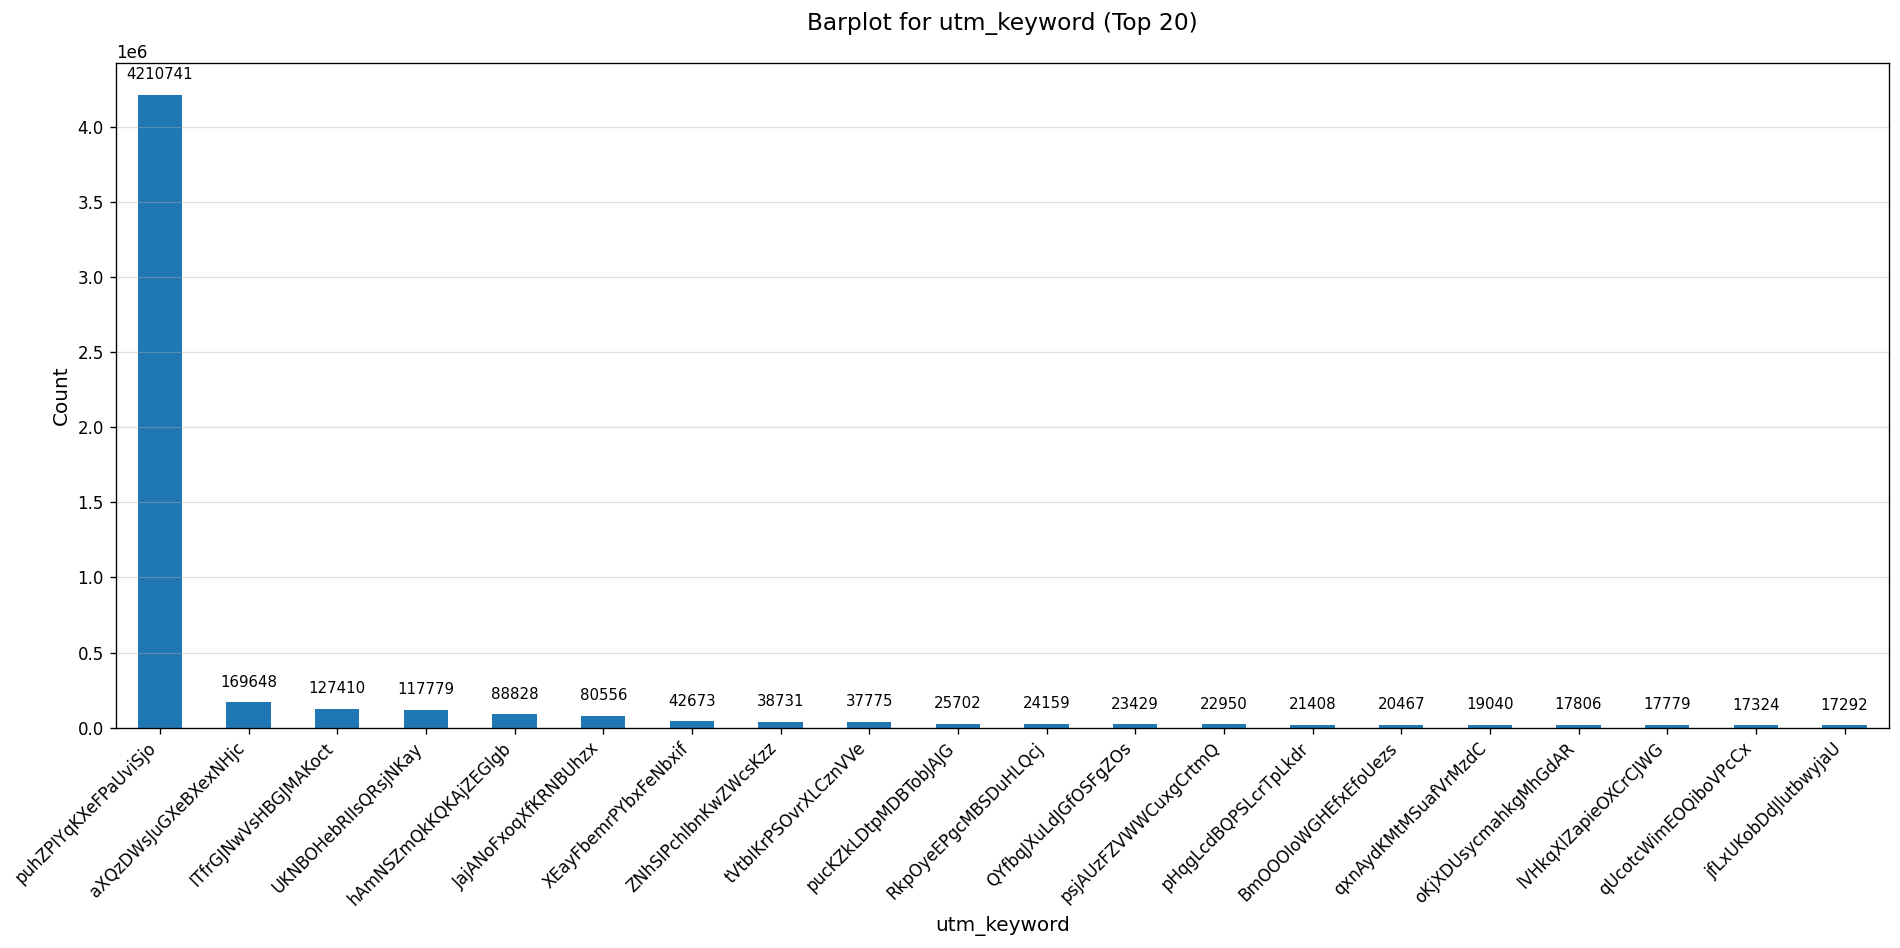

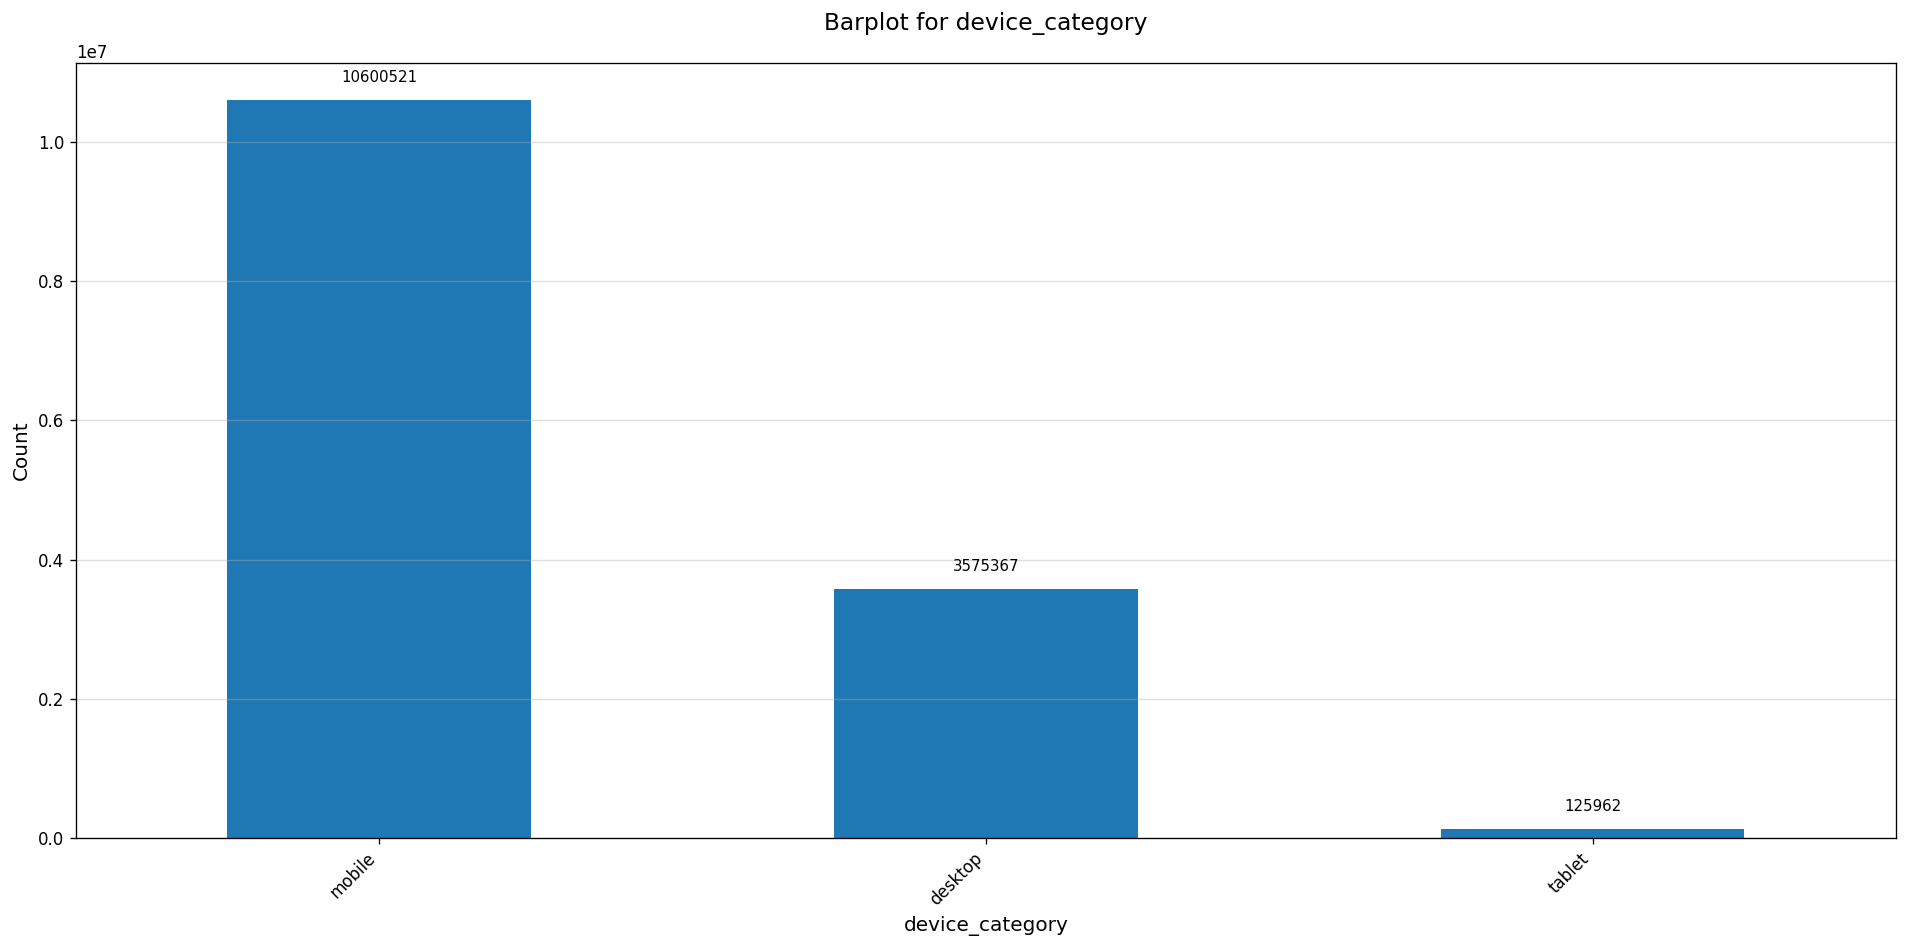

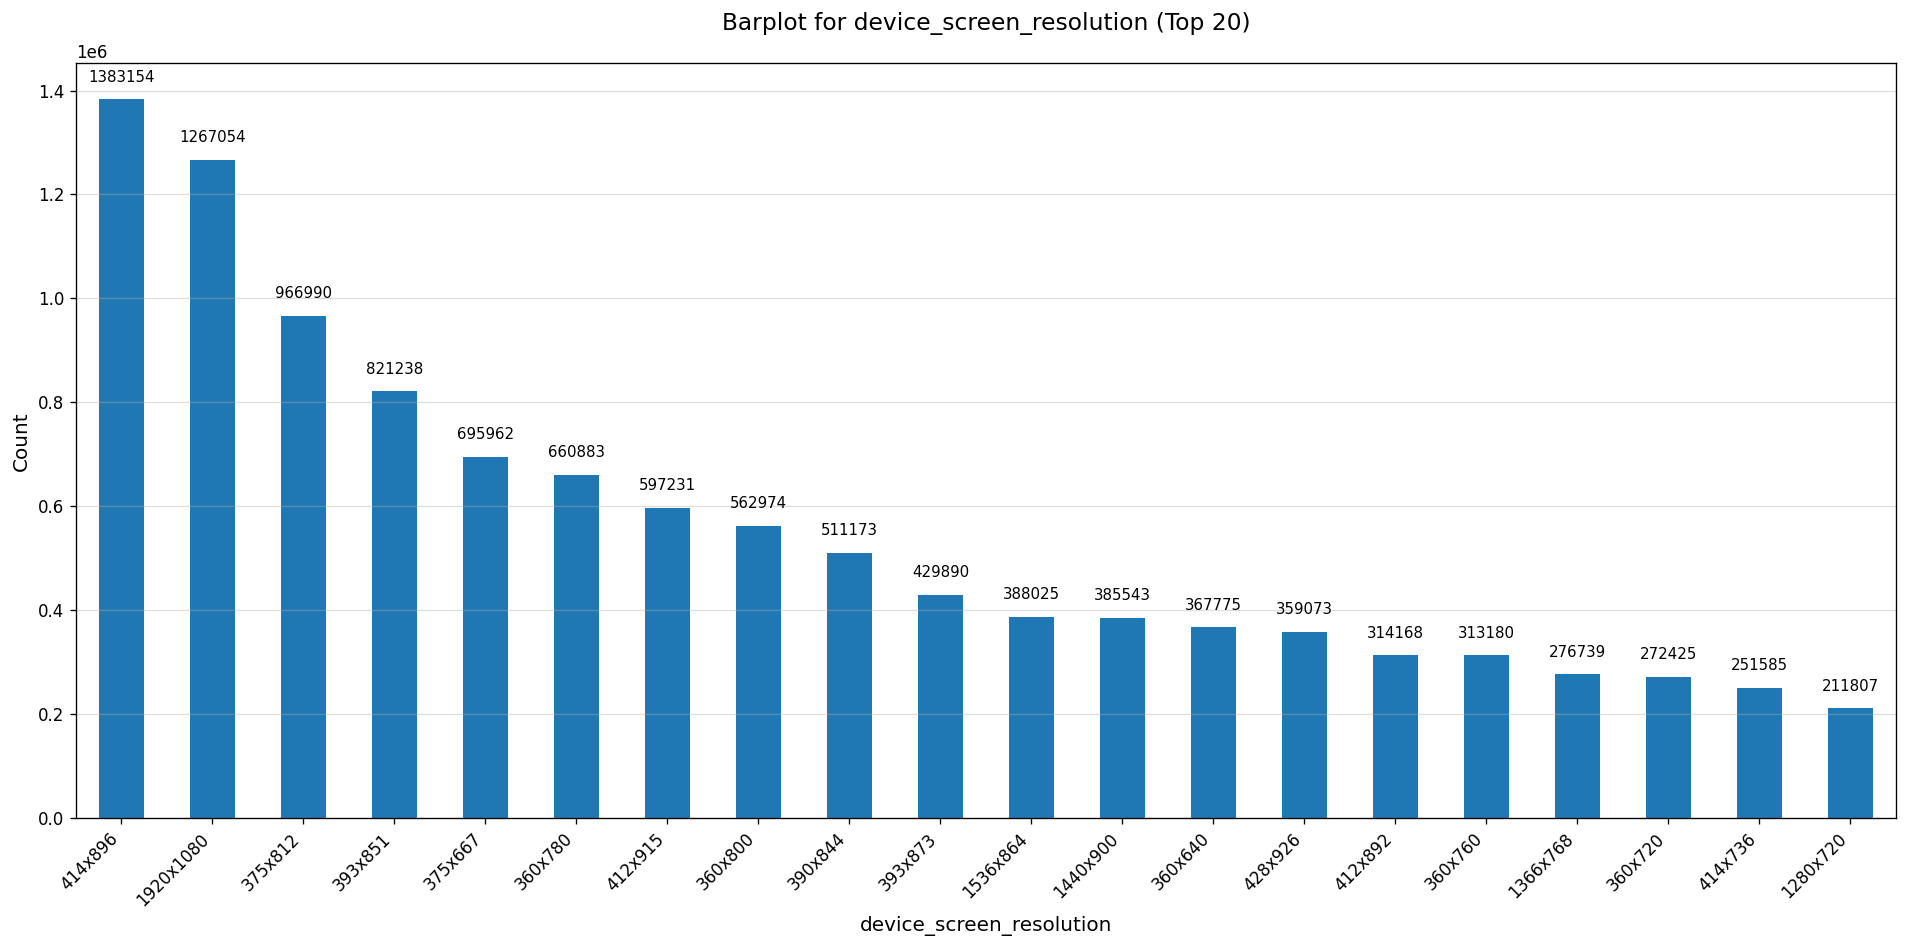

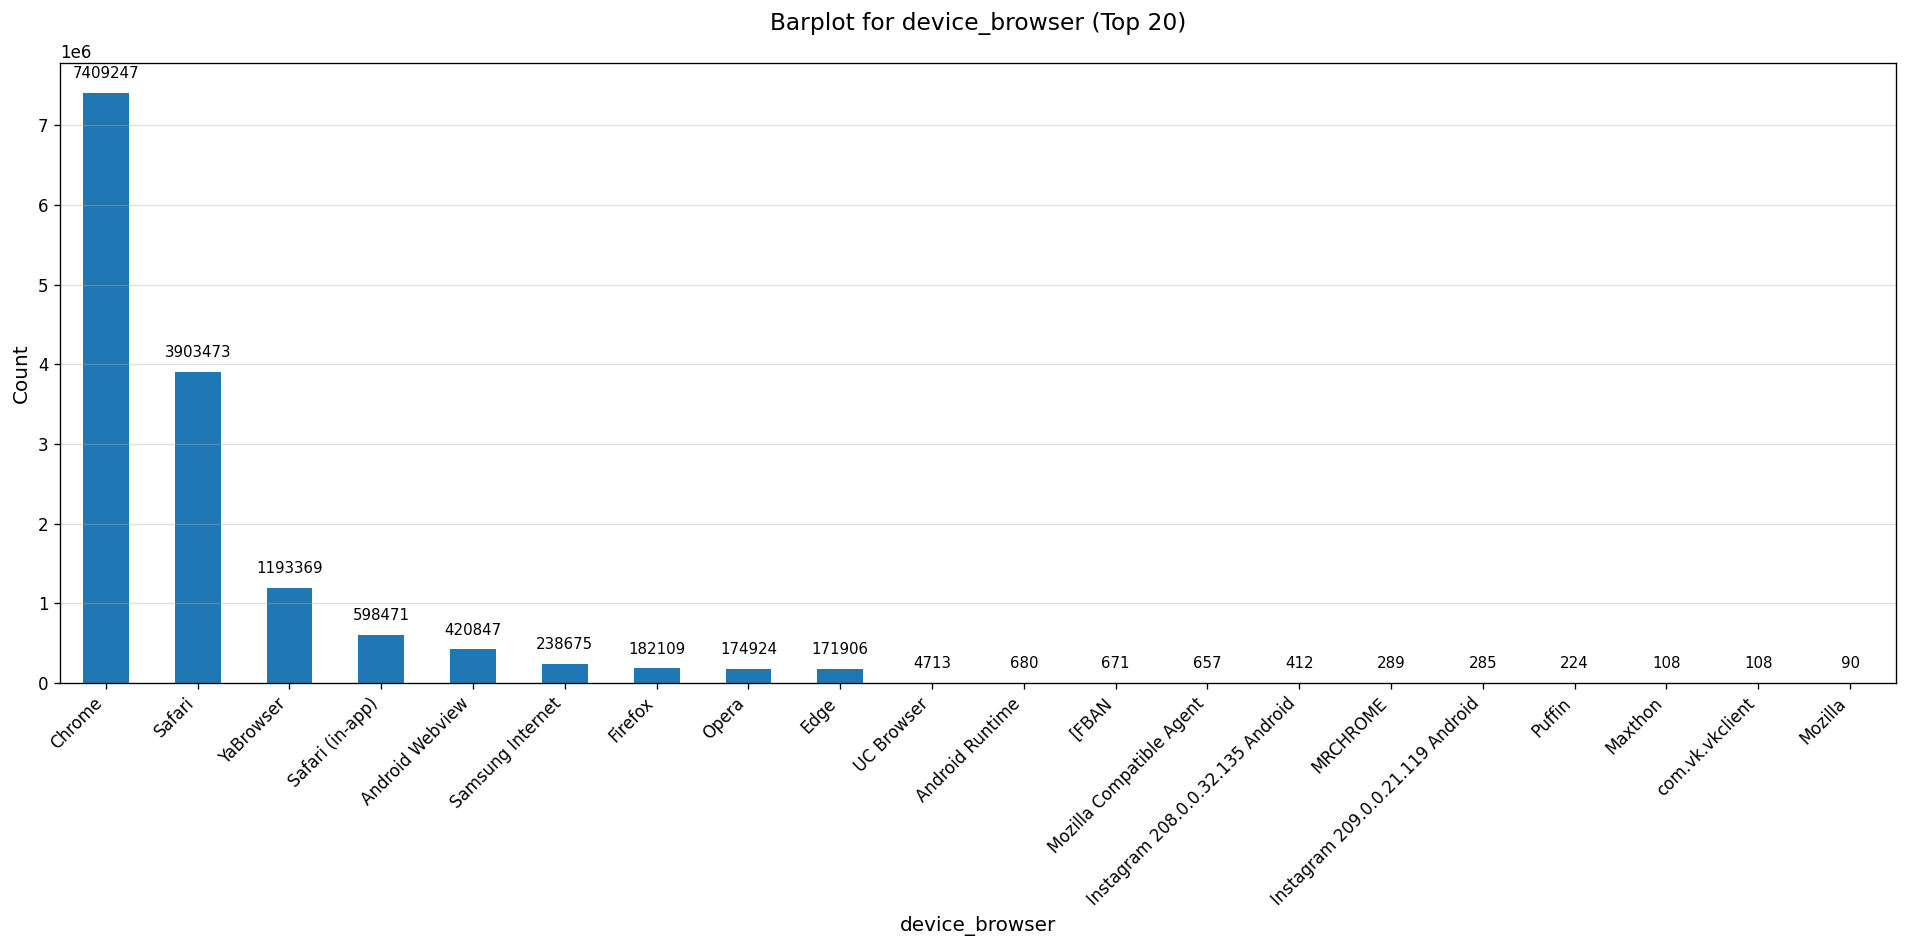

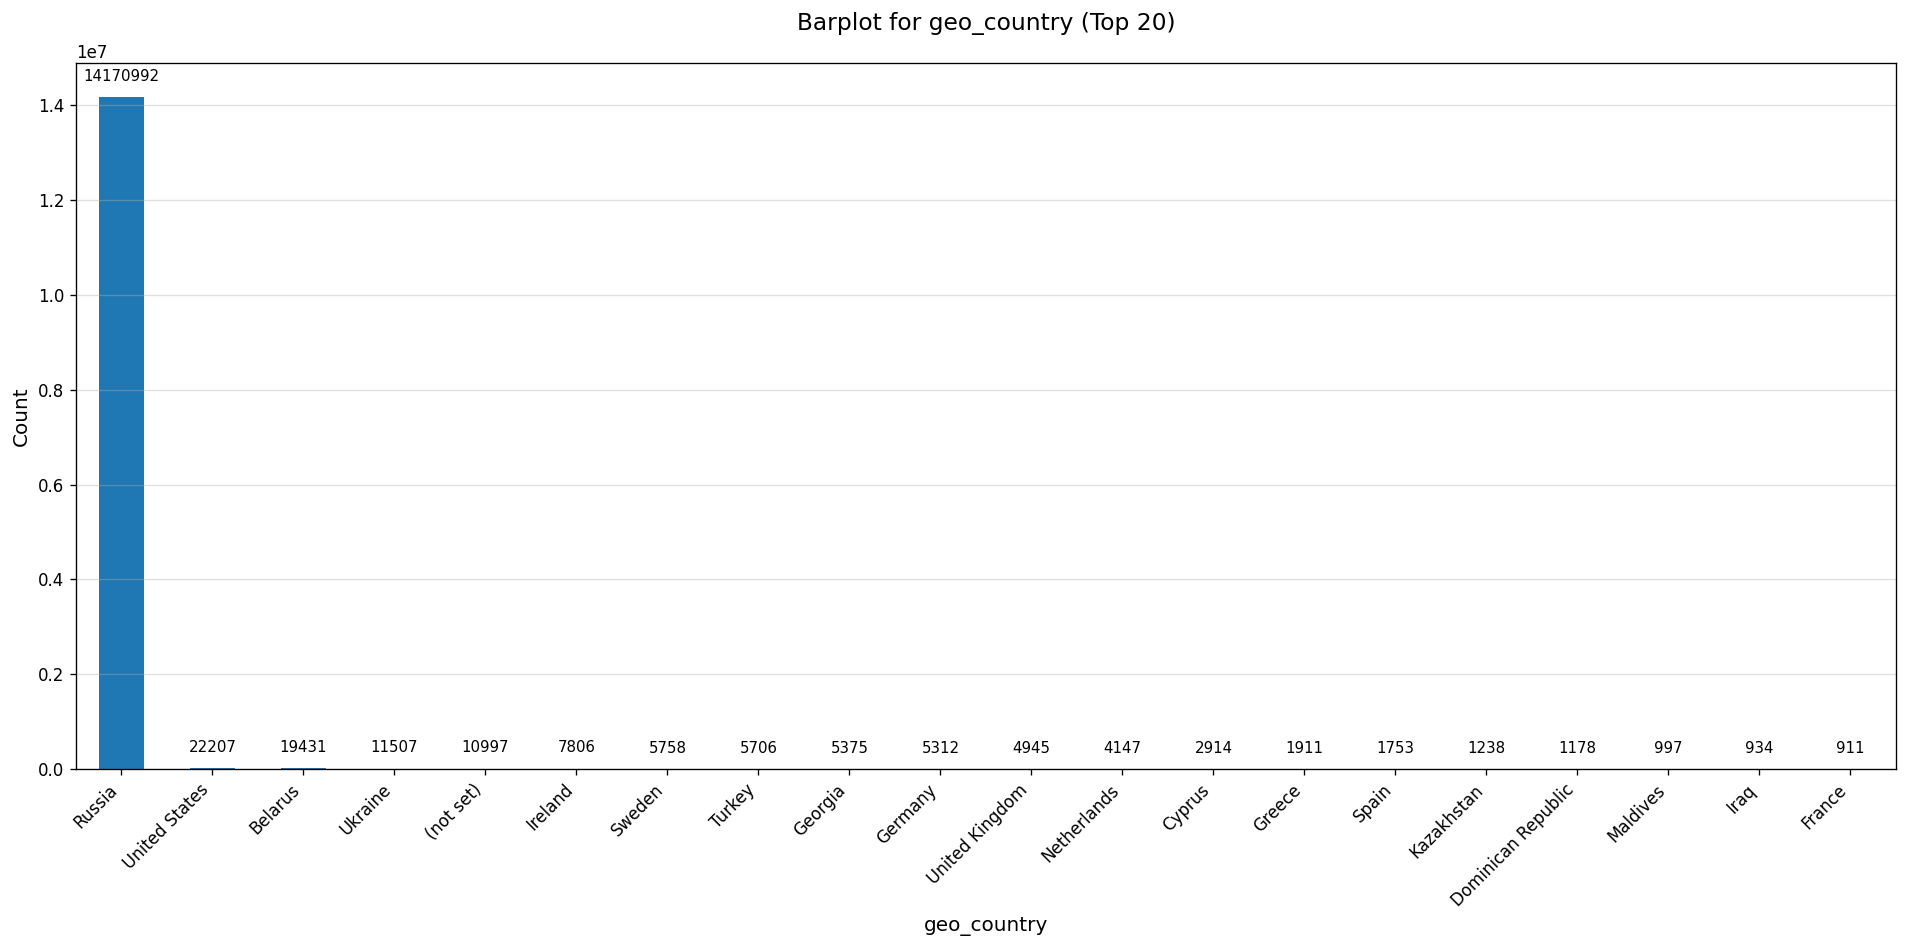

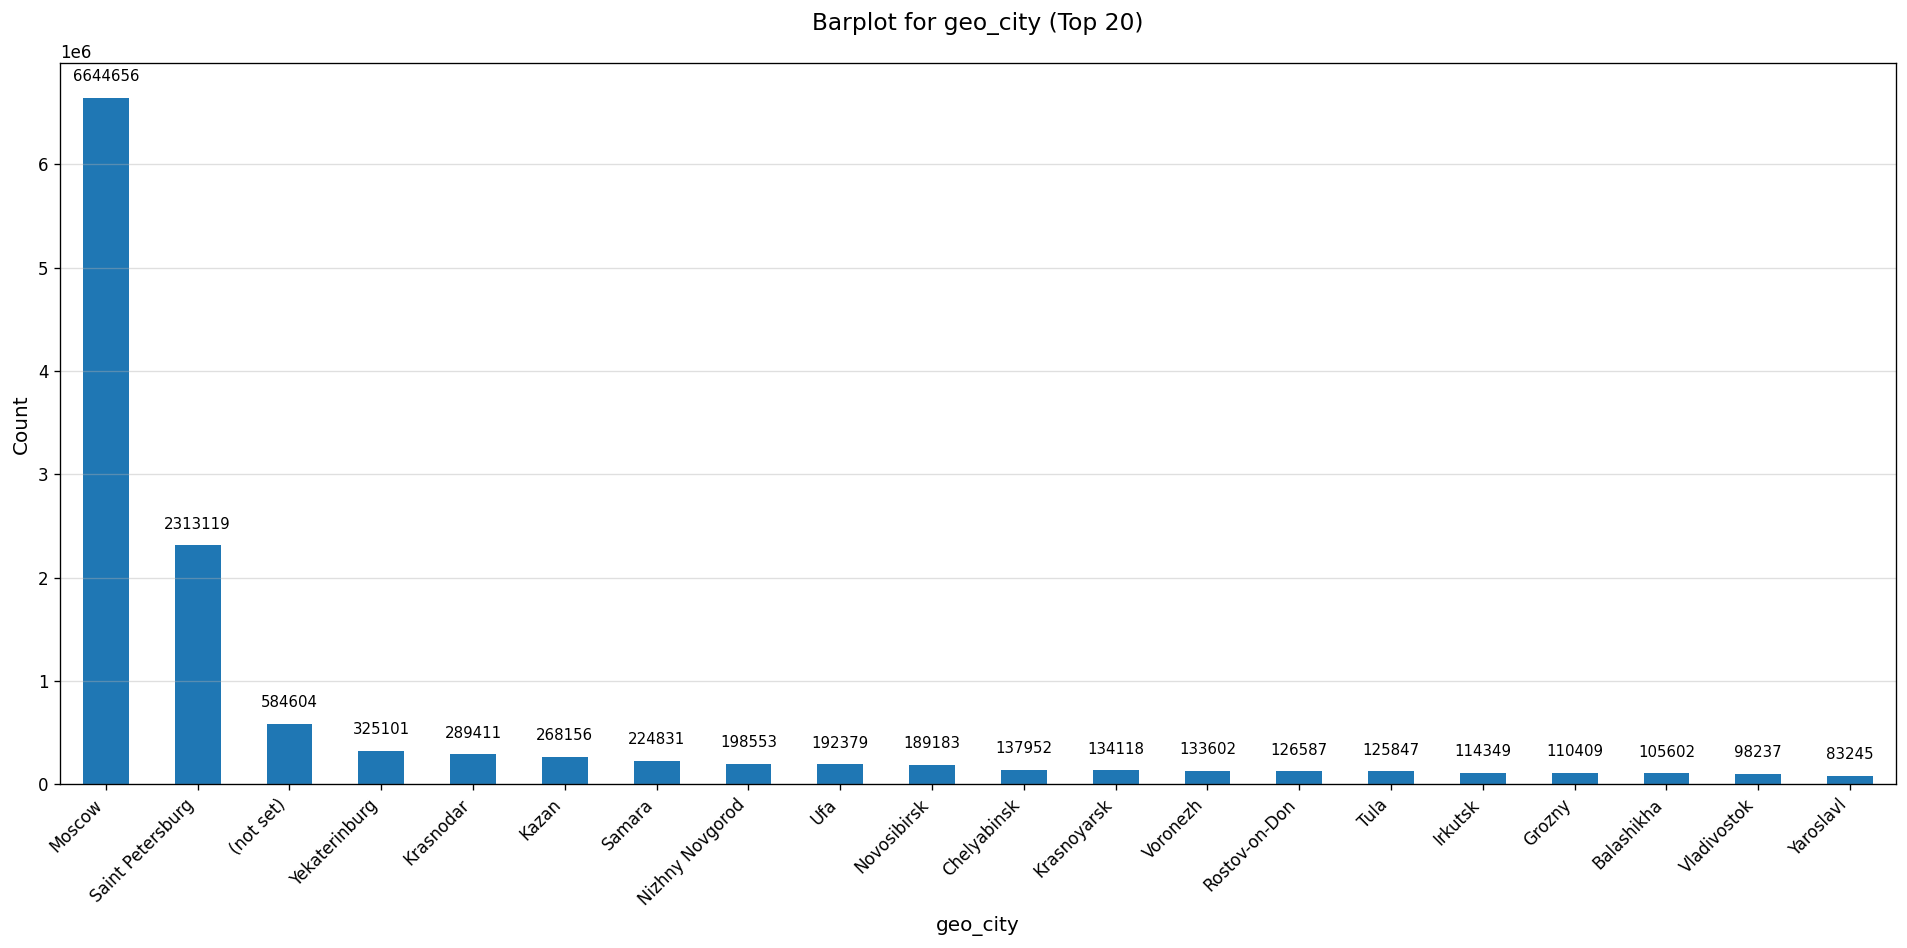

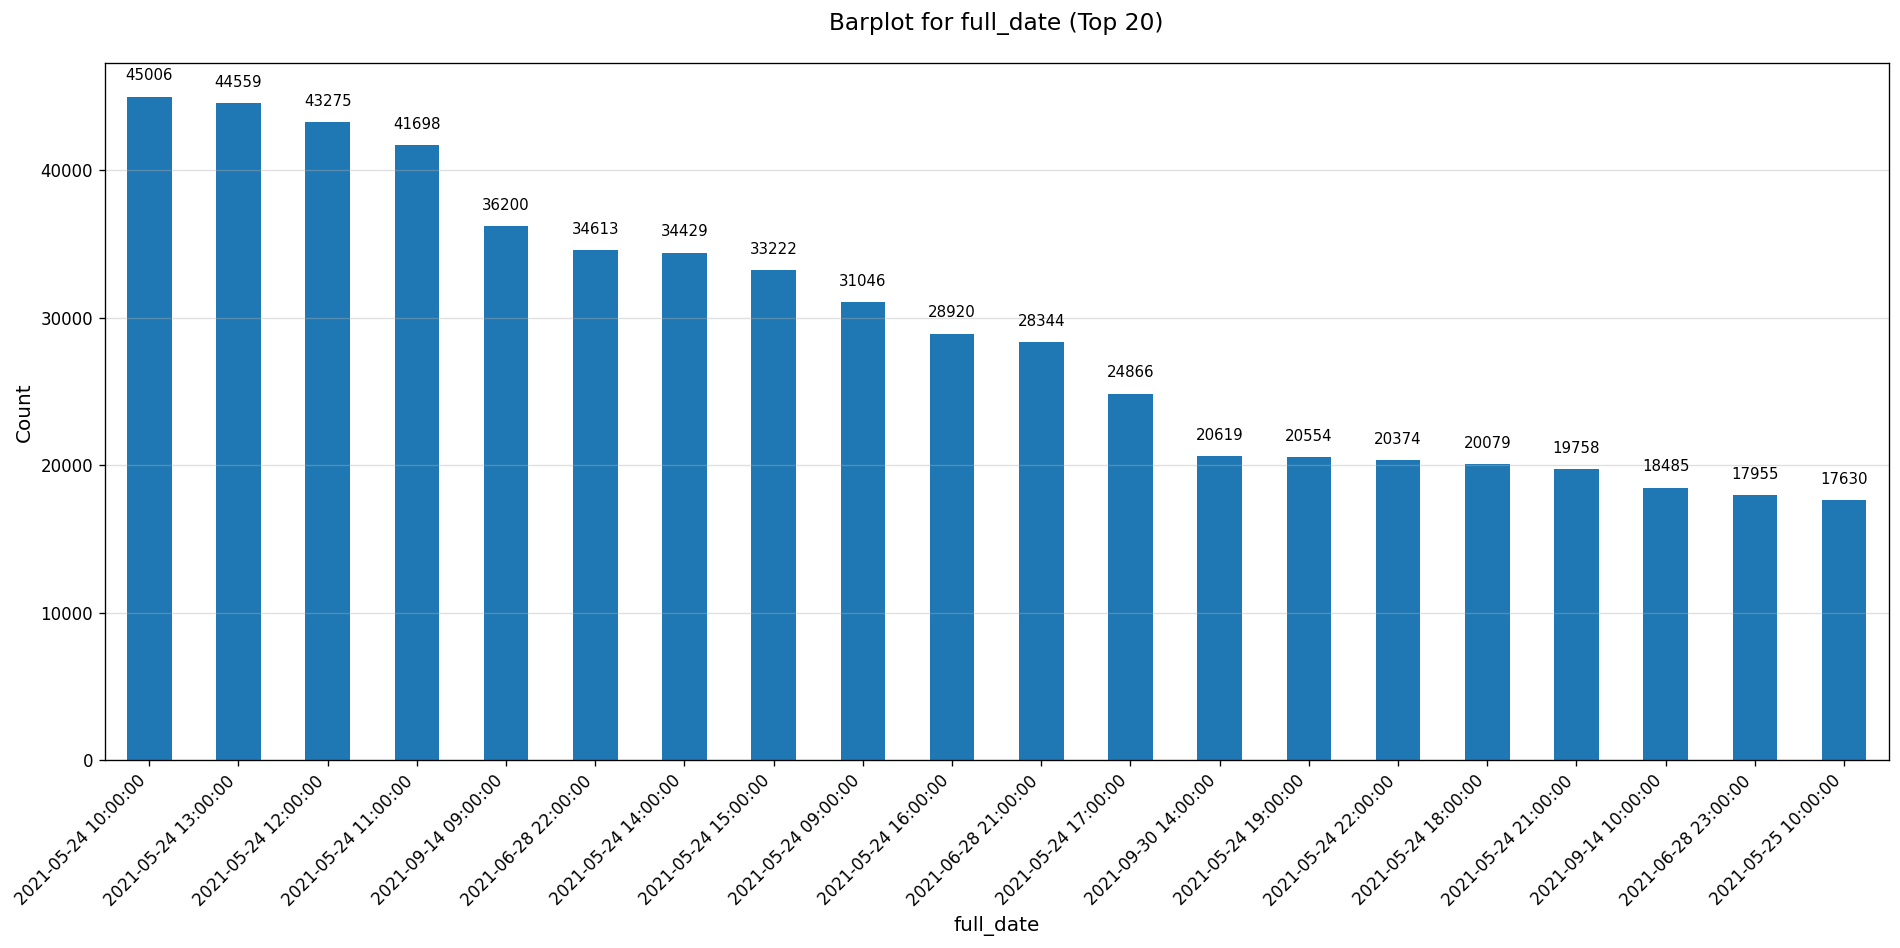

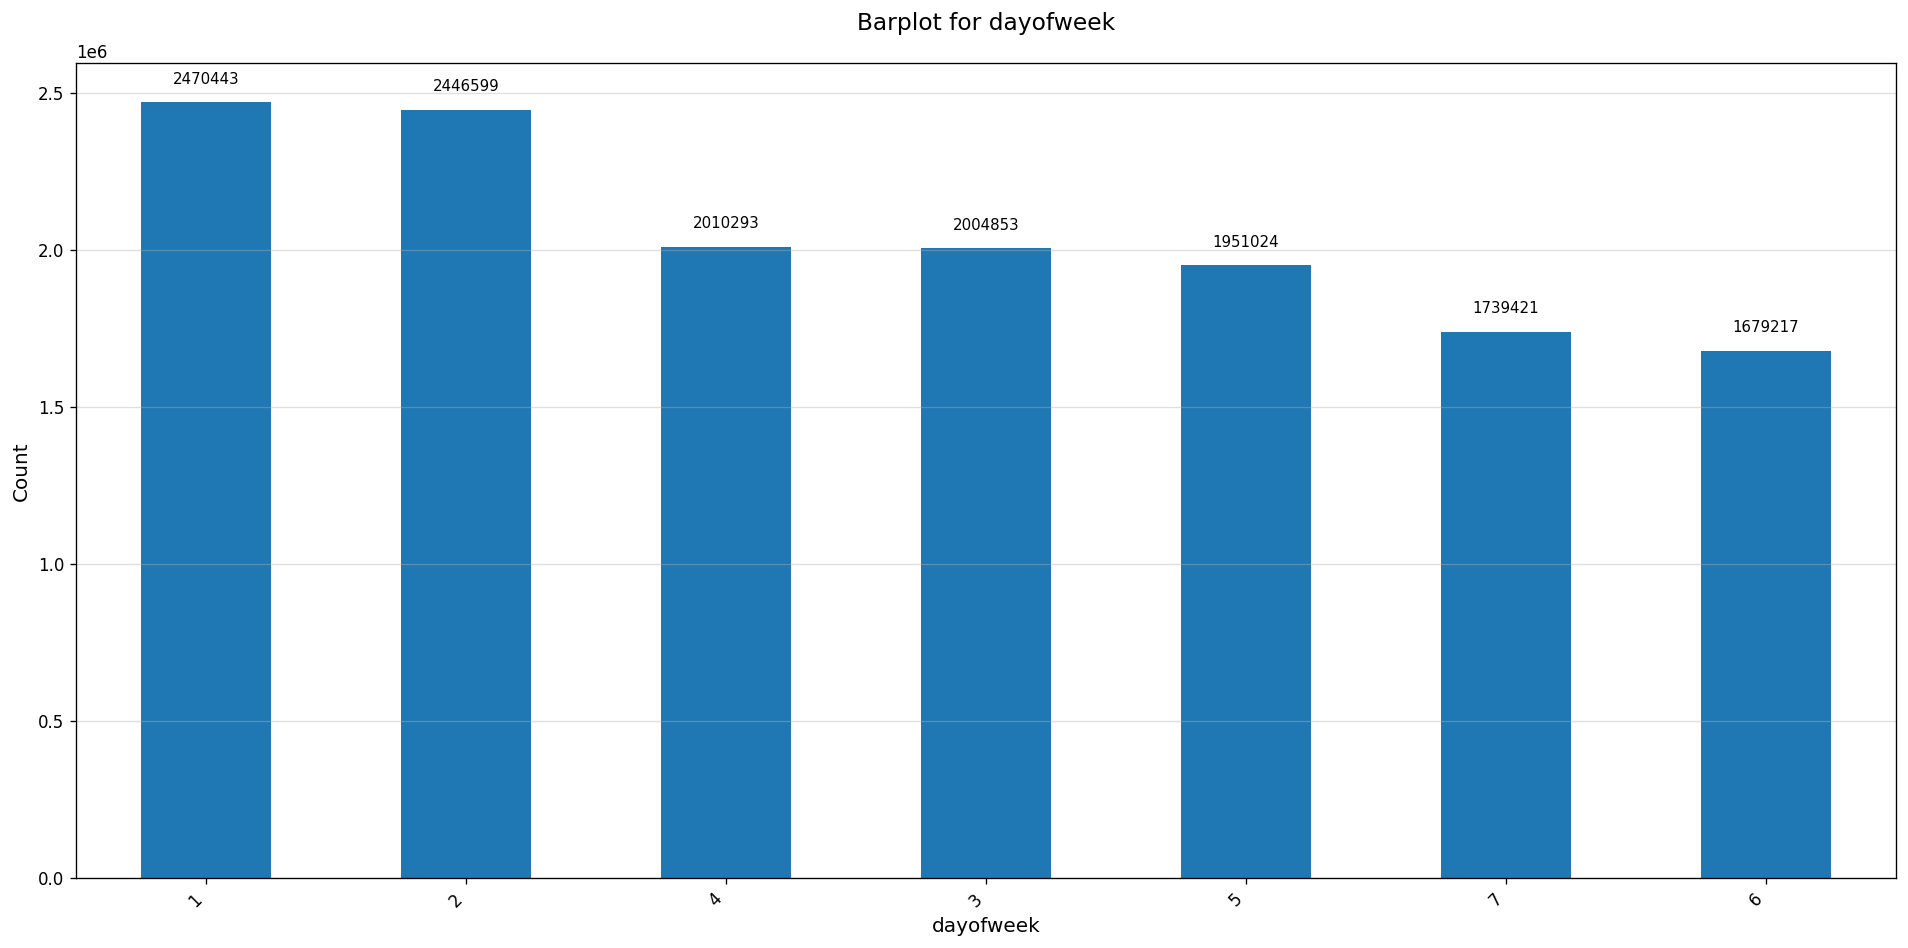

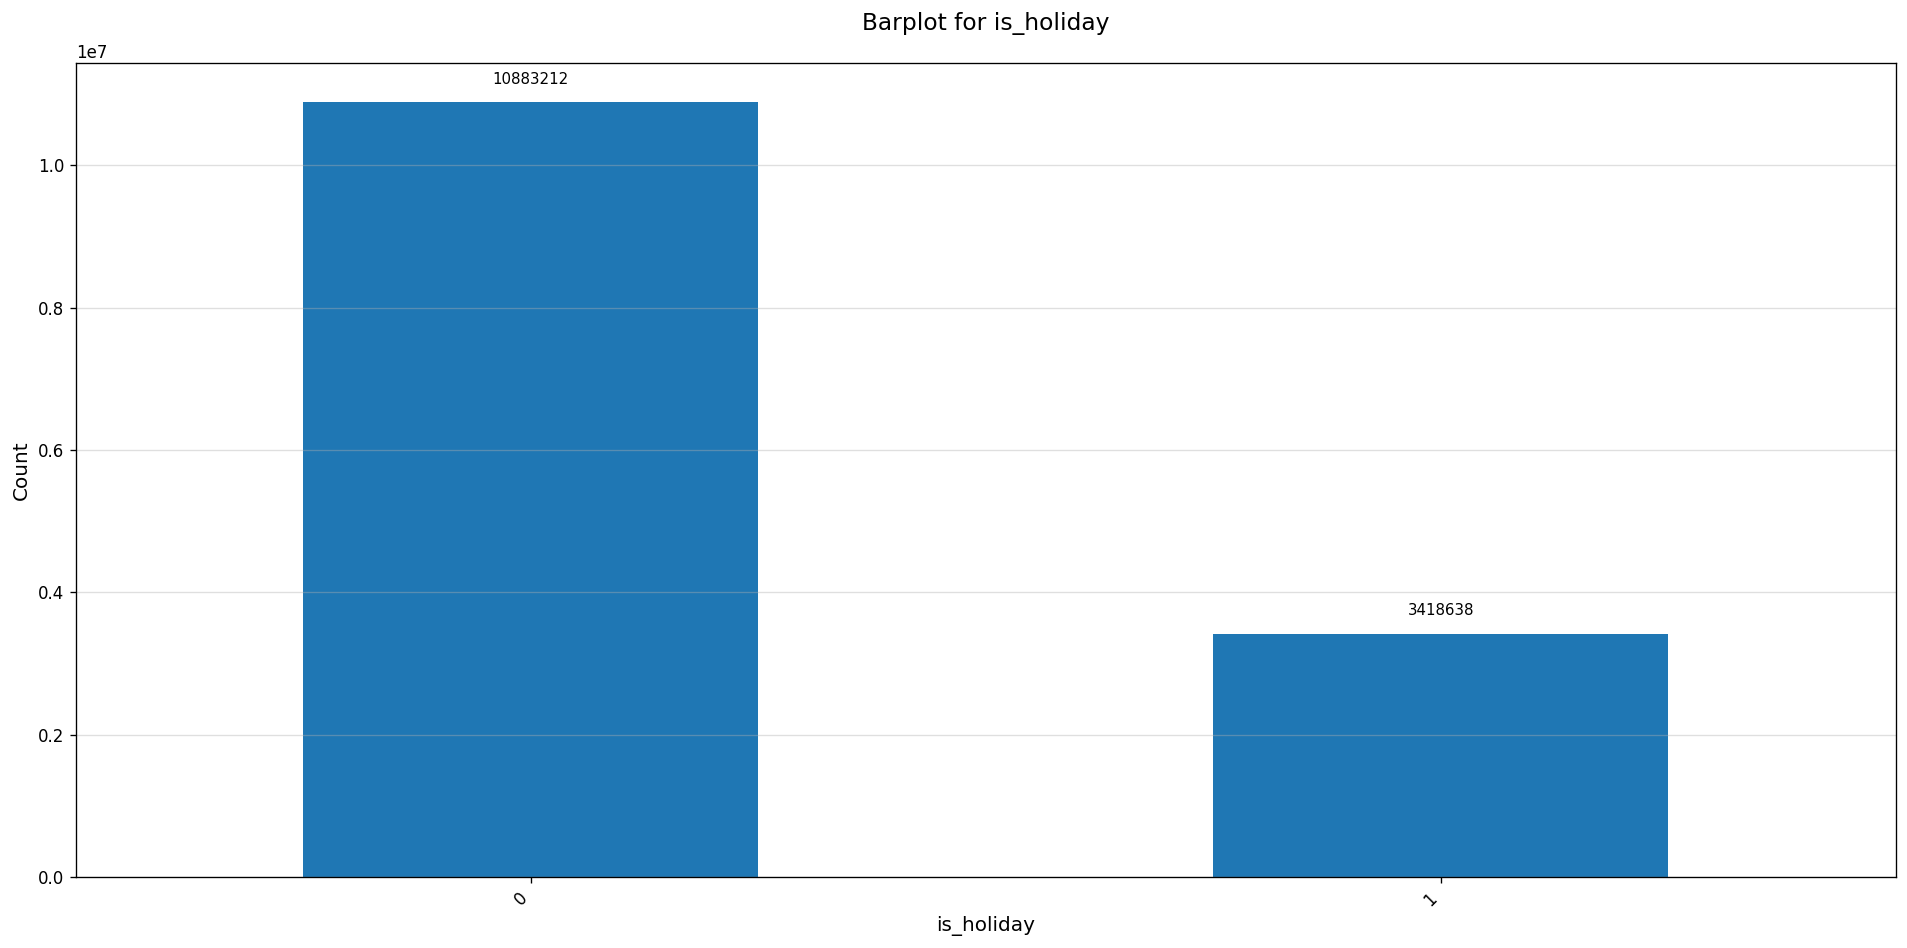

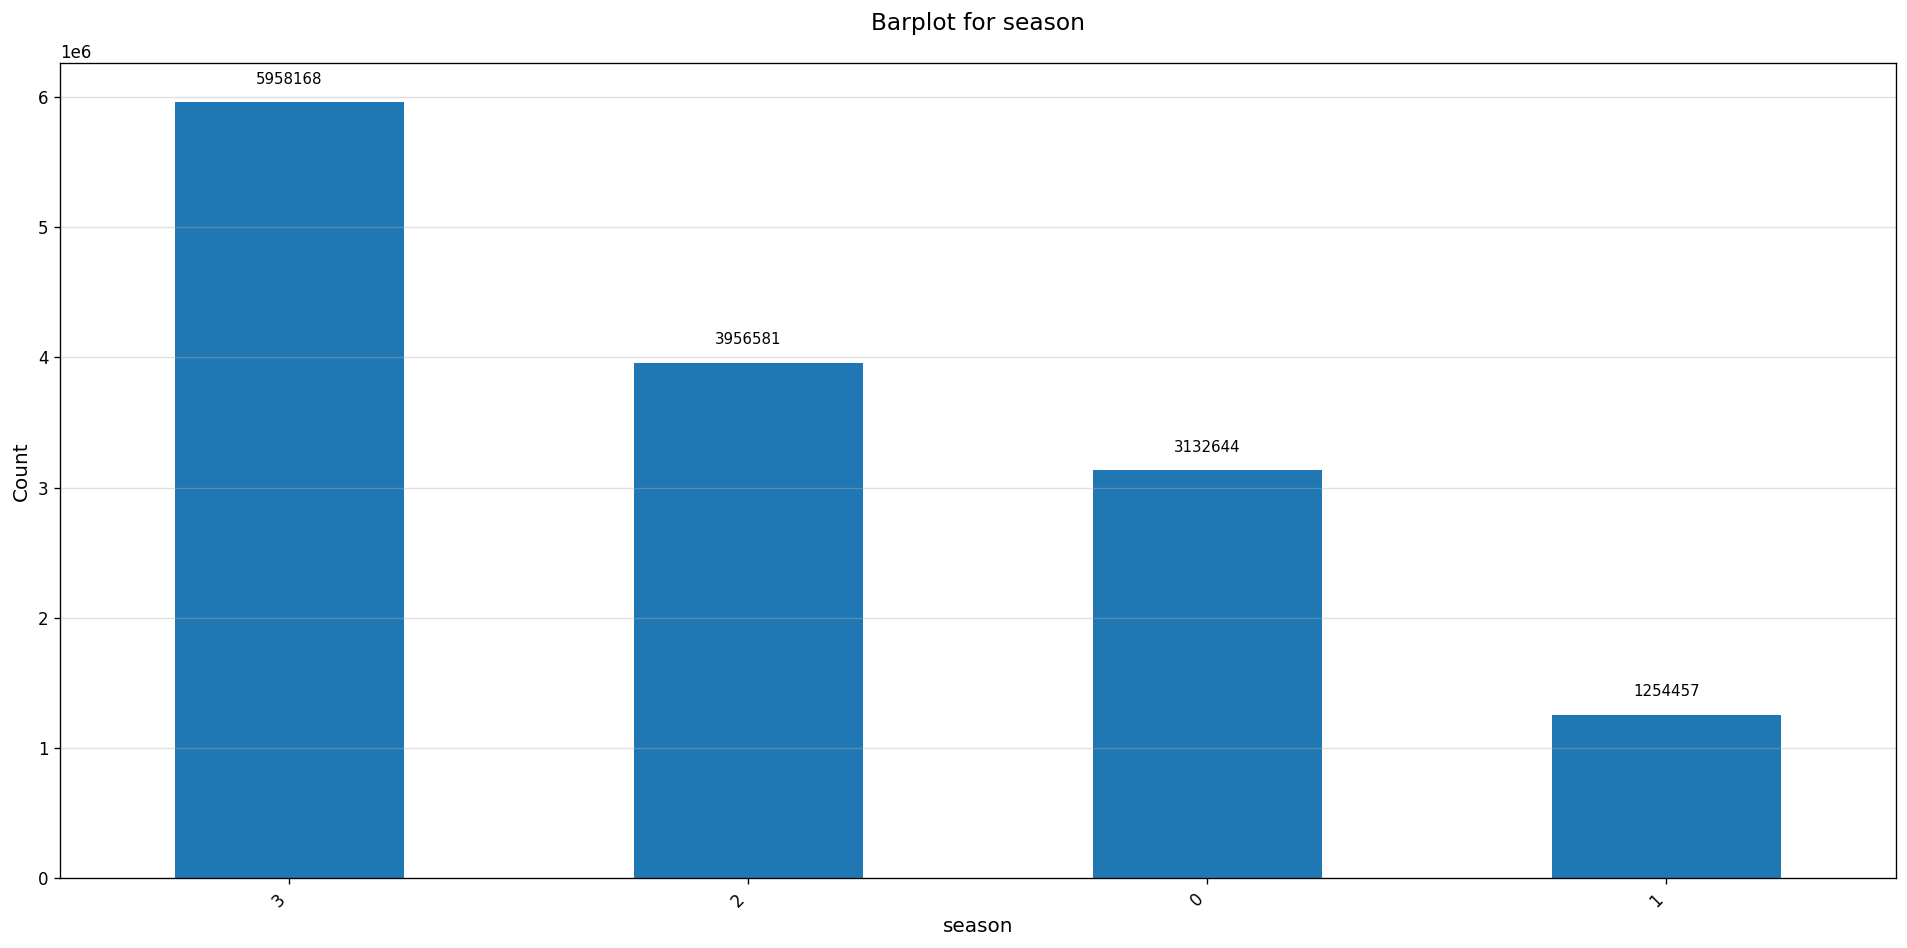

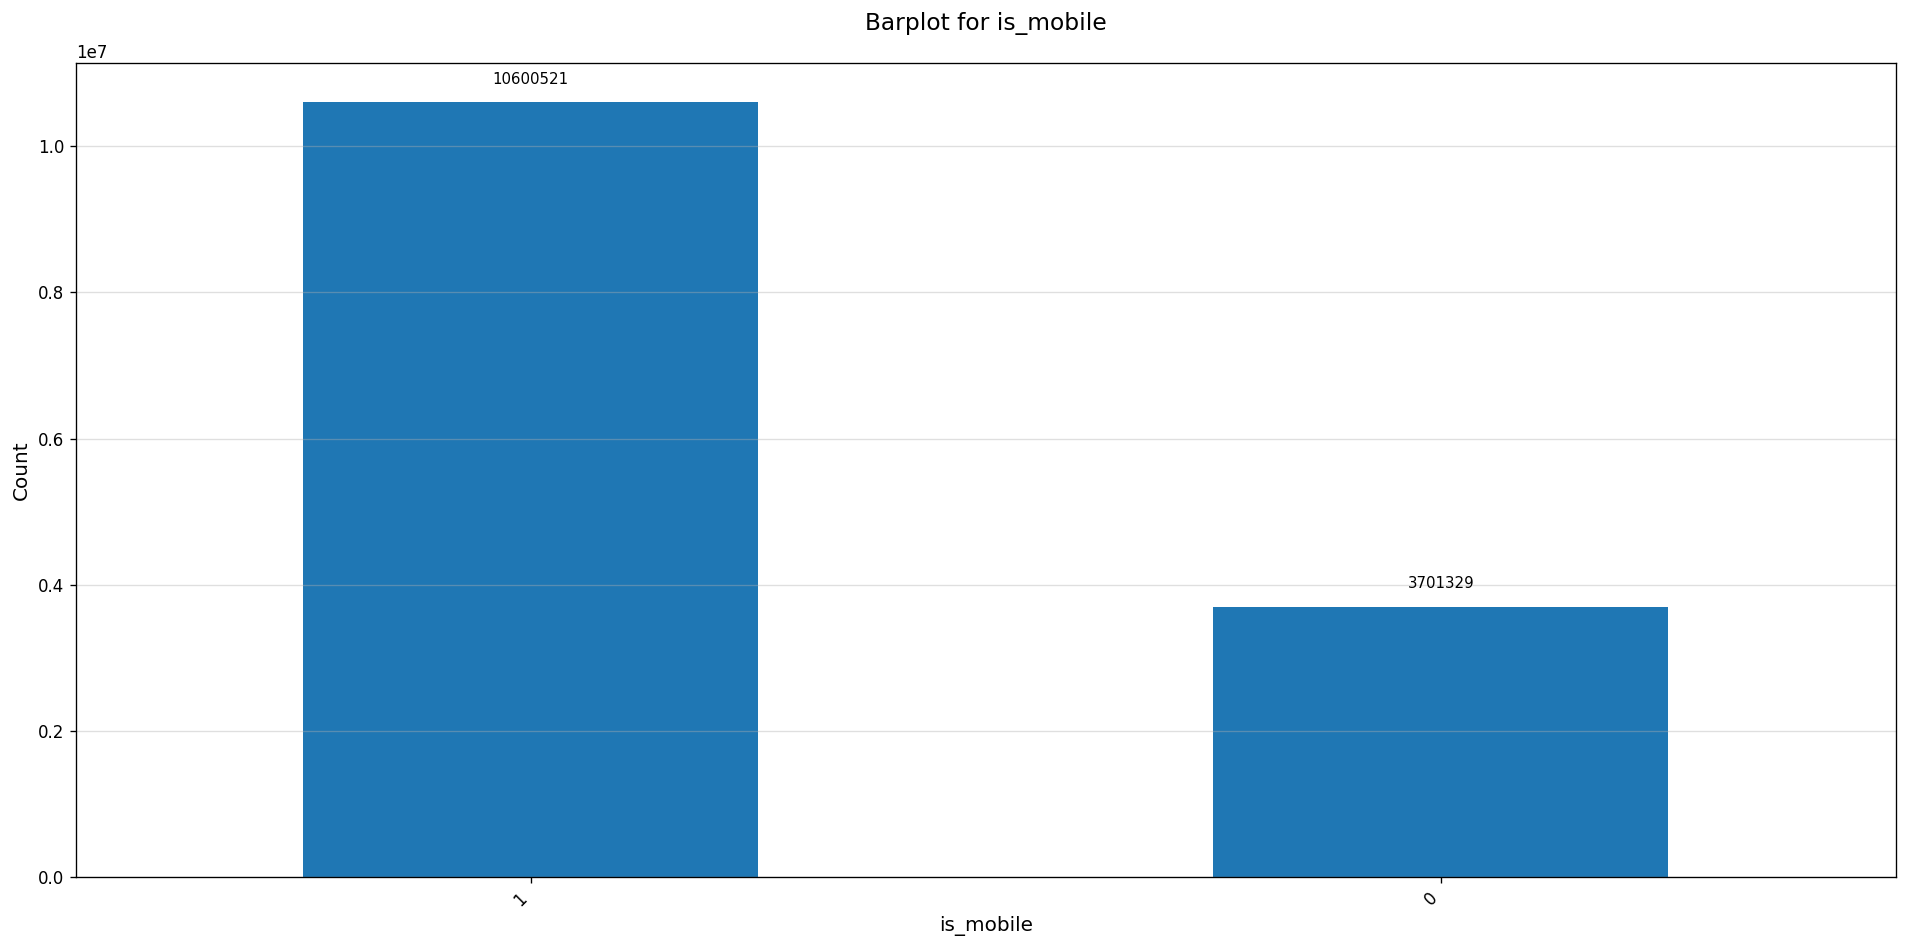

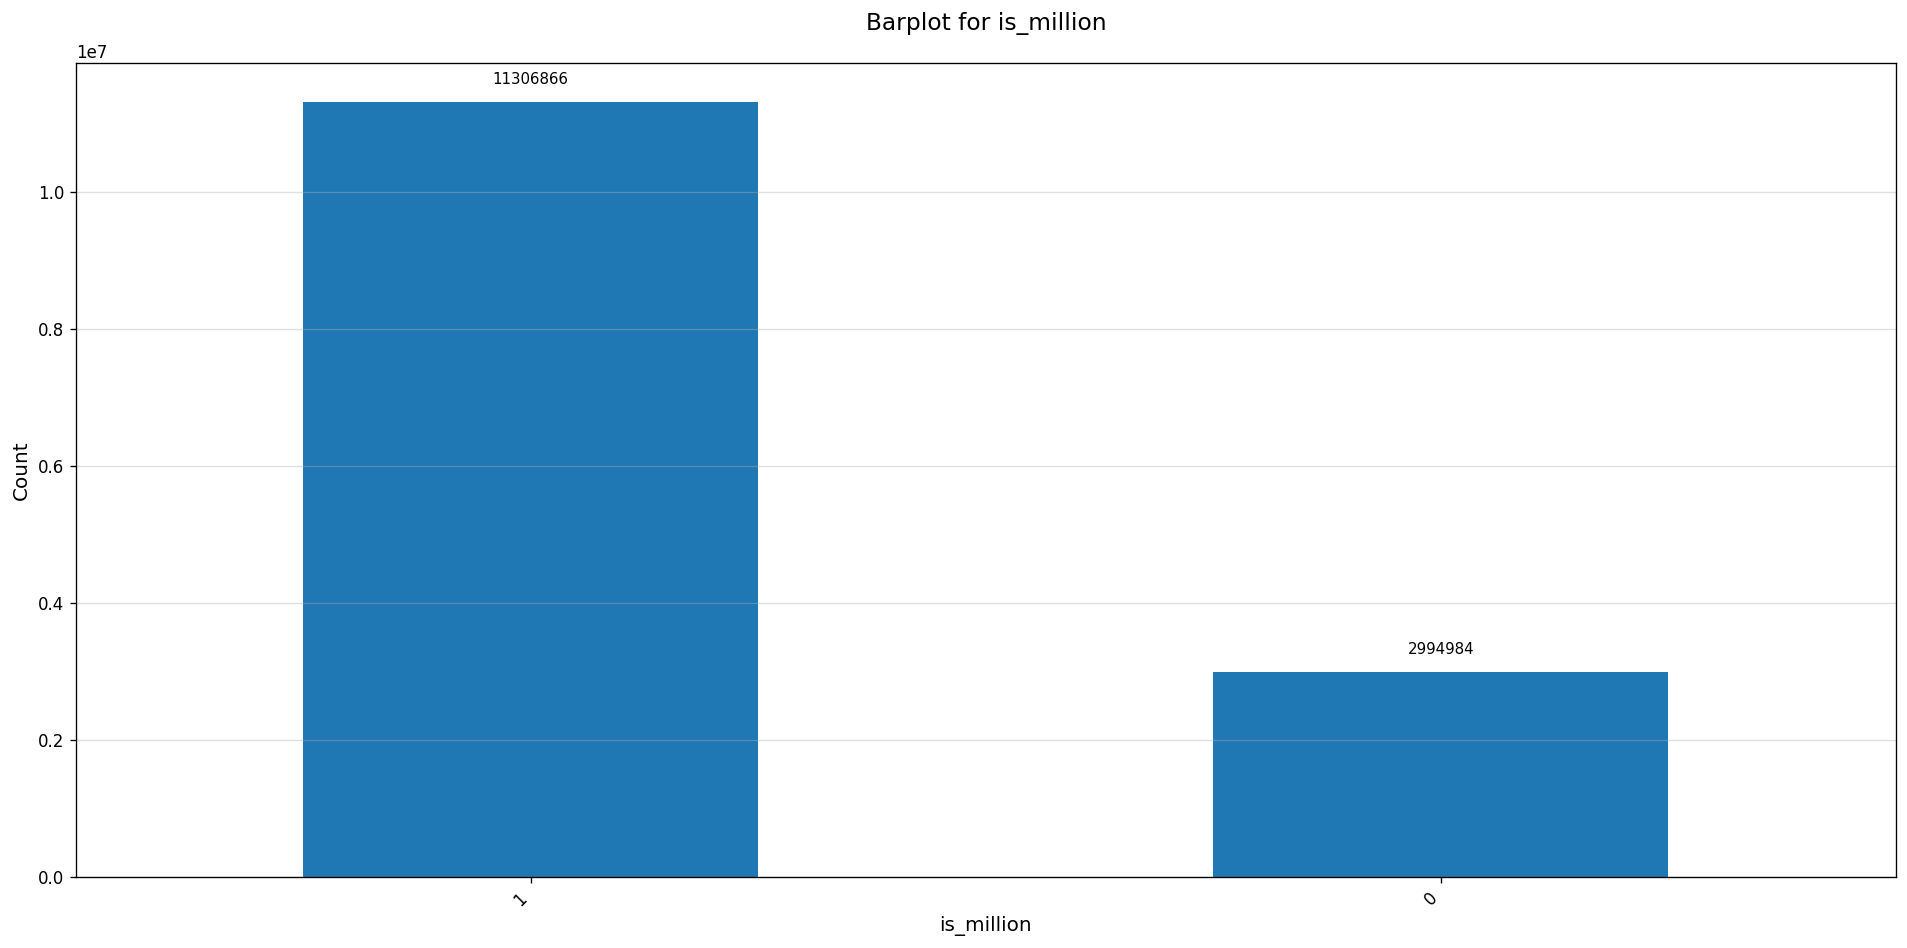

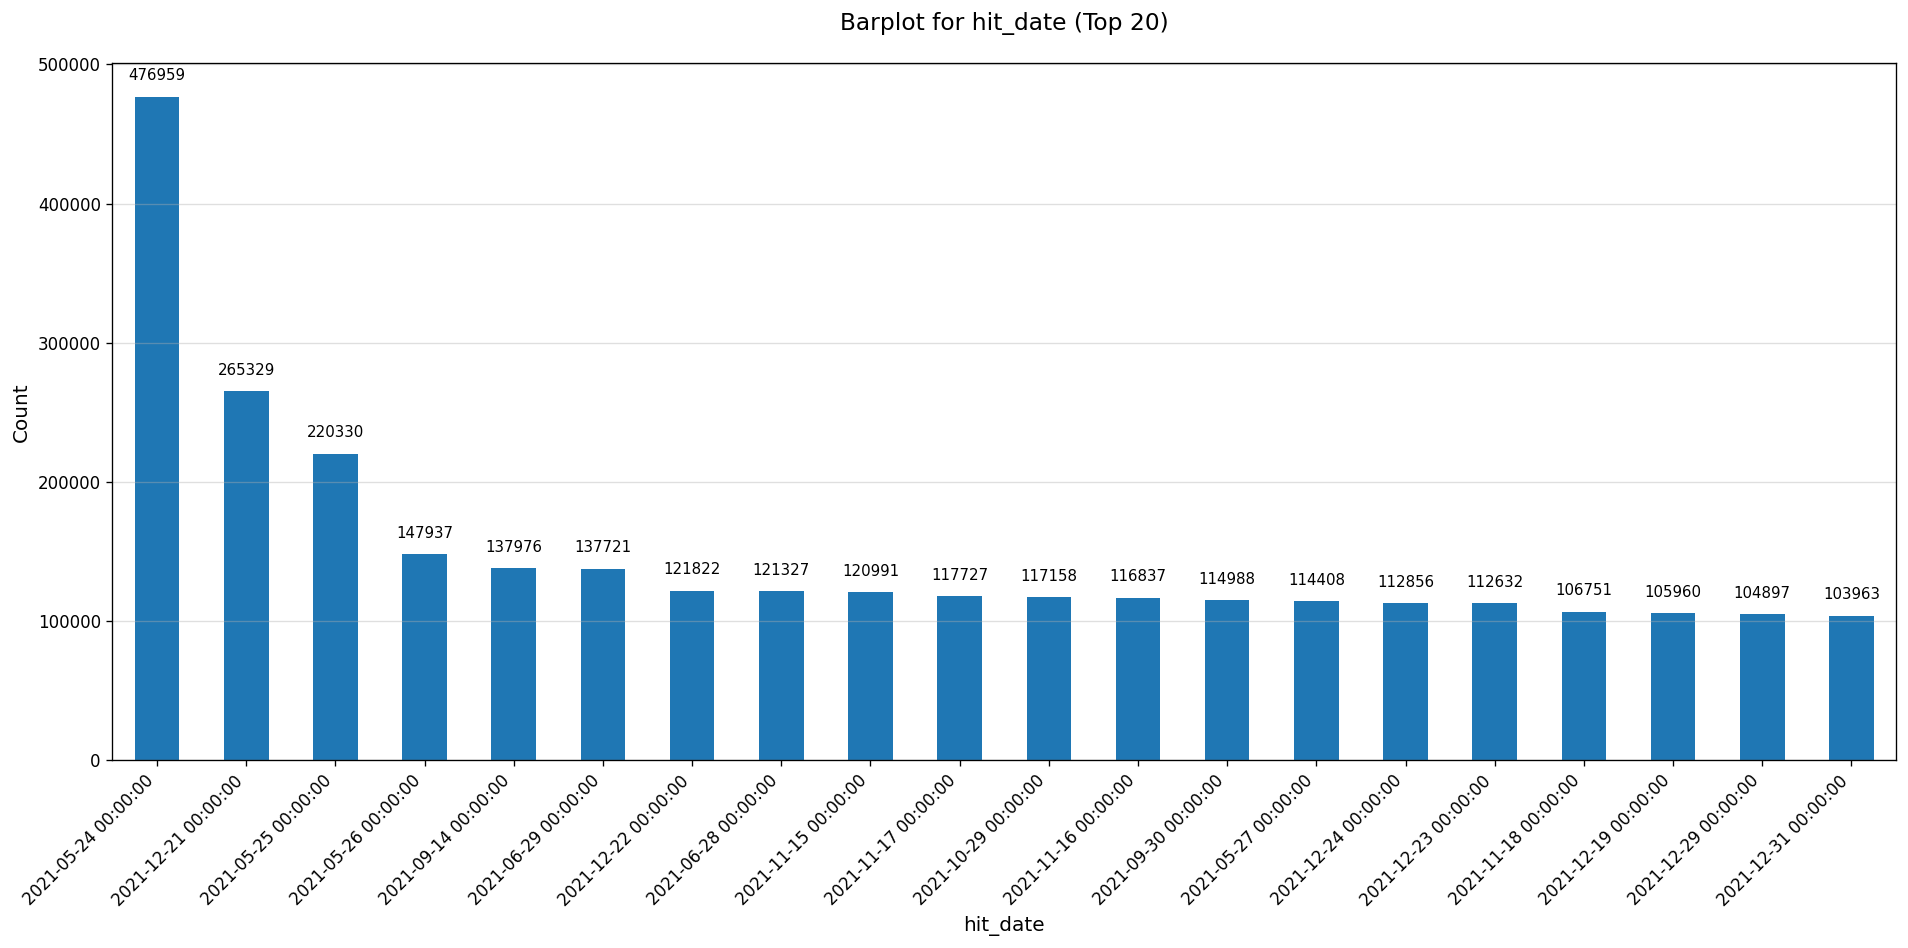

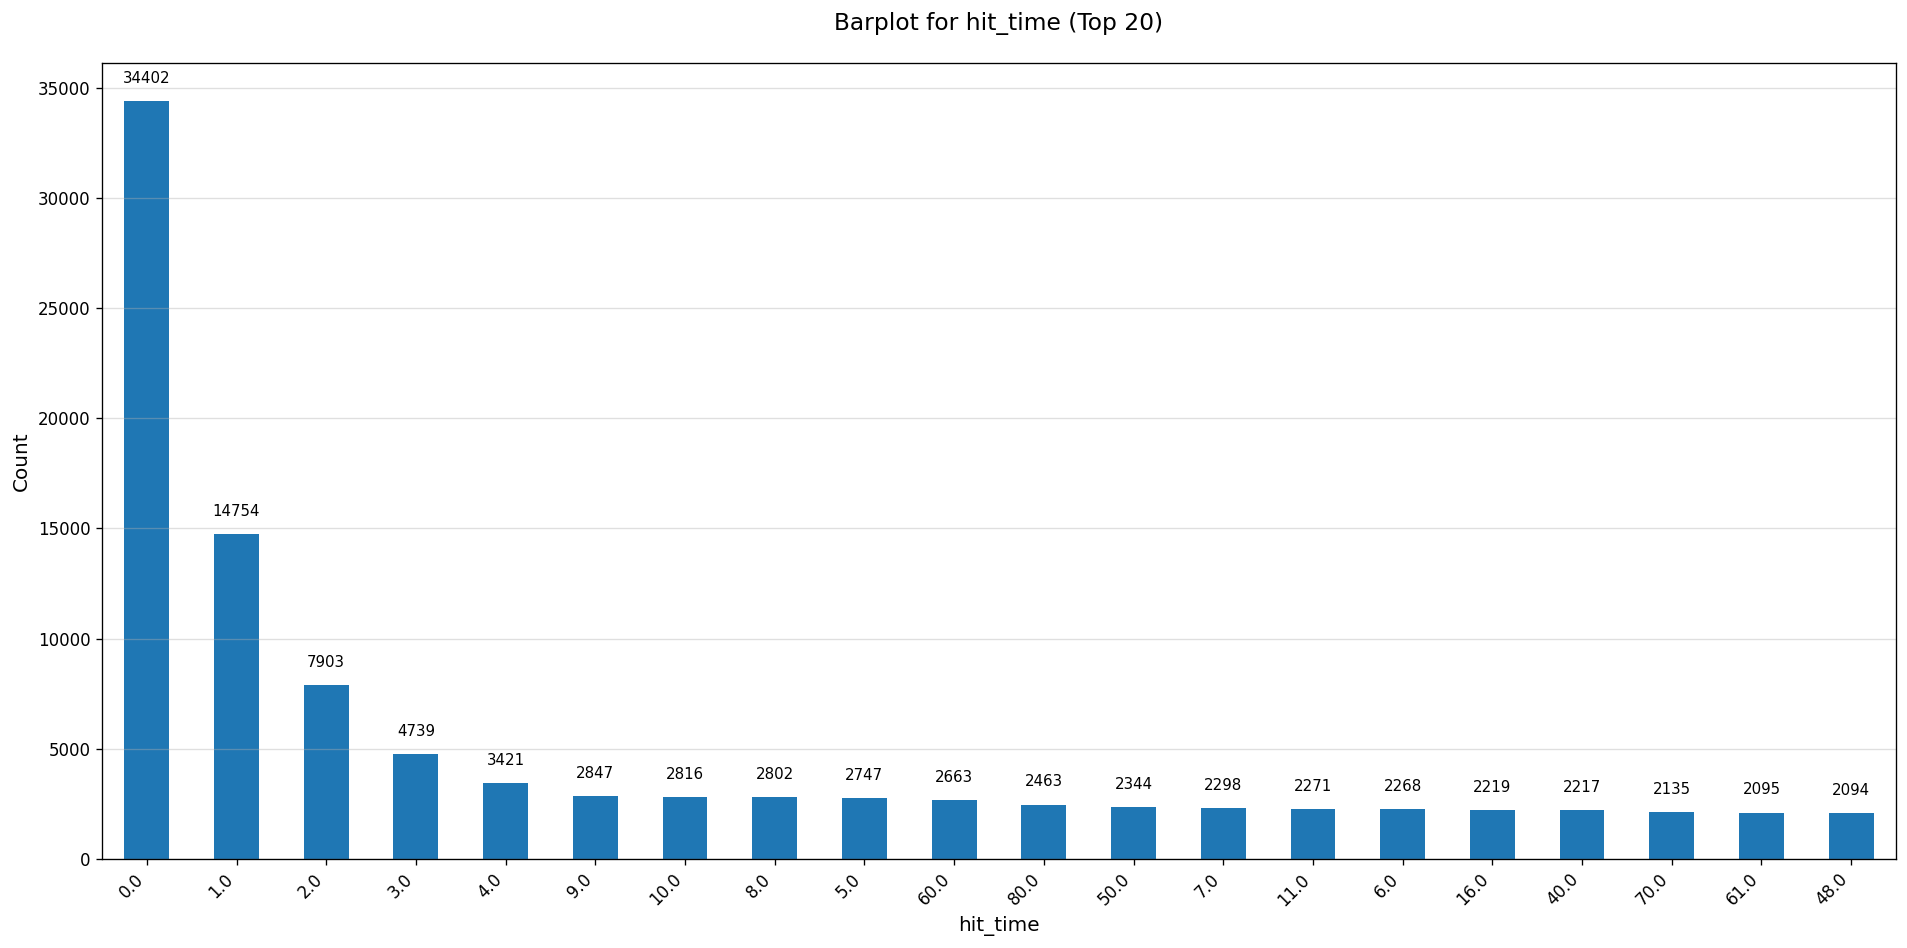

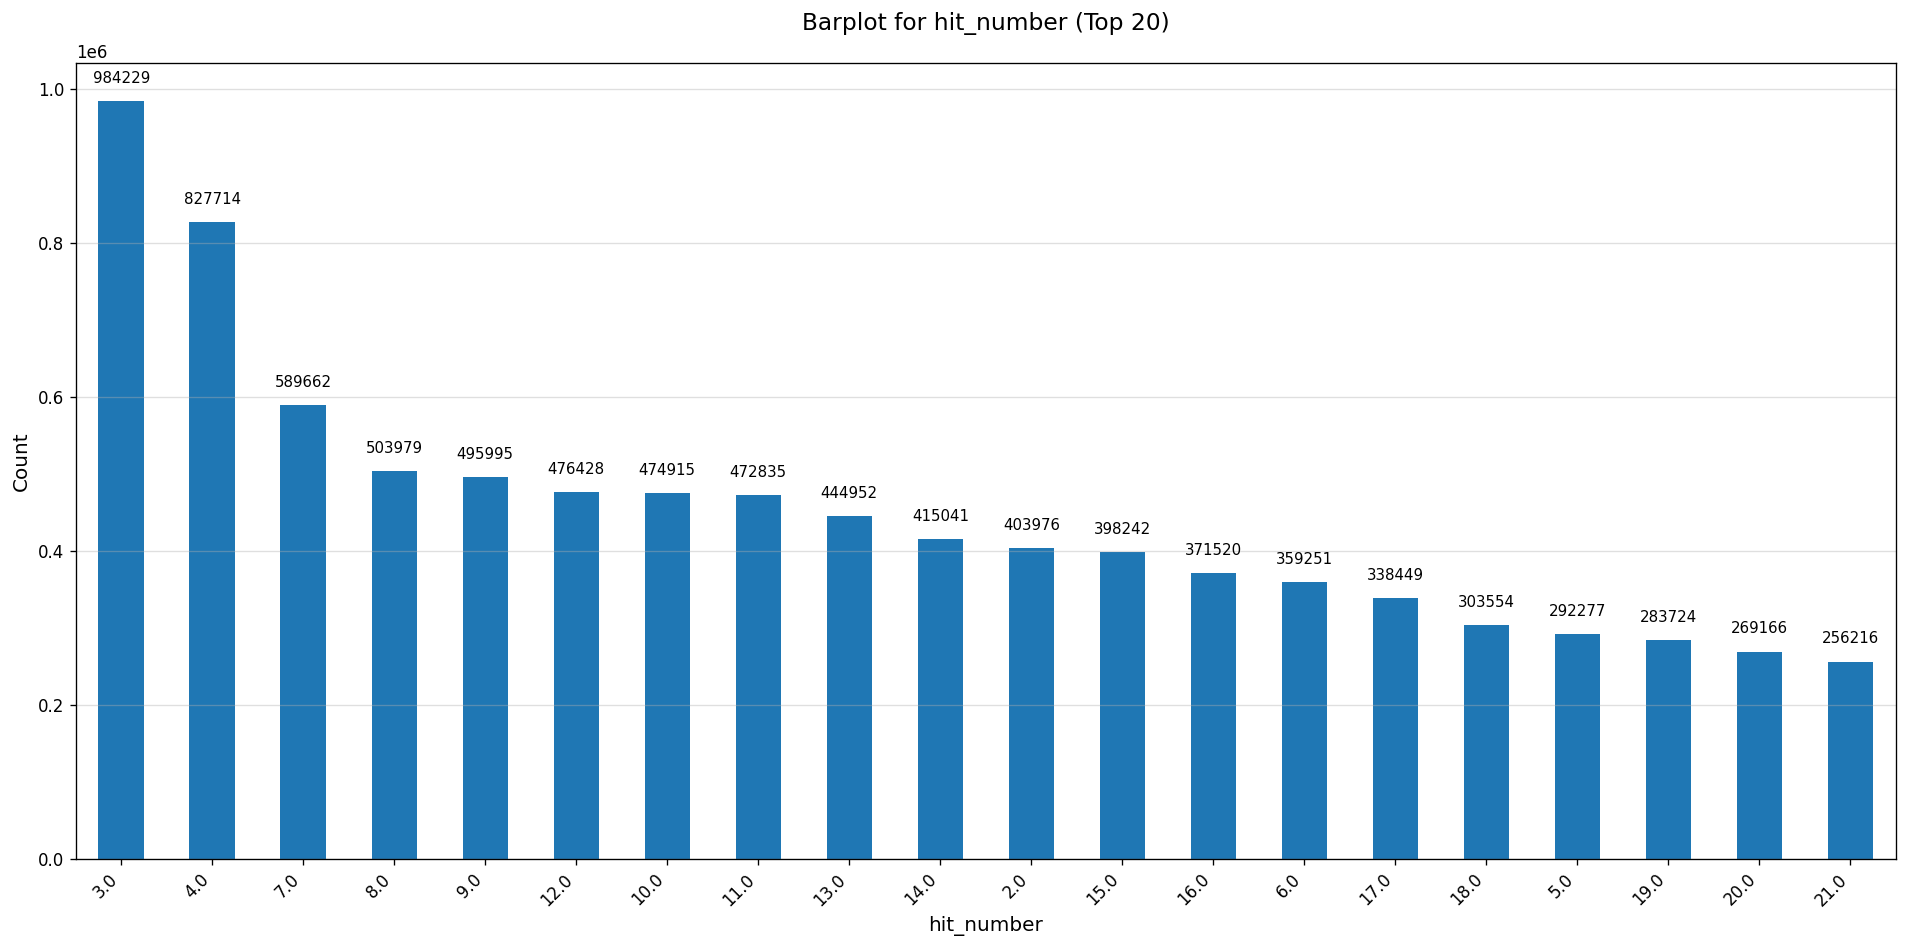

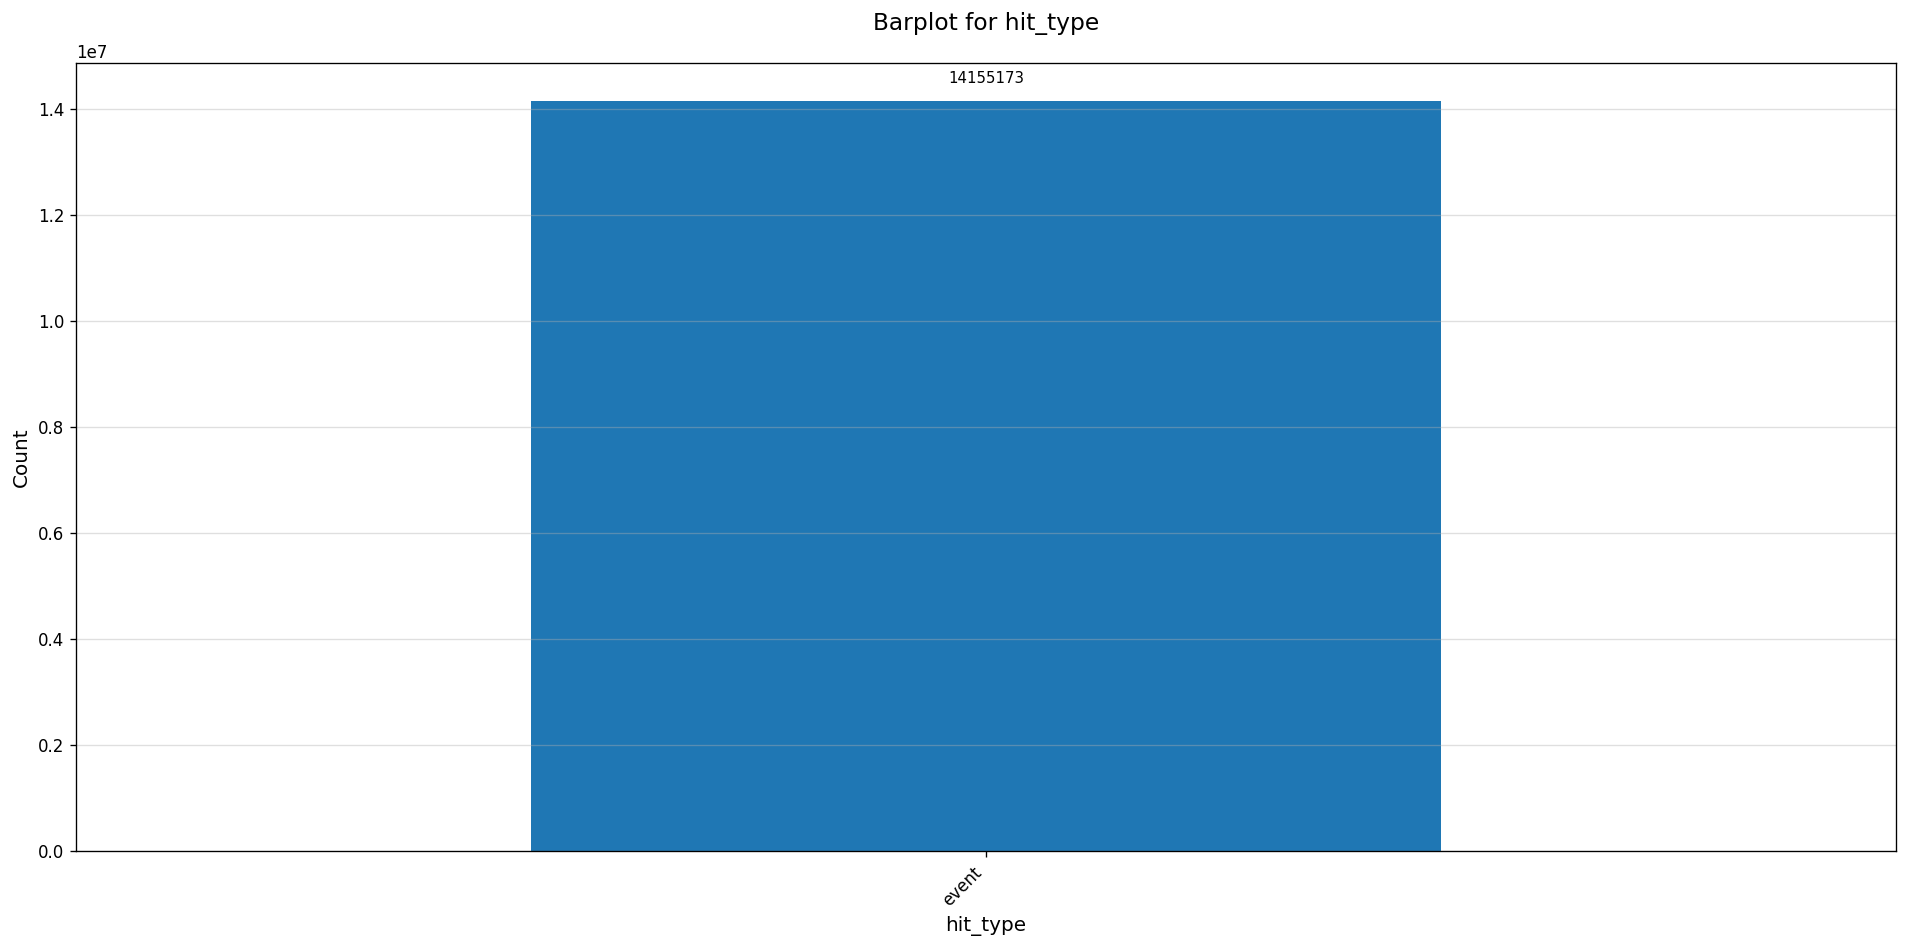

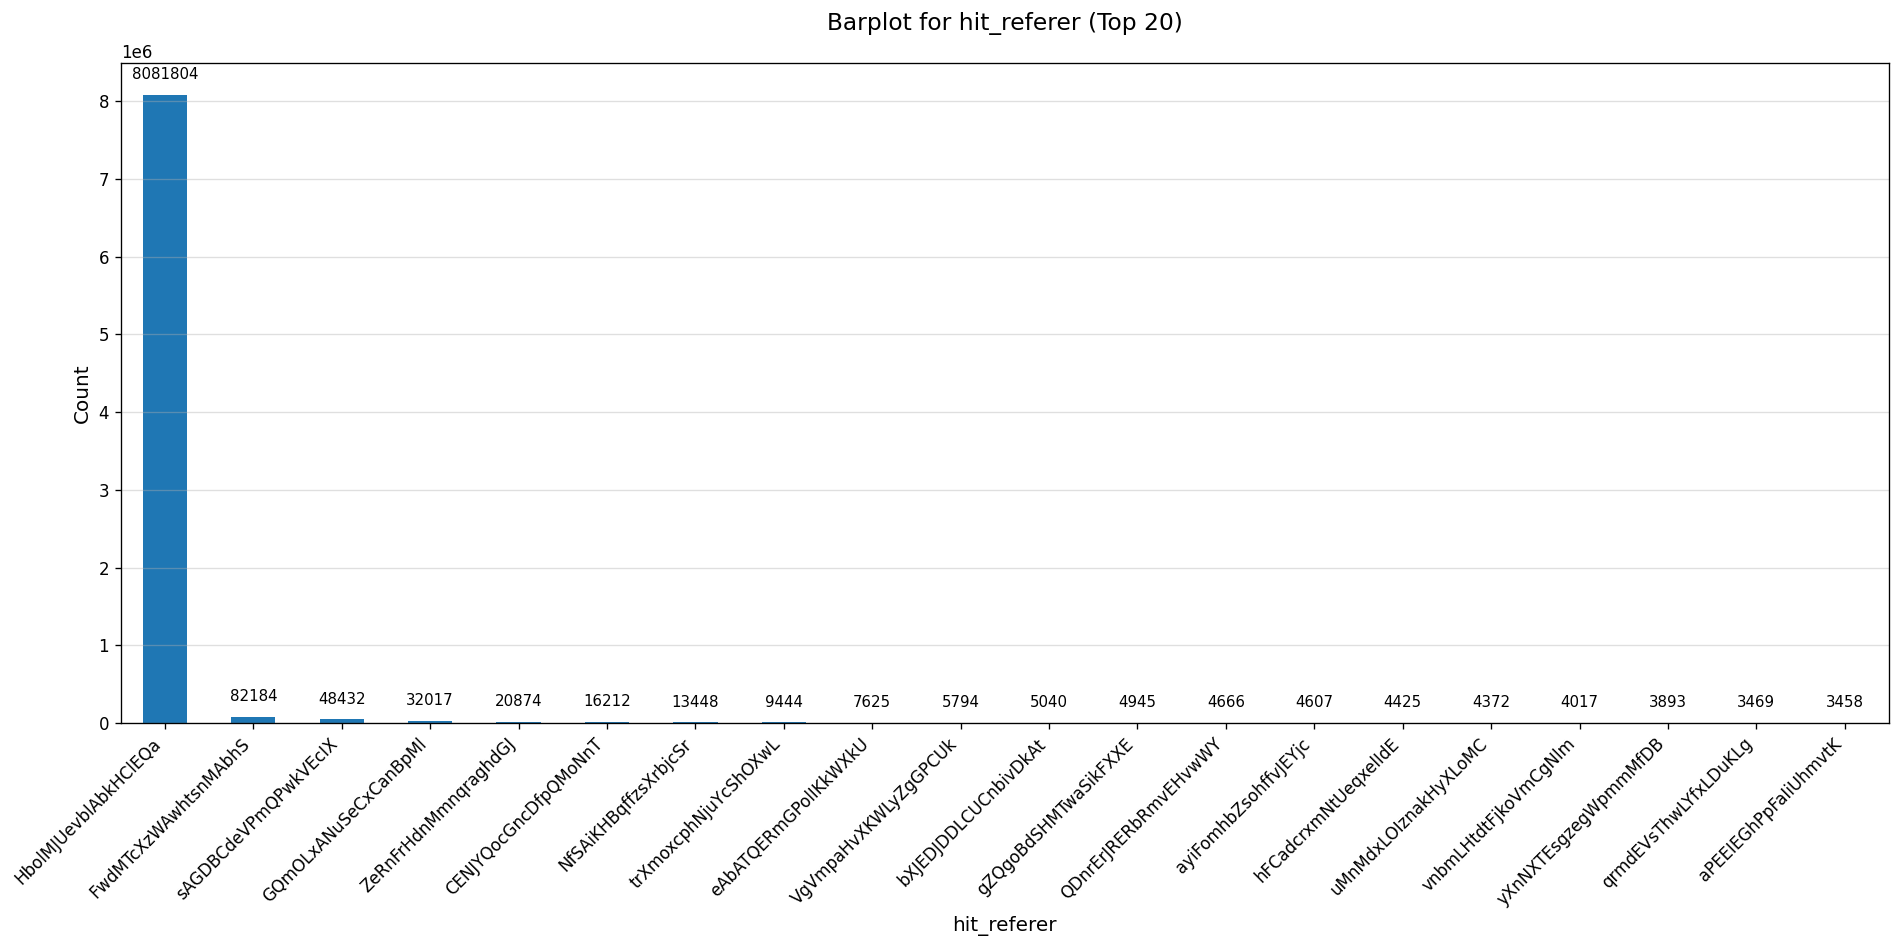

<ipython-input-49-a1e0a50307df>:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


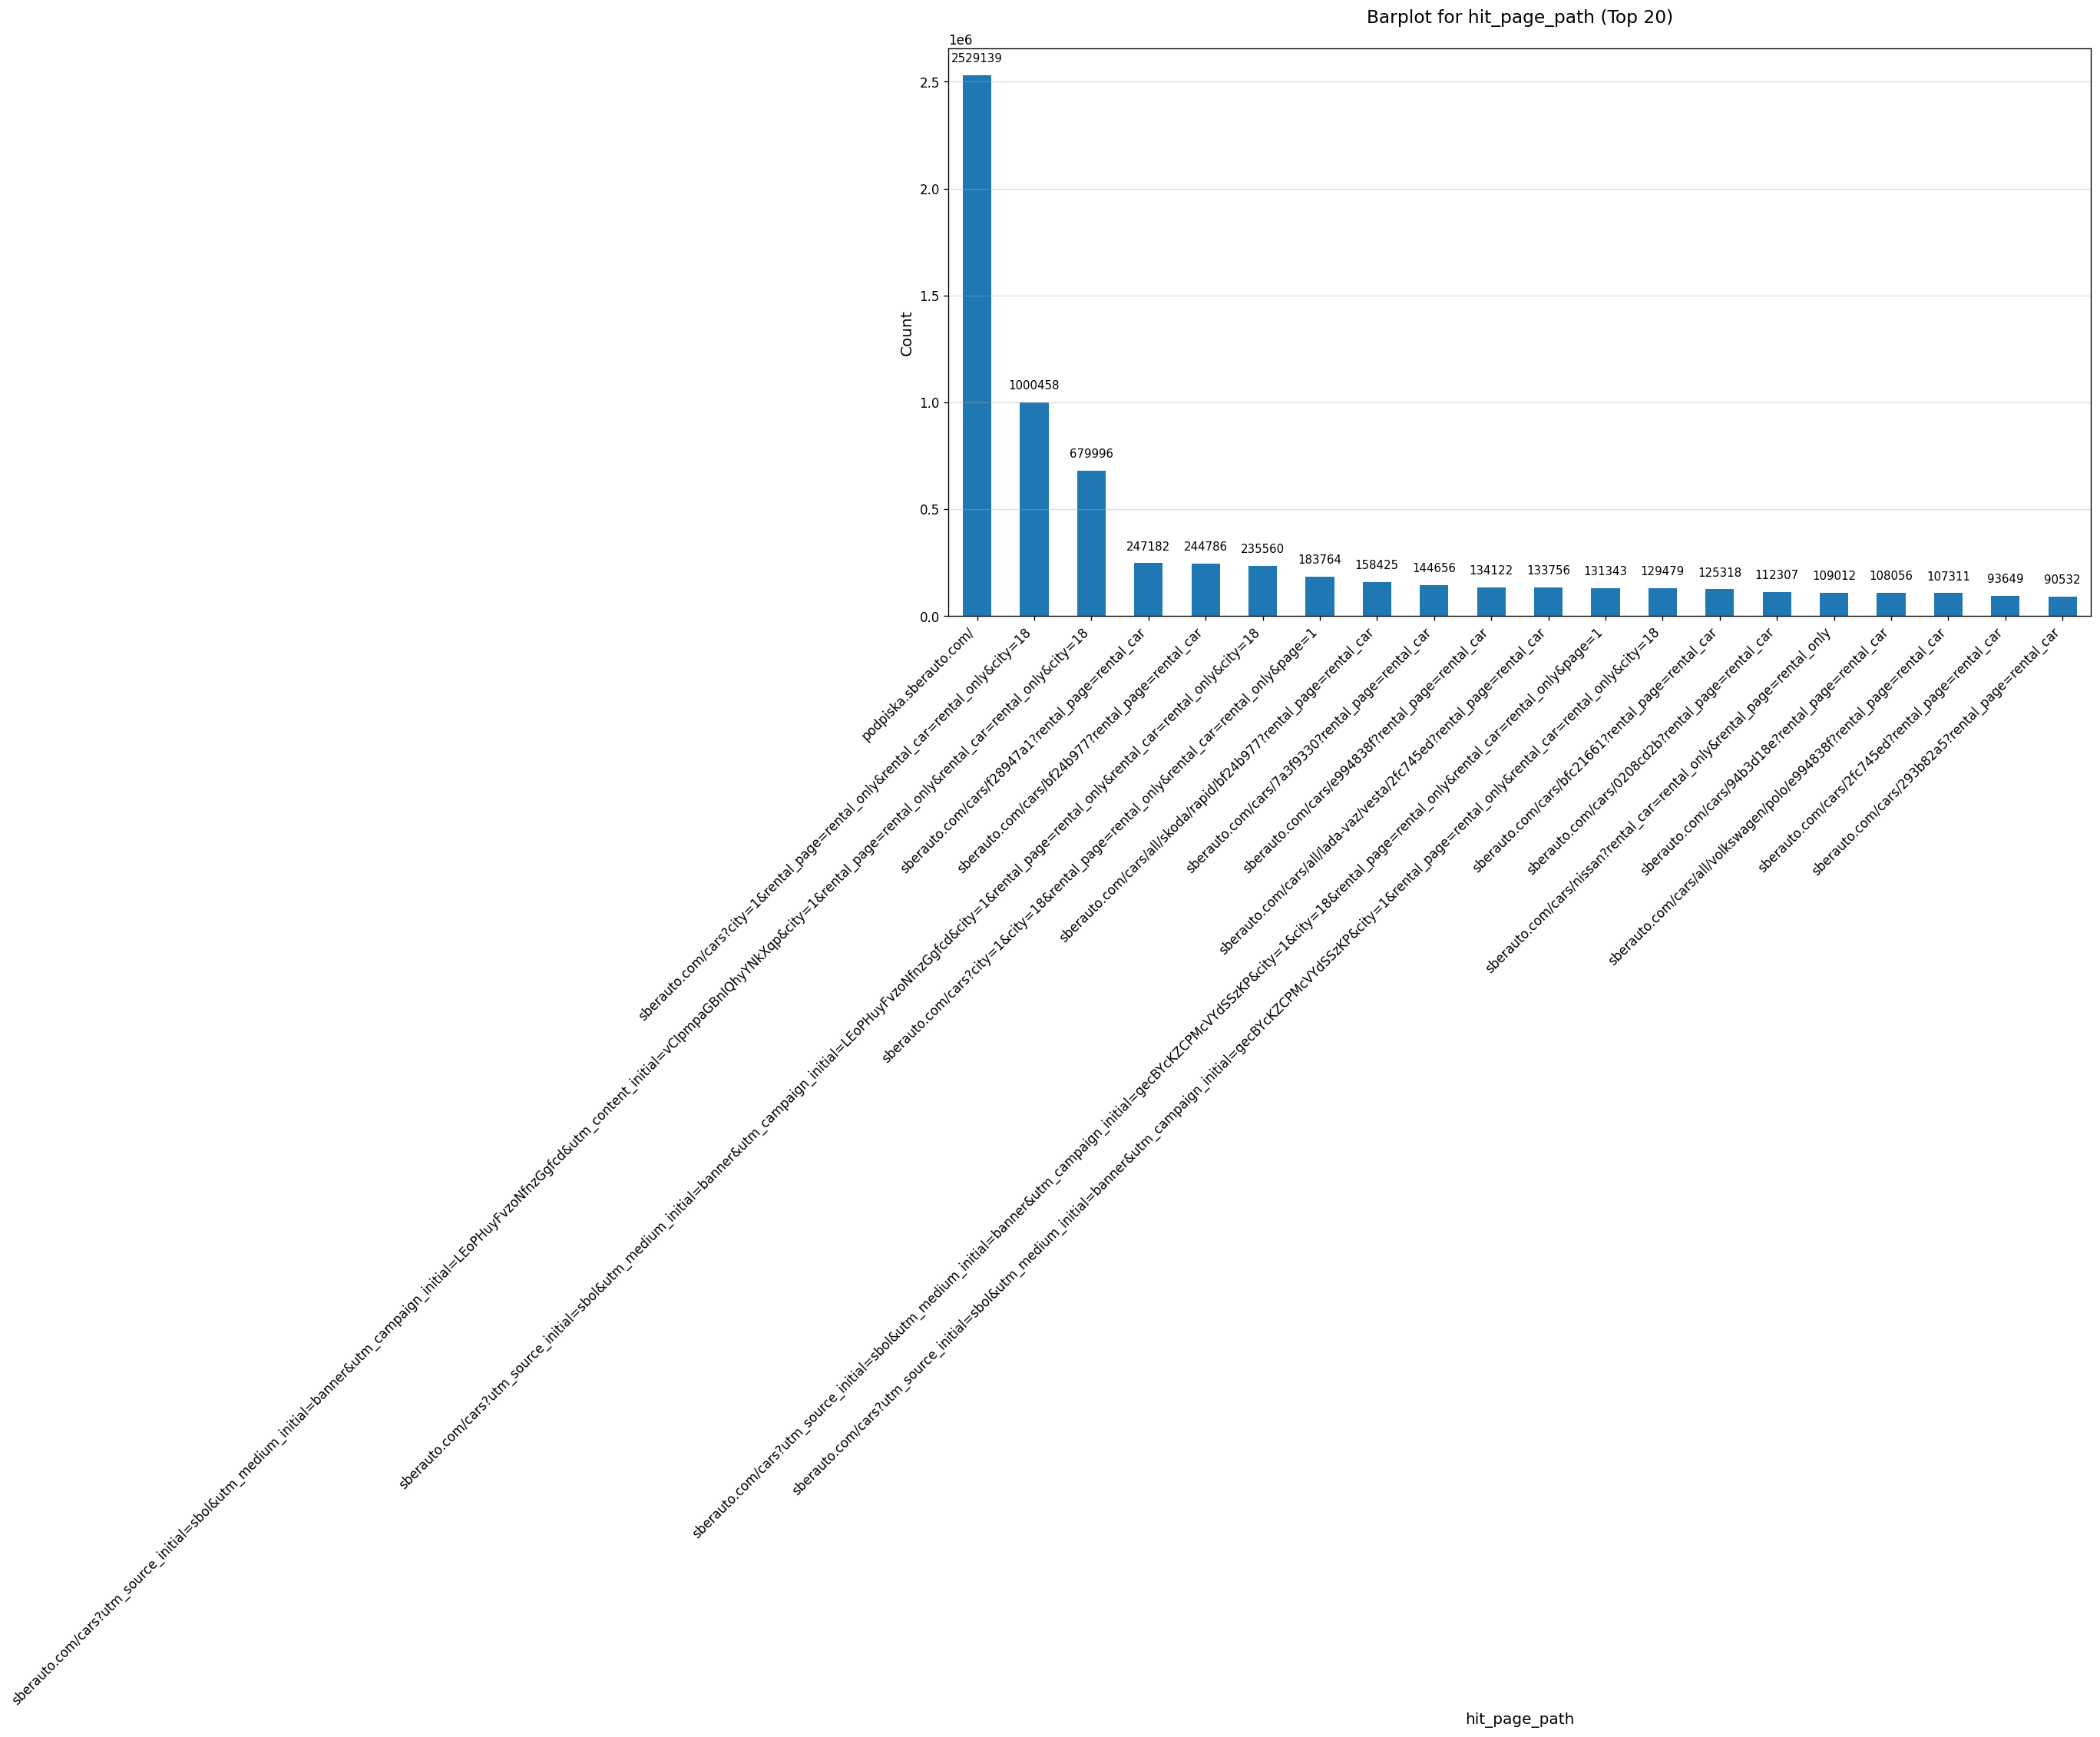

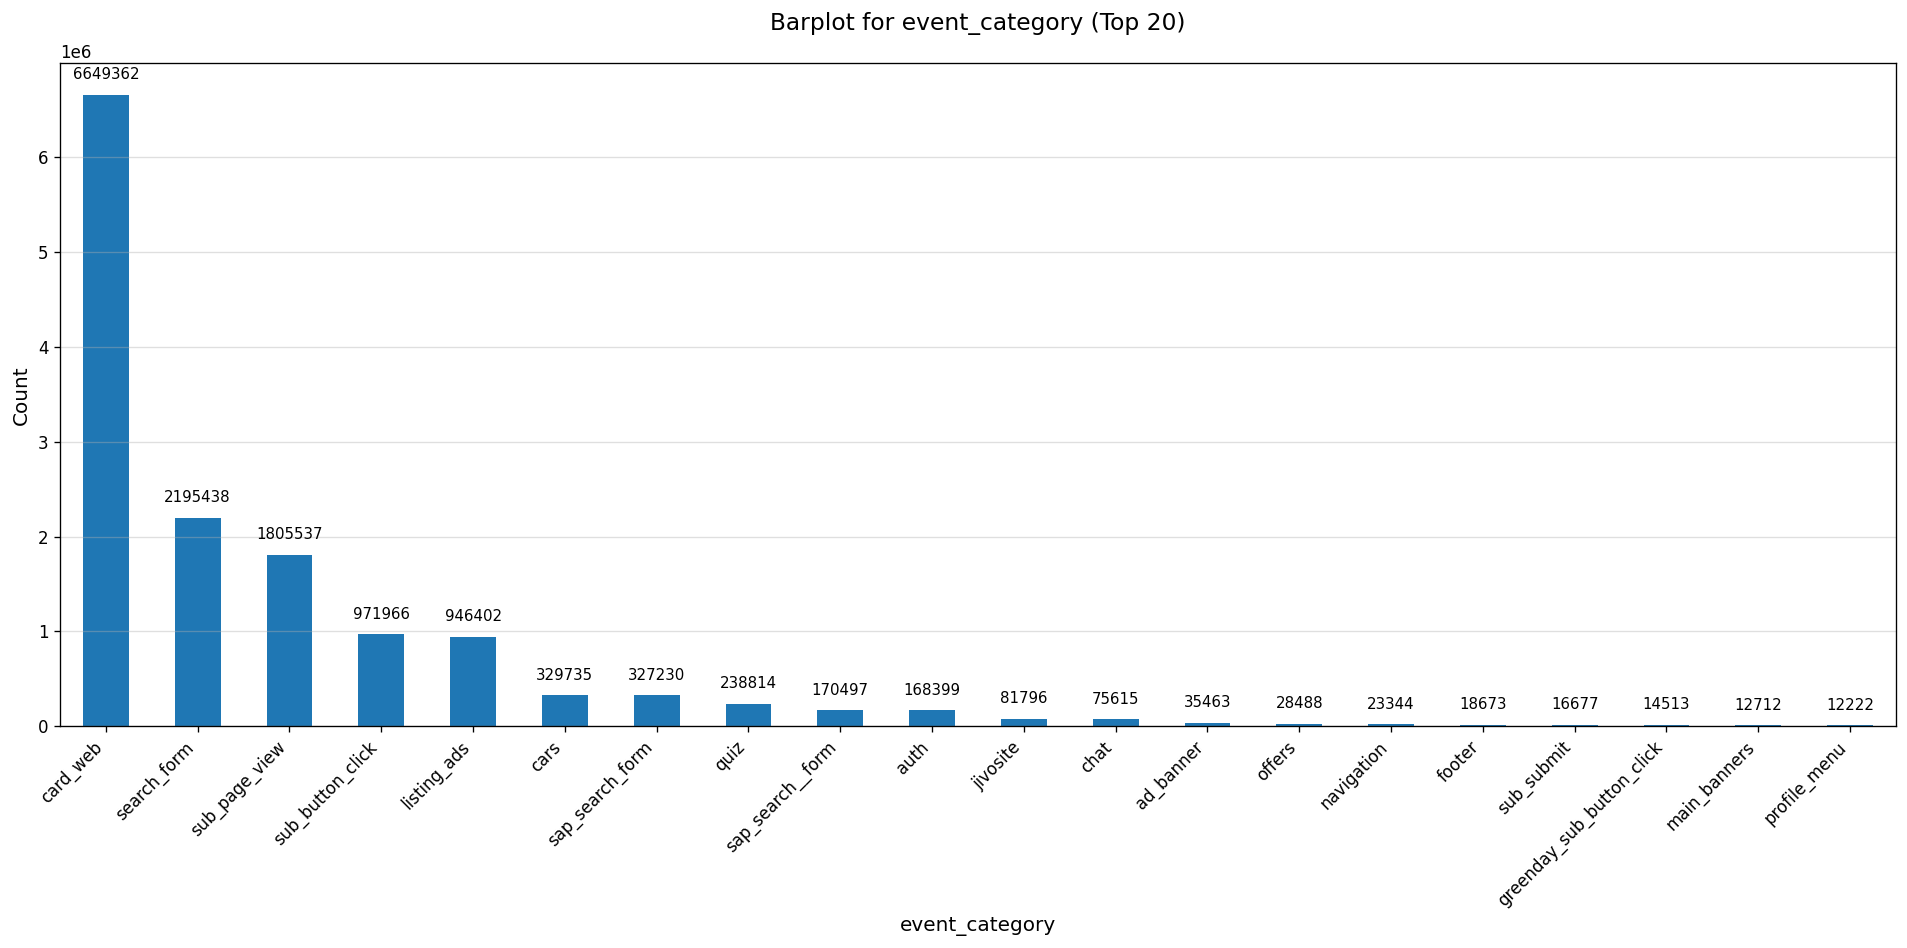

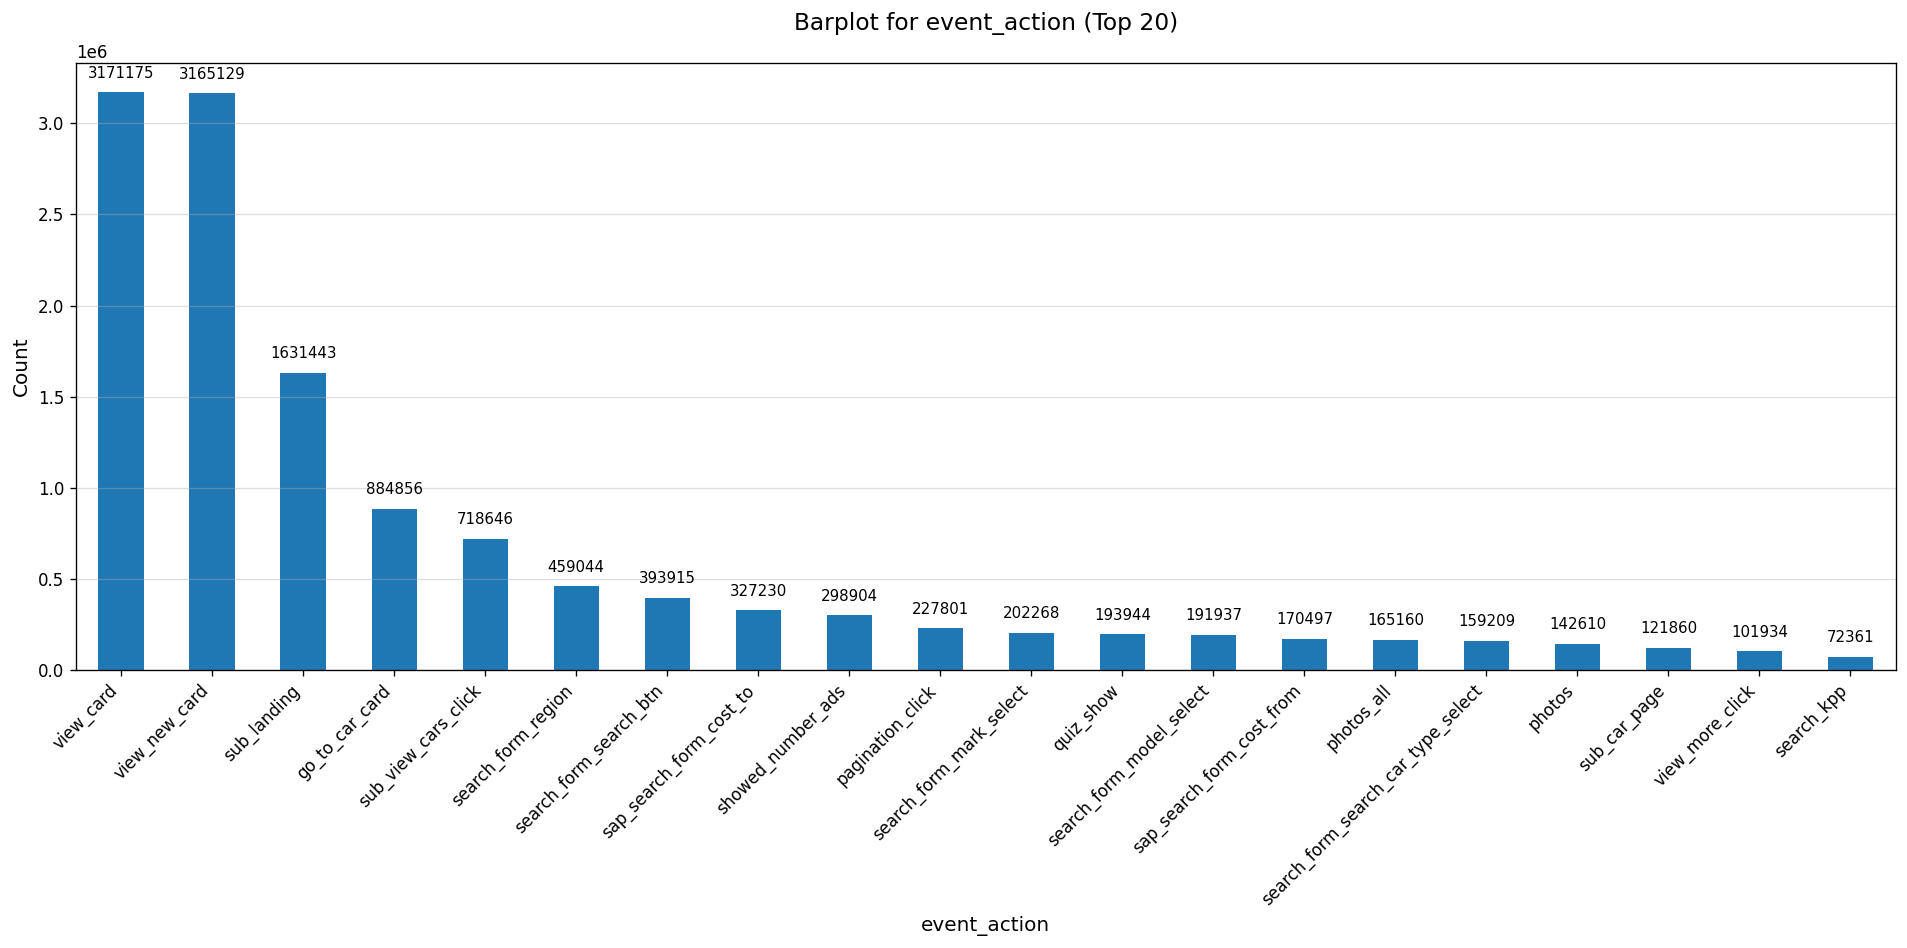

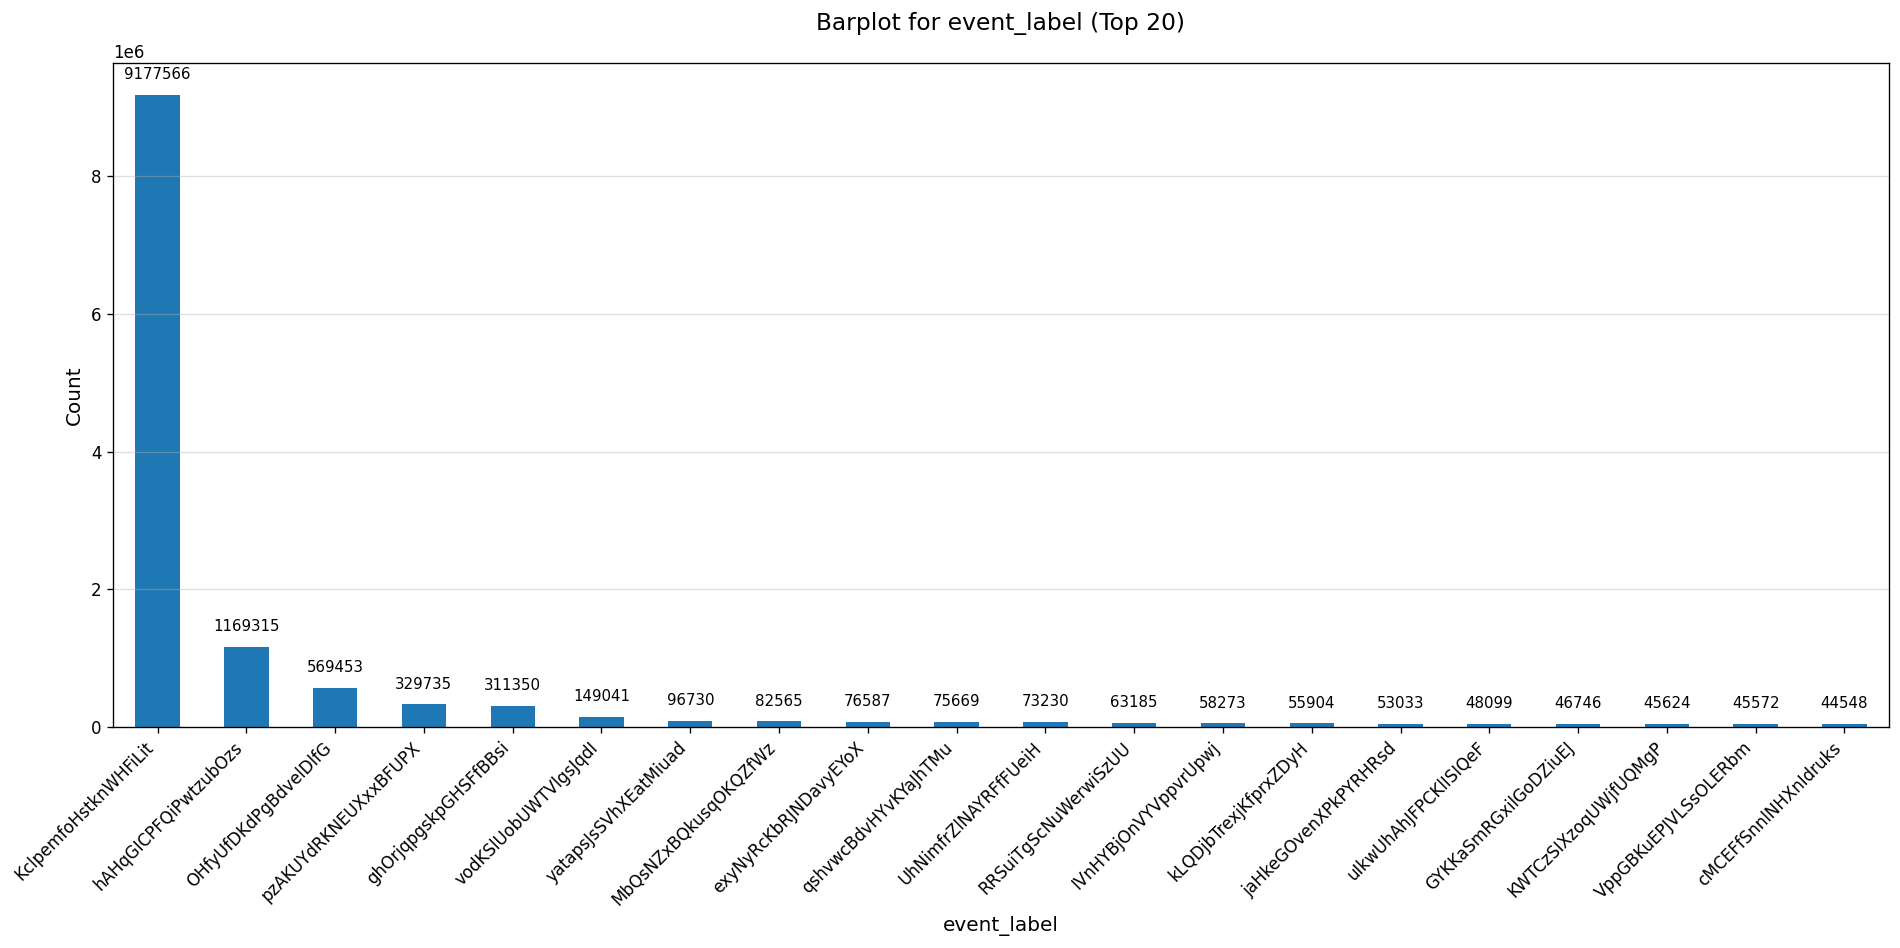

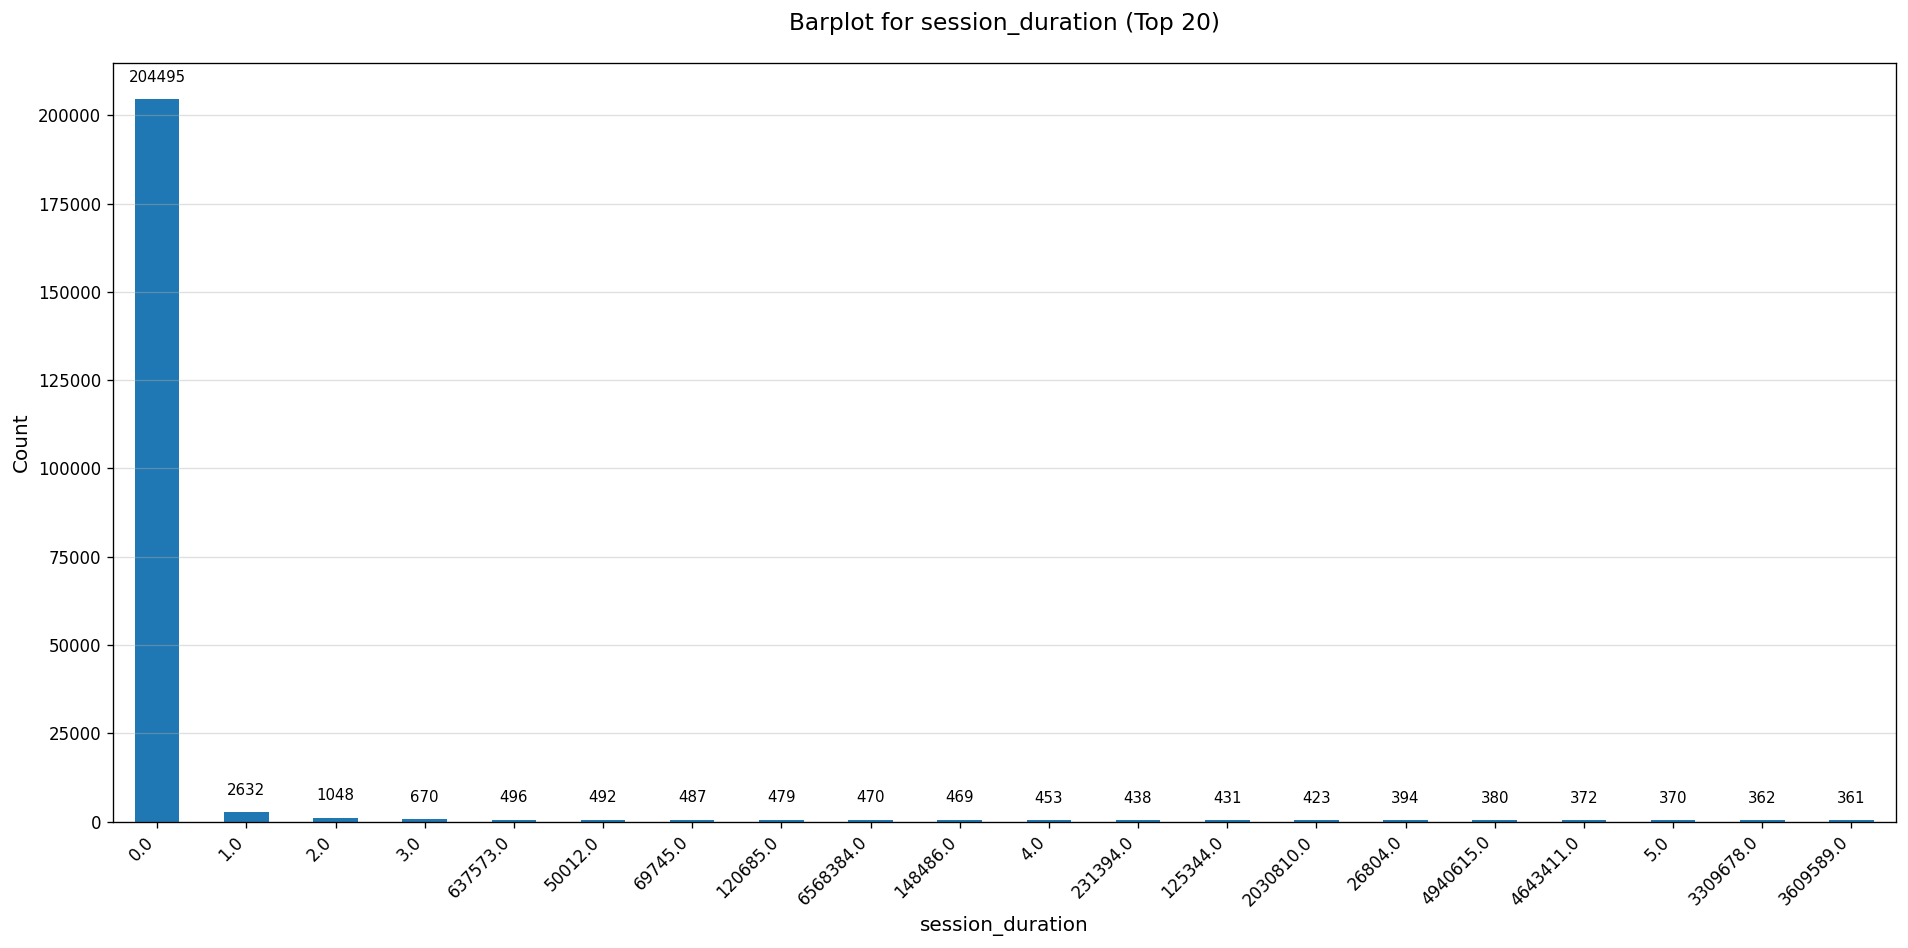

In [ ]:
for col in full_table.drop(columns=['session_id'], axis=1).columns:
    # Создаем фигуру с увеличенным размером и DPI
    plt.figure(figsize=(16, 8), dpi=120)

    # Получаем value_counts и сортируем для лучшего отображения
    counts = full_table[col].value_counts()

    # Если категорий больше 20, показываем только топ-20
    if len(counts) > 20:
        counts = counts.head(20)
        title_suffix = " (Top 20)"
    else:
        title_suffix = ""

    counts.plot(kind='bar')

    plt.title(f'Barplot for {col}{title_suffix}', fontsize=14, pad=20)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col, fontsize=12)

    # Гибкий поворот подписей в зависимости от количества категорий
    rotation = 45 if len(counts) <= 30 else 90
    plt.xticks(rotation=rotation, fontsize=10, ha='right')

    # Добавляем значения на столбцы
    for i, v in enumerate(counts):
        plt.text(i, v + 0.02*max(counts), str(v),
                ha='center', va='bottom', fontsize=9)

    plt.grid(axis='y', alpha=0.4)
    plt.tight_layout()
    plt.show()

In [ ]:
#Среднее количество действий на сессию
pl.DataFrame(full_table).group_by('session_id').agg(pl.count('hit_number')).mean()

shape: (1, 2)
┌────────────┬────────────┐
│ session_id ┆ hit_number │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ null       ┆ 8.180365   │
└────────────┴────────────┘

# Временные гистограммы

In [ ]:
full_table_for_gist = pd.merge(
    sessions_new.to_pandas(),
    hits_new.to_pandas(),
    on='session_id',
    how='left'
)

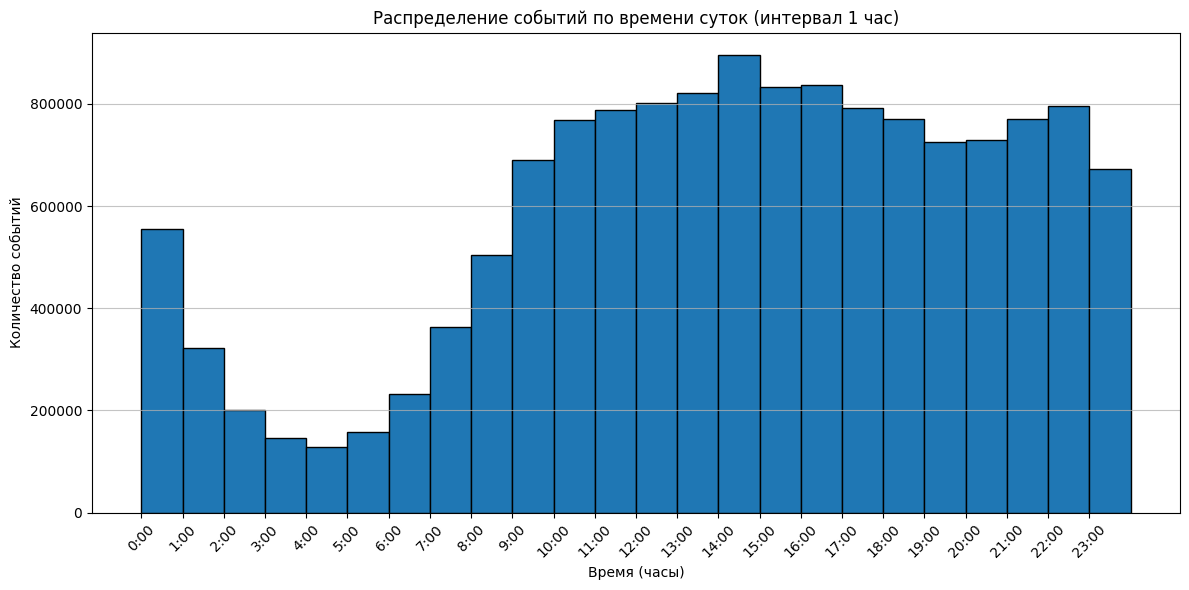

In [ ]:
plt.figure(figsize=(12, 6))

# Извлекаем только время из datetime
full_table_for_gist['time_only'] = full_table_for_gist['full_date'].dt.time

# Преобразуем время в часы для удобства построения
full_table_for_gist['hour'] = full_table_for_gist['full_date'].dt.hour + full_table_for_gist['full_date'].dt.minute/60

# Строим гистограмму с интервалом 1 час
plt.hist(full_table_for_gist['hour'], bins=24, range=(0, 24), edgecolor='black')

# Настройка осей
hours = range(0, 24)
plt.xticks(hours, [f"{h}:00" for h in hours], rotation=45)
plt.xlabel('Время (часы)')
plt.ylabel('Количество событий')
plt.title('Распределение событий по времени суток (интервал 1 час)')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

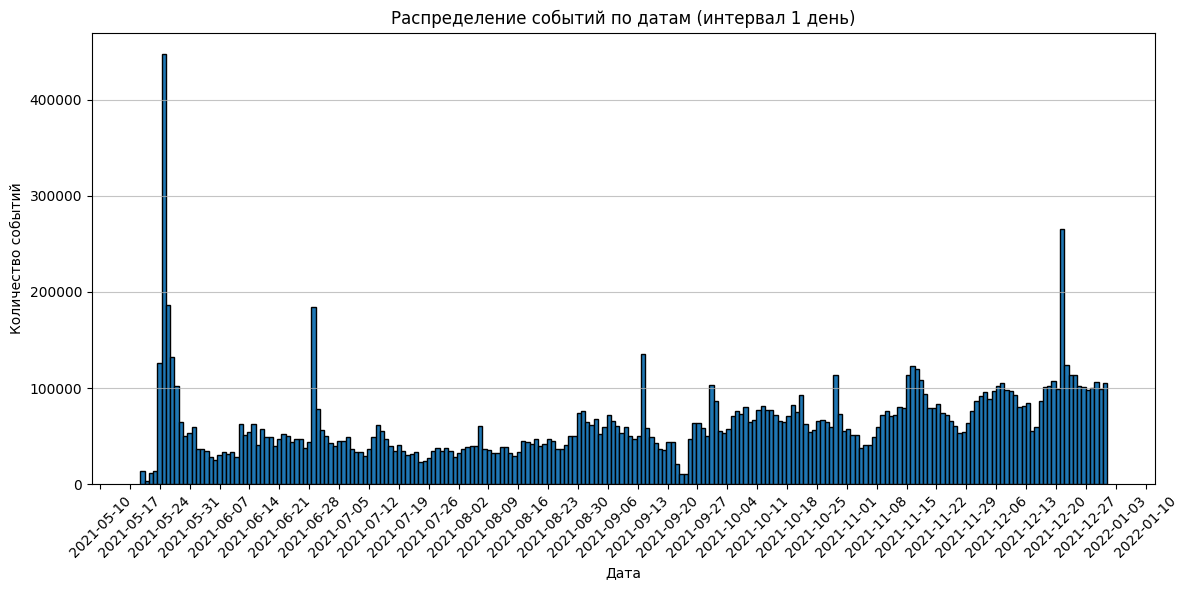

In [ ]:
plt.figure(figsize=(12, 6))

# Извлекаем только дату из datetime
full_table_for_gist['date_only'] = full_table_for_gist['full_date'].dt.date

# Строим гистограмму с интервалом 1 день
plt.hist(full_table_for_gist['full_date'], bins=len(full_table_for_gist['date_only'].unique()), edgecolor='black')

# Настройка осей
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(byweekday=0))  # 0 = Monday
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по датам (интервал 1 день)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Получение целевых действий, установление порога

In [ ]:
# Получить все события
event_actions = sorted(hits_new['event_action'].unique().to_list())

In [ ]:
# Получить только интересующие нас целевые действия
target_keys = ['sub_submit_', 'greenday_sub_submit_', 'titul_form', 'phone', 'chat', 'jivosite']
target_actions = [action for target in target_keys for action in event_actions if target in action]

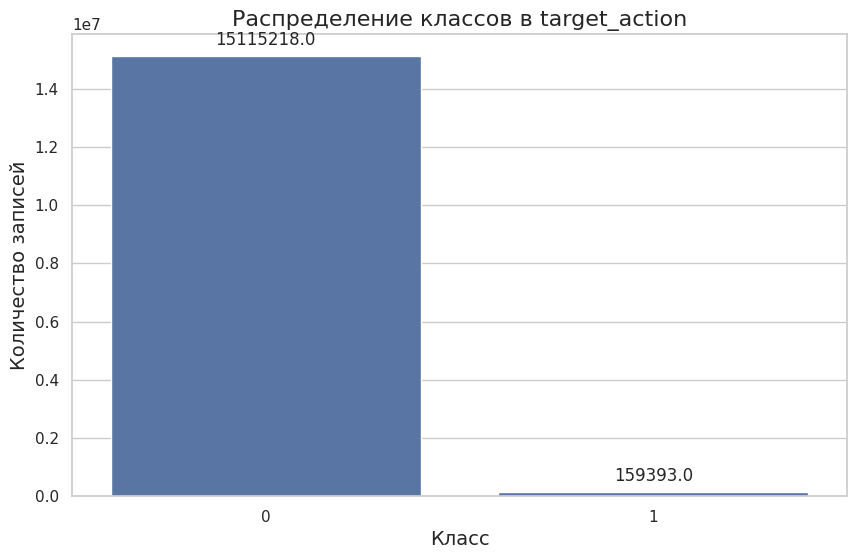

In [ ]:
#Распределение данных на классы - целевые и нецелевые действия
tmp_hits_for_gist = hits_new.with_columns(
    pl.when(
        pl.col('event_action').is_in(target_actions)
    ).then(1).otherwise(0).alias('is_target')
).group_by('is_target').len()

sns.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tmp_hits_for_gist['is_target'], y=tmp_hits_for_gist['len'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),  # Смещение над столбцом
                textcoords='offset points',
                fontsize=12)

# Добавление подписей
plt.title('Распределение классов в target_action', fontsize=16)
plt.xlabel('Класс', fontsize=14)
plt.ylabel('Количество записей', fontsize=14)

plt.show()

In [ ]:
# Отфильтровать hits, оставив только данные о сессиях с совершенными целевыми действиями
hits_target = hits_new.filter(pl.col('event_action').is_in(target_actions))

In [ ]:
# Среднее количество действий, приводящих к целевому действию (включительно с целевым)
hits_target.select(['hit_number']).mean()

shape: (1, 1)
┌────────────┐
│ hit_number │
│ ---        │
│ f64        │
╞════════════╡
│ 33.455949  │
└────────────┘

In [ ]:
sessions_new = sessions_new.with_columns(
    pl.when(
        ~pl.col('utm_medium').is_in(['organic', 'referral', '(none)'])
    ).then(
        pl.lit('paid_traffic')
    ).otherwise(
        pl.col('utm_medium')
    ).alias('utm_medium')
)

In [ ]:
value_counts_event_action = hits_new['event_action'].value_counts()
value_counts_event_action

shape: (229, 2)
┌─────────────────────────────────┬────────┐
│ event_action                    ┆ count  │
│ ---                             ┆ ---    │
│ str                             ┆ u32    │
╞═════════════════════════════════╪════════╡
│ greenday_sub_callback_submit_c… ┆ 950    │
│ forward_to_to_publish           ┆ 44     │
│ sub_faq                         ┆ 54780  │
│ search_form_search_btn          ┆ 428458 │
│ search_power_from               ┆ 21361  │
│ …                               ┆ …      │
│ setelem_credit_form_button      ┆ 16     │
│ search_form_year_from           ┆ 32218  │
│ search_power_to                 ┆ 12352  │
│ survey_buy_after_sell_start     ┆ 3      │
│ forward_to_documents            ┆ 46     │
└─────────────────────────────────┴────────┘

In [ ]:
threshold = 10

hits_new = hits_new.join(
    hits_new.group_by('event_action').len(),
    on='event_action',
    how='left'
).filter(
    pl.col('len') > threshold
).drop('len')

hits_new['event_action'].value_counts()

shape: (189, 2)
┌─────────────────────────┬───────┐
│ event_action            ┆ count │
│ ---                     ┆ ---   │
│ str                     ┆ u32   │
╞═════════════════════════╪═══════╡
│ jivo_telegram           ┆ 220   │
│ surname_entered         ┆ 4988  │
│ patronymic_entered      ┆ 4552  │
│ click_pos_credit        ┆ 294   │
│ potential_banner_show   ┆ 72    │
│ …                       ┆ …     │
│ search_form_cost_to     ┆ 40958 │
│ scrolling_to_sub_banner ┆ 275   │
│ phone_auth_success      ┆ 10274 │
│ tap_on_phone_800        ┆ 745   │
│ search_form_rental      ┆ 58198 │
└─────────────────────────┴───────┘

# Распределение сессий по трафику

In [ ]:
final_table = sessions_new.join(
    hits_new.drop('is_holiday', 'dayofweek', 'season'),
    on='session_id',
    how='left'
)

In [ ]:
traffic = ['organic', 'referral', '(none)']

In [ ]:
#Определение платный трафик или нет - бинарный признак
final_table = final_table.with_columns(
    pl.when(pl.col('utm_medium').is_in(traffic)).then(1).otherwise(0).alias("traffic_type"))
final_table.sort('session_id')

shape: (14_301_728, 31)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ event_act ┆ event_lab ┆ session_d ┆ traffic_ │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ ion       ┆ el        ┆ uration   ┆ type     │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ str       ┆ str       ┆ f64       ┆ i32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ sub_landi ┆ KclpemfoH ┆ 238700.0  ┆ 1        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆ ng        ┆ stknWHFiL ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆ it        ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ sub_view_ ┆ vodKSlUob ┆ 238700.0  ┆ 1        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆ cars_clic ┆ UWTVlgsJq ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆ k         ┆ dI        ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ search_fo ┆ TFQeHjaPO ┆ 238700.0  ┆ 1        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆ rm_mark_s ┆ mHRcZTrjj ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆ elect     ┆ Th        ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ go_to_my_ ┆ MChloQsvo ┆ 238700.0  ┆ 1        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆ idea      ┆ UNlbufYWq ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆ ln        ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ search_fo ┆ ghOrjqpgs ┆ 238700.0  ┆ 1        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆ rm_search ┆ kpGHSFfBB ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆ _btn      ┆ si        ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 999988617 ┆ 232827993 ┆ 2021-06-1 ┆ 06:00:00  ┆ … ┆ sub_landi ┆ KclpemfoH ┆ null      ┆ 0        │
│ 151873171 ┆ .16235562 ┆ 3         ┆           ┆   ┆ ng        ┆ stknWHFiL ┆           ┆          │
│ .16235562 ┆ 43        ┆           ┆           ┆   ┆           ┆ it        ┆           ┆          │
│ 43.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 999988617 ┆ 232827993 ┆ 2021-06-1 ┆ 06:00:00  ┆ … ┆ sub_view_ ┆ vodKSlUob ┆ null      ┆ 0        │
│ 151873171 ┆ .16235562 ┆ 3         ┆           ┆   ┆ cars_clic ┆ UWTVlgsJq ┆           ┆          │
│ .16235562 ┆ 43        ┆           ┆           ┆   ┆ k         ┆ dI        ┆           ┆          │
│ 43.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 999988617 ┆ 232827993 ┆ 2021-06-1 ┆ 06:00:00  ┆ … ┆ search_fo ┆ vjCtPQgqI ┆ null      ┆ 0        │
│ 151873171 ┆ .16235562 ┆ 3         ┆           ┆   ┆ rm_region ┆ tKOqWsBPy ┆           ┆          │
│ .16235562 ┆ 43        ┆           ┆           ┆   ┆           ┆ mc        ┆           ┆          │
│ 43.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 999988617 ┆ 232827993 ┆ 2021-06-1 ┆

In [ ]:
# Для подсчета конверсий
hits_unique_sessions = final_table.unique(subset=['session_id'])

In [ ]:
# Сессии с органическим трафиком (organic, referral, (none))
hits_organic = hits_unique_sessions.filter(pl.col('traffic_type') == 1).sort('session_id')
num_organic = hits_organic.filter(pl.col('utm_medium') == 'organic').n_unique()
num_referral = hits_organic.filter(pl.col('utm_medium') == 'referral').n_unique()
num_none = hits_organic.filter(pl.col('utm_medium') == '(none)').n_unique()
print(f"Organic sessions: {num_organic}\nReferral sessions: {num_referral}\nNone sessions: {num_none}")

Organic sessions: 58709
Referral sessions: 139634
None sessions: 278746


In [ ]:
# Сессии с платным трафиком
num_paid = hits_unique_sessions.filter(pl.col('traffic_type') == 0).sort('session_id').n_unique()
print(f"Paid sessions: {num_paid}")

Paid sessions: 1253295


In [ ]:
# Сессии с органическим трафиком (organic, referral, (none)) и целевым действием
hits_organic_target = hits_organic.filter(pl.col('event_action').is_in(target_actions)).sort('session_id')
num_organic_target = hits_organic_target.filter(pl.col('utm_medium') == 'organic').n_unique()
num_referral_target = hits_organic_target.filter(pl.col('utm_medium') == 'referral').n_unique()
num_none_target = hits_organic_target.filter(pl.col('utm_medium') == '(none)').n_unique()
print(f"Organic target sessions: {num_organic_target}\nReferral target sessions: {num_referral_target}\nNone target sessions: {num_none_target}")

Organic target sessions: 312
Referral target sessions: 1008
None target sessions: 1030


In [ ]:
# Сессии с платным трафиком и целевым действием
num_paid_target = hits_unique_sessions.filter(pl.col('event_action').is_in(target_actions) & (pl.col('traffic_type') == 0)).sort('session_id').n_unique()
print(f"Paid target sessions: {num_paid_target}")

Paid target sessions: 5306


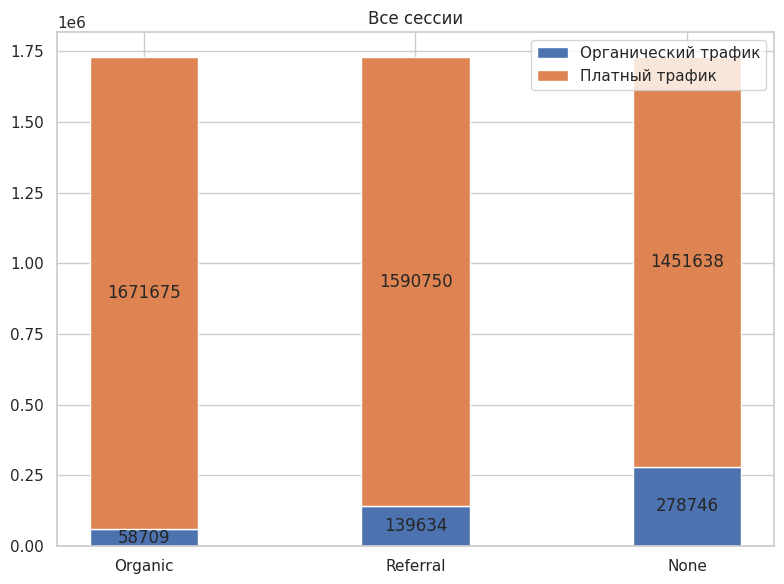

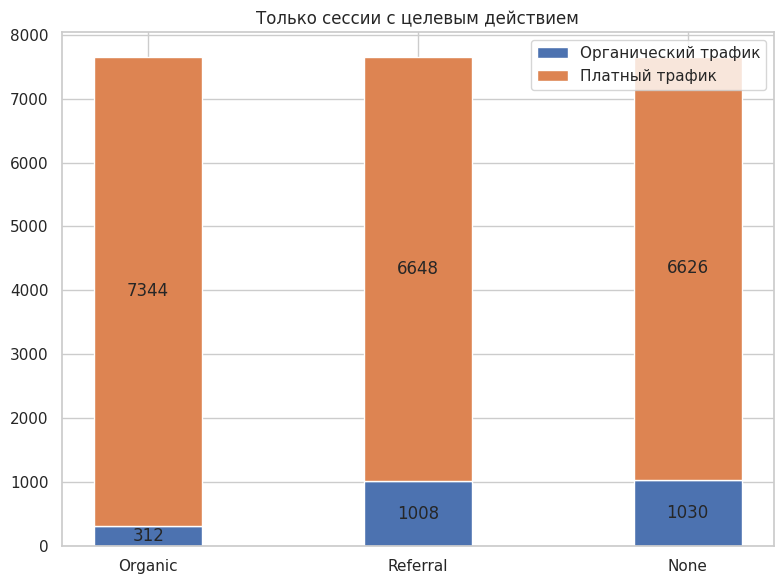

In [ ]:
sessions_sum = hits_unique_sessions.shape[0]
target_sessions_num = hits_unique_sessions.filter(pl.col('event_action').is_in(target_actions)).sort('session_id').n_unique()

cols = ('Organic', 'Referral', 'None')
conversion_counts = {
    'Органический трафик': np.array([num_organic, num_referral, num_none]),
    'Платный трафик': np.array([sessions_sum - num_organic, sessions_sum - num_referral, sessions_sum - num_none]),
}
conversion_target_counts = {
    'Органический трафик': np.array([num_organic_target, num_referral_target, num_none_target]),
    'Платный трафик': np.array([target_sessions_num - num_organic_target, target_sessions_num - num_referral_target, target_sessions_num - num_none_target]),
}
width = 0.4

all_counts = [conversion_counts, conversion_target_counts]

for i, count in enumerate(all_counts):
    fig, ax = plt.subplots(figsize=(8, 6))
    bottom = np.zeros(3)

    for conversion, conversion_count in count.items():
        p = ax.bar(cols, conversion_count, width, label=conversion, bottom=bottom)
        bottom += conversion_count

        ax.bar_label(p, fmt='%.0f', label_type='center')
        ax.set_title('Все сессии') if i == 0 else ax.set_title('Только сессии с целевым действием')

    ax.legend()
    plt.tight_layout()
    plt.show()

# FE

In [ ]:
final_table.head(5)

shape: (5, 31)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ event_act ┆ event_lab ┆ session_d ┆ traffic_ │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ ion       ┆ el        ┆ uration   ┆ type     │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ str       ┆ str       ┆ f64       ┆ i32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 905544597 ┆ 210838531 ┆ 2021-11-1 ┆ 08:21:30  ┆ … ┆ sub_landi ┆ KclpemfoH ┆ 0.0       ┆ 0        │
│ 018549464 ┆ .16368672 ┆ 4         ┆           ┆   ┆ ng        ┆ stknWHFiL ┆           ┆          │
│ .16368672 ┆ 88        ┆           ┆           ┆   ┆           ┆ it        ┆           ┆          │
│ 90.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ search_fo ┆ KWTCzSIXz ┆ 111457.0  ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆ rm_region ┆ oqUWjfUQM ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆ gP        ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ search_fo ┆ CBqnBQaKo ┆ 111457.0  ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆ rm_region ┆ QUyWJhLcx ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆ xN        ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ search_fo ┆ exyNyRcKb ┆ 111457.0  ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆ rm_region ┆ RJNDavyEY ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆ oX        ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ sub_landi ┆ KclpemfoH ┆ 111457.0  ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆ ng        ┆ stknWHFiL ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆ it        ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# Создаем target

new_target = [
    "sub_submit_success", "greenday_sub_submit_success", "sub_callback_submit_click", "sub_custom_question_submit_click", "sub_car_request_submit_click", # Заявка
    "callback requested", "form_request_call_sent", "phone_entered", # Звонок
    "client initiate chat", "user gave contacts during chat", "chat requested", "typing_in_leasing_chat" # Чат
    ]
final_table = final_table.with_columns(
    pl.when(pl.col("event_action").is_in(new_target))
    .then(1)
    .otherwise(0)
    .alias("target")
)

In [ ]:
final_table.head(3)

shape: (3, 32)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ session_id ┆ client_id  ┆ visit_dat ┆ visit_tim ┆ … ┆ event_lab ┆ session_d ┆ traffic_t ┆ target │
│ ---        ┆ ---        ┆ e         ┆ e         ┆   ┆ el        ┆ uration   ┆ ype       ┆ ---    │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ i32    │
│            ┆            ┆ str       ┆ str       ┆   ┆ str       ┆ f64       ┆ i32       ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 9055445970 ┆ 210838531. ┆ 2021-11-1 ┆ 08:21:30  ┆ … ┆ KclpemfoH ┆ 0.0       ┆ 0         ┆ 0      │
│ 18549464.1 ┆ 1636867288 ┆ 4         ┆           ┆   ┆ stknWHFiL ┆           ┆           ┆        │
│ 636867290. ┆            ┆           ┆           ┆   ┆ it        ┆           ┆           ┆        │
│ …          ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 9055446045 ┆ 2108385331 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ KWTCzSIXz ┆ 111457.0  ┆ 0         ┆ 0      │
│ 651783499. ┆ .164064852 ┆ 8         ┆           ┆   ┆ oqUWjfUQM ┆           ┆           ┆        │
│ 1640648526 ┆ 3          ┆           ┆           ┆   ┆ gP        ┆           ┆           ┆        │
│ …          ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 9055446045 ┆ 2108385331 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ CBqnBQaKo ┆ 111457.0  ┆ 0         ┆ 0      │
│ 651783499. ┆ .164064852 ┆ 8         ┆           ┆   ┆ QUyWJhLcx ┆           ┆           ┆        │
│ 1640648526 ┆ 3          ┆           ┆           ┆   ┆ xN        ┆           ┆           ┆        │
│ …          ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴────────┘

In [ ]:
unique_actions_df = final_table.select("event_action").unique()

In [ ]:
# unique_actions_df.write_csv("/content/drive/MyDrive/Colab Notebooks/study/data/unique_actions.csv")
# unique_actions_df.write_csv("/content/drive/MyDrive/mephi_ml/hackaton/unique_actions.csv")
unique_actions_df.write_csv("/content/drive/MyDrive/mephi_ml/Hack/unique_actions.csv")

In [ ]:
# Создаем traffic_type_cat
organic_mediums = ["organic", "referral", "(none)"]
final_table = final_table.with_columns(
    pl.when(pl.col("utm_medium").is_in(organic_mediums))
    .then(pl.lit("organic"))
    .otherwise(pl.lit("paid"))
    .alias("traffic_type_cat")
)

## Частотные признаки:
- Частота, с которой встречаются определённые действия. Чтобы это сделать, нужно понять, какие страницы/действия (не являющиеся таргетными) являются важными и гипотетически могут влиять на конверсию. Я предполагаю, что это каталог. Причём предполагаю, что большое количество посещений каталога негативно влияет на конверсию, равно как и малое. Думаю, что есть некий интервал средних значений. В целом, можно исследовать это направление и включить его в EDA. Аналогично для других страниц/действий.
- Наиболее часто встречающееся действие
- Наименее часто встречающееся действие

In [ ]:
# Каталог. Здесь может понадобиться доп ресёрч, пока взял только взаимодействие с каталогом.
# Ресёрч может быть выполнен в виде:
# Зависимость конверсии от распределения действий, приведённых ниже
catalog_actions = [
    "search_form_mark_select", "search_form_model_select",
    "go_to_car_card", "view_used_card"
]

# Считаем частоту действий по сессиям
catalog_visits = (
    final_table.filter(pl.col("event_action").is_in(catalog_actions))
    .group_by(pl.col("session_id"))
    .agg(pl.count().alias("catalog_visits"))
)

# Объединяем с исходным датафреймом
final_table = final_table.join(catalog_visits, on="session_id", how="left")
final_table = final_table.with_columns(pl.col("catalog_visits").fill_null(0))

<ipython-input-134-2a0c960d268b>:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("catalog_visits"))


In [ ]:
# общее количество действий в сессии
total_actions = final_table.group_by("session_id").agg(pl.count().alias("total_actions"))
final_table = final_table.join(total_actions, on="session_id", how="left")

<ipython-input-135-bd6bbcaac823>:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  total_actions = final_table.group_by("session_id").agg(pl.count().alias("total_actions"))


In [ ]:
# взаимодействия с формой
form_actions = [
    "phone_entered", "surname_entered", "name_entered",
    "patronymic_entered", "code_sms_entered_success"
]

form_interactions = (
    final_table.filter(pl.col("event_action").is_in(form_actions))
    .group_by("session_id")
    .agg(pl.count().alias("form_interactions"))
)

final_table = final_table.join(form_interactions, on="session_id", how="left")
final_table = final_table.with_columns(pl.col("form_interactions").fill_null(0))

<ipython-input-136-2ed98c846bbe>:10: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("form_interactions"))


In [ ]:
final_table.head(3)

shape: (3, 36)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ traffic_t ┆ catalog_v ┆ total_act ┆ form_int │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ ype_cat   ┆ isits     ┆ ions      ┆ eraction │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ s        │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ str       ┆ u32       ┆ u32       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ u32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 905544597 ┆ 210838531 ┆ 2021-11-1 ┆ 08:21:30  ┆ … ┆ paid      ┆ 0         ┆ 1         ┆ 0        │
│ 018549464 ┆ .16368672 ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│ .16368672 ┆ 88        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 90.…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ paid      ┆ 0         ┆ 16        ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 905544604 ┆ 210838533 ┆ 2021-12-2 ┆ 02:42:06  ┆ … ┆ paid      ┆ 0         ┆ 16        ┆ 0        │
│ 565178349 ┆ 1.1640648 ┆ 8         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 9.1640648 ┆ 523       ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 526…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

## Временные признаки

In [ ]:
#признак is_evening
final_table = final_table.with_columns(
    is_evening=(pl.col("full_date").dt.hour() >= 18).cast(pl.Int8)
)

## Признаки последовательности

In [ ]:
# Переход с главной страницы на каталог → на страницу оформления
final_table_pd = final_table.to_pandas()

# Создаем флаги для ключевых последовательностей
def check_sequence(group, actions):
    actions_list = group["event_action"].tolist()
    for i in range(len(actions_list) - len(actions) + 1):
        if actions_list[i:i+len(actions)] == actions:
            return 1
    return 0

# Проверяем последовательность: "click_on_subscription" → "sub_submit_success"
# Также возможны и другие
final_table_pd["main_to_catalog"] = final_table_pd.groupby("session_id").apply(
    lambda x: check_sequence(x, ["click_on_subscription", "sub_submit_success"])
).reset_index(level=0, drop=True)

final_table = pl.from_pandas(final_table_pd)

<ipython-input-138-b59a8f6e440f>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_table_pd["main_to_catalog"] = final_table_pd.groupby("session_id").apply(


In [ ]:
# Считаем количество повторных ошибок ввода SMS-кода
error_actions = ["code_sms_incorrect_in", "code_sms_limit_error"]
error_sessions = (
    final_table.filter(pl.col("event_action").is_in(error_actions))
    .group_by("session_id")
    .agg(pl.count().alias("sms_errors"))
)

# Добавляем флаг для пользователей с ≥3 ошибками
final_table = final_table.join(error_sessions, on="session_id", how="left")
final_table = final_table.with_columns(
    (pl.col("sms_errors") >= 3).cast(pl.Int32).alias("multiple_sms_errors")
)

<ipython-input-139-9698d4ce2575>:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("sms_errors"))


In [ ]:
# Считаем количество уникальных страниц в сессии
unique_pages = (
    final_table.group_by("session_id")
    .agg(pl.n_unique("hit_page_path").alias("unique_pages"))
)

final_table = final_table.join(unique_pages, on="session_id", how="left")

## Количественные признаки

In [ ]:
final_table_pd = final_table.to_pandas()

# 1. Преобразуем hit_time из миллисекунд в секунды
final_table_pd["hit_time_sec"] = final_table_pd["hit_time"] / 1000

# 2. Сортируем по session_id и hit_number (порядок действий в сессии)
final_table_pd = final_table_pd.sort_values(by=["session_id", "hit_number"])

# 3. Вычисляем разницу между последовательными действиями
final_table_pd["time_diff"] = final_table_pd.groupby("session_id")["hit_time_sec"].diff()

# 4. Рассчитываем среднее время между действиями по сессиям
avg_time_between_actions = (
    final_table_pd.groupby("session_id")["time_diff"]
    .mean()
    .reset_index(name="avg_time_between_actions")
)

# 5. Объединяем с исходным датафреймом
final_table = pl.from_pandas(final_table_pd.merge(avg_time_between_actions, on="session_id", how="left"))

In [ ]:
# Вычисляем долю ошибок в сессии
total_actions = final_table.group_by("session_id").agg(pl.count().alias("total_actions"))
errors = final_table.filter(pl.col("event_action").str.contains("error")).group_by("session_id").agg(pl.count().alias("error_count"))

# Объединяем и вычисляем долю
final_table = final_table.join(total_actions, on="session_id", how="left")
final_table = final_table.join(errors, on="session_id", how="left")
final_table = final_table.with_columns(
    (pl.col("error_count") / pl.col("total_actions")).fill_null(0).alias("error_ratio")
)

<ipython-input-142-73c764722876>:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  total_actions = final_table.group_by("session_id").agg(pl.count().alias("total_actions"))
<ipython-input-142-73c764722876>:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  errors = final_table.filter(pl.col("event_action").str.contains("error")).group_by("session_id").agg(pl.count().alias("error_count"))


In [ ]:
# Считаем клики по пагинации
pagination_clicks = (
    final_table.filter(pl.col("event_action") == "pagination_click")
    .group_by("session_id")
    .agg(pl.count().alias("pagination_clicks"))
)

final_table = final_table.join(pagination_clicks, on="session_id", how="left")
final_table = final_table.with_columns(pl.col("pagination_clicks").fill_null(0))

<ipython-input-143-2d36e833ad6c>:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("pagination_clicks"))


## Дополнительные признаки

In [ ]:
# Использование фильтров в каталоге
filter_actions = [
    "search_form_mark_select", "search_form_model_select",
    "search_form_modification_select", "search_form_cost_to"
]

final_table = final_table.with_columns(
    pl.when(pl.col("event_action").is_in(filter_actions))
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("used_filters")
)

In [ ]:
# Просмотр цен
price_views = ["calculate", "search_form_cost_from", "search_form_cost_to"]
final_table = final_table.with_columns(
    pl.when(pl.col("event_action").is_in(price_views))
    .then(pl.lit(1))
    .otherwise(pl.lit(0))
    .alias("viewed_pricing")
)

In [ ]:
# Количество повторных попыток
retry_actions = ["sub_submit_error", "code_sms_incorrect_in"]
retry_sessions = (
    final_table.filter(pl.col("event_action").is_in(retry_actions))
    .group_by("session_id")
    .agg(pl.count().alias("retry_attempts"))
)

final_table = final_table.join(retry_sessions, on="session_id", how="left")
final_table = final_table.with_columns(pl.col("retry_attempts").fill_null(0))

<ipython-input-146-22b7f0bd0f82>:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("retry_attempts"))


In [ ]:
final_table = final_table.drop(pl.col("error_count"))
final_table.head(3)

shape: (3, 50)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ paginatio ┆ used_filt ┆ viewed_pr ┆ retry_at │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ n_clicks  ┆ ers       ┆ icing     ┆ tempts   │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ u32       ┆ i32       ┆ i32       ┆ u32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

# Итоговое агрегирование данных

In [ ]:
final_table.head(6)

shape: (6, 47)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ session_i ┆ client_id ┆ visit_dat ┆ visit_tim ┆ … ┆ avg_time_ ┆ total_act ┆ error_rat ┆ paginati │
│ d         ┆ ---       ┆ e         ┆ e         ┆   ┆ between_a ┆ ions_righ ┆ io        ┆ on_click │
│ ---       ┆ str       ┆ ---       ┆ ---       ┆   ┆ ctions    ┆ t         ┆ ---       ┆ s        │
│ str       ┆           ┆ str       ┆ str       ┆   ┆ ---       ┆ ---       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ u32       ┆           ┆ u32      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 100001017 ┆ 232833013 ┆ 2021-10-2 ┆ 21:24:03  ┆ … ┆ 47.74     ┆ 6         ┆ 0.0       ┆ 0        │
│ 789915628 ┆ .16350134 ┆ 3         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 6.1635013 ┆ 38        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 443…      ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [ ]:
# Заполнить все null в признаках catalog_visits, form_interactions, sms_errors и retry_attempts
final_table = final_table.with_columns(
    pl.col("catalog_visits").fill_null(0),
    pl.col("form_interactions").fill_null(0),
    pl.col("sms_errors").fill_null(0),
    pl.col("multiple_sms_errors").fill_null(0),
    pl.col("retry_attempts").fill_null(0),
    pl.col("time_diff").fill_null(0),
    pl.col("avg_time_between_actions").fill_null(0),
)

In [ ]:
# Исключить признаки, напрямую связанные с ga_hits
final_table = final_table.drop(['hit_page_path', 'event_category', 'event_action', 'event_label',
                                'hit_date', 'hit_type'])

In [ ]:
# Создать словарь с признаками и соответствующими им функциями агрегации
dict_agg = {
    # Признаки из ga_sessions (не требуют агрегации, берем первое значение)
    "client_id": "first",
    "visit_date": "first",
    "visit_time": "first",
    "visit_number": "first",
    "utm_source": "first",
    "utm_medium": "first",
    "utm_campaign": "first",
    "utm_adcontent": "first",
    "utm_keyword": "first",
    "device_category": "first",
    "device_screen_resolution": "first",
    "device_browser": "first",
    "geo_country": "first",
    "geo_city": "first",
    "full_date": "first",
    "dayofweek": "first",
    "is_holiday": "first",
    "season": "first",
    "is_mobile": "first",
    "is_million": "first",
    "traffic_type": "first",

    # Признаки из ga_hits (требуют агрегации)
    "hit_time": "max",
    "hit_time_sec": "max",
    "time_diff": "max",
    "hit_number": "max",
    "session_duration": "first",  # Уже агрегировано на уровне сессии
    "traffic_type": "first",
    "traffic_type_cat": "first",
    "catalog_visits": "sum",     # Общее количество просмотров каталога
    "total_actions": "sum",      # Общее количество действий
    "form_interactions": "sum",  # Взаимодействия с формой
    "is_evening": "max",         # Будний или выходной день (0/1)
    "main_to_catalog": "max",    # Последовательность "click_on_subscription" → "sub_submit_success" (0/1)
    "sms_errors": "sum",         # Количество ошибок SMS
    "multiple_sms_errors": "sum",
    "unique_pages": "first",     # Уже агрегировано
    "used_filters": "max",       # Были ли использованы фильтры (0/1)
    "viewed_pricing": "max",     # Просмотр цен (0/1)
    "retry_attempts": "sum",     # Повторные попытки
    "avg_time_between_actions": "first",  # Уже агрегировано
    "total_actions_right": "sum",
    "error_ratio": "first",      # Уже агрегировано
    "pagination_clicks": "max",
    "target": "max"              # Если есть хотя бы одно целевое действие, target=1
}

In [ ]:
# Преобразовать датасет в pandas.DataFrame
pandas_table = final_table.to_pandas()

# Применить агрегацию
pandas_table = pandas_table.groupby('session_id').agg(dict_agg)
final_table = pl.from_pandas(pandas_table)

# Категоризация и корреляционный анализ

In [ ]:
pandas_table.head(5)

client_id  visit_date  \
session_id                                                                    
1000010177899156286.1635013443.1635013443  232833013.1635013438  2021-10-23   
1000013386240115915.1635402956.1635402956  232833760.1635402955  2021-10-28   
1000017303238376207.1623489300.1623489300  232834672.1623489295  2021-06-12   
1000020580299877109.1624943350.1624943350  232835435.1624943349  2021-06-29   
1000020580299877109.1624972957.1624972957  232835435.1624943349  2021-06-29   

                                          visit_time  visit_number  \
session_id                                                           
1000010177899156286.1635013443.1635013443   21:24:03             1   
1000013386240115915.1635402956.1635402956   09:35:56             1   
1000017303238376207.1623489300.1623489300   12:00:00             1   
1000020580299877109.1624943350.1624943350   08:00:00             1   
1000020580299877109.1624972957.1624972957   16:00:00             2   

                                                     utm_source    utm_medium  \
session_id                                                                      
1000010177899156286.1635013443.1635013443  fDLlAcSmythWSCVMvqvL        (none)   
1000013386240115915.1635402956.1635402956  ZpYIoDJMcFzVoPFsHGJL  paid_traffic   
1000017303238376207.1623489300.1623489300  ZpYIoDJMcFzVoPFsHGJL  paid_traffic   
1000020580299877109.1624943350.1624943350  fDLlAcSmythWSCVMvqvL        (none)   
1000020580299877109.1624972957.1624972957  fDLlAcSmythWSCVMvqvL        (none)   

                                                   utm_campaign  \
session_id                                                        
1000010177899156286.1635013443.1635013443  LTuZkdKfxRGVceoWkVyg   
1000013386240115915.1635402956.1635402956  gecBYcKZCPMcVYdSSzKP   
1000017303238376207.1623489300.1623489300  LEoPHuyFvzoNfnzGgfcd   
1000020580299877109.1624943350.1624943350  LTuZkdKfxRGVceoWkVyg   
1000020580299877109.1624972957.1624972957  LTuZkdKfxRGVceoWkVyg   

                                                  utm_adcontent  \
session_id                                                        
1000010177899156286.1635013443.1635013443  JNHcPlZPxEMWDnRiyoBf   
1000013386240115915.1635402956.1635402956  JNHcPlZPxEMWDnRiyoBf   
1000017303238376207.1623489300.1623489300  JNHcPlZPxEMWDnRiyoBf   
1000020580299877109.1624943350.1624943350  JNHcPlZPxEMWDnRiyoBf   
1000020580299877109.1624972957.1624972957  JNHcPlZPxEMWDnRiyoBf   

                                                    utm_keyword  \
session_id                                                        
1000010177899156286.1635013443.1635013443  puhZPIYqKXeFPaUviSjo   
1000013386240115915.1635402956.1635402956  puhZPIYqKXeFPaUviSjo   
1000017303238376207.1623489300.1623489300                  None   
1000020580299877109.1624943350.1624943350                  None   
1000020580299877109.1624972957.1624972957                  None   

                                          device_category  ...  \
session_id                                                 ...   
1000010177899156286.1635013443.1635013443          mobile  ...   
1000013386240115915.1635402956.1635402956          mobile  ...   
1000017303238376207.1623489300.1623489300          mobile  ...   
1000020580299877109.1624943350.1624943350          mobile  ...   
1000020580299877109.1624972957.1624972957          mobile  ...   

                                          multiple_sms_errors unique_pages  \
session_id                                                                   
1000010177899156286.1635013443.1635013443                 0.0            2   
1000013386240115915.1635402956.1635402956                 0.0            3   
1000017303238376207.1623489300.1623489300                 0.0            3   
1000020580299877109.1624943350.1624943350                 0.0            1   
1000020580299877109.1624972957.1624972957                 0.0            1   

                     

In [ ]:
pandas_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730384 entries, 1000010177899156286.1635013443.1635013443 to 999989480451054428.1634311006.1634311006
Data columns (total 43 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   client_id                 object        
 1   visit_date                object        
 2   visit_time                object        
 3   visit_number              int64         
 4   utm_source                object        
 5   utm_medium                object        
 6   utm_campaign              object        
 7   utm_adcontent             object        
 8   utm_keyword               object        
 9   device_category           object        
 10  device_screen_resolution  object        
 11  device_browser            object        
 12  geo_country               object        
 13  geo_city                  object        
 14  full_date                 datetime64[us]
 15  dayofweek                 int8  

In [ ]:
le = LabelEncoder()
# corr_analysis = pd.DataFrame()
corr_analysis = pandas_table.drop(columns=['client_id', 'traffic_type_cat', 'visit_time', 'visit_date'])

#corr_analysis['visit_number'] = pandas_table['visit_number']
corr_analysis['utm_source'] = le.fit_transform(pandas_table['utm_source'])
corr_analysis['utm_medium'] = le.fit_transform(pandas_table['utm_medium'])
corr_analysis['utm_campaign'] = le.fit_transform(pandas_table['utm_campaign'])
corr_analysis['utm_adcontent'] = le.fit_transform(pandas_table['utm_adcontent'])
corr_analysis['utm_keyword'] = le.fit_transform(pandas_table['utm_keyword'])
corr_analysis['device_category'] = le.fit_transform(pandas_table['device_category'])
corr_analysis['device_browser'] = le.fit_transform(pandas_table['device_browser'])
corr_analysis['geo_country'] = le.fit_transform(pandas_table['geo_country'])
corr_analysis['geo_city'] = le.fit_transform(pandas_table['geo_city'])
corr_analysis['dayofweek'] = pandas_table['dayofweek']
corr_analysis['is_holiday'] = pandas_table['is_holiday']
corr_analysis['season'] = pandas_table['season']
corr_analysis['hit_number'] = pandas_table['hit_number']
corr_analysis['device_screen_resolution'] = le.fit_transform(pandas_table['device_screen_resolution'])

In [ ]:
corr_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730384 entries, 1000010177899156286.1635013443.1635013443 to 999989480451054428.1634311006.1634311006
Data columns (total 39 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   visit_number              int64         
 1   utm_source                int64         
 2   utm_medium                int64         
 3   utm_campaign              int64         
 4   utm_adcontent             int64         
 5   utm_keyword               int64         
 6   device_category           int64         
 7   device_screen_resolution  int64         
 8   device_browser            int64         
 9   geo_country               int64         
 10  geo_city                  int64         
 11  full_date                 datetime64[us]
 12  dayofweek                 int8          
 13  is_holiday                int32         
 14  season                    int32         
 15  is_mobile                 int32 

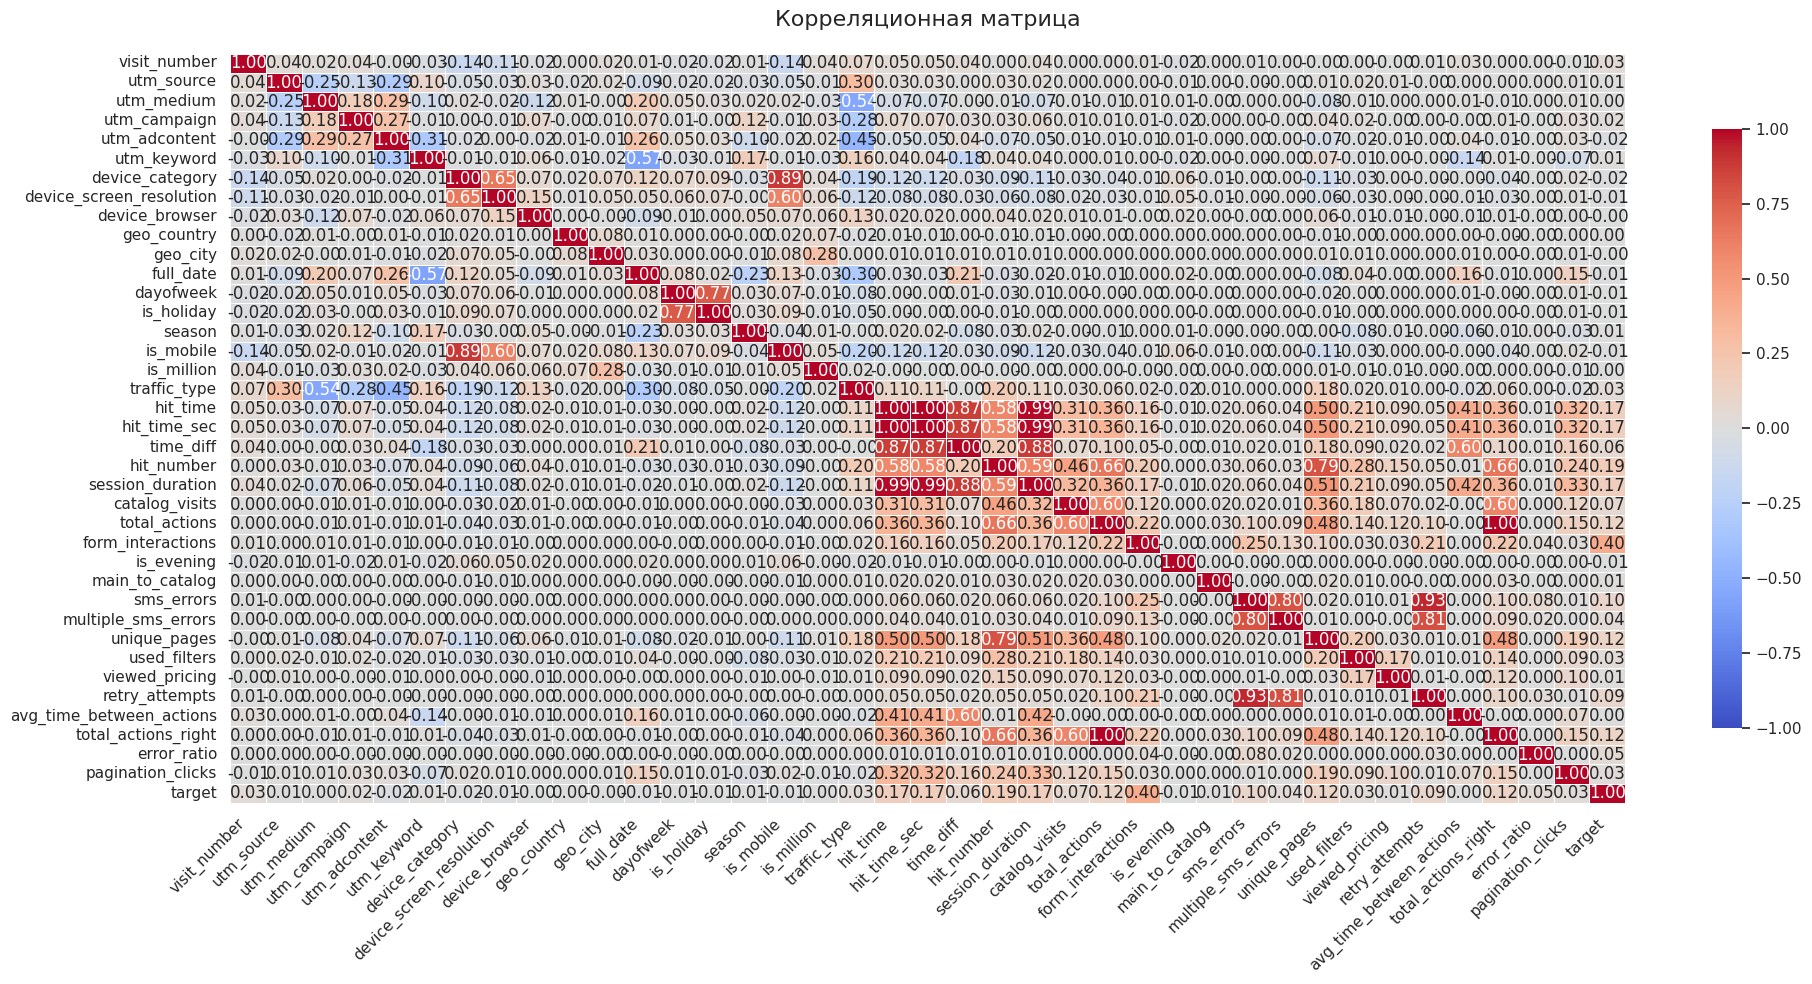

In [ ]:
# 1. Создаем корреляционную матрицу
corr_matrix = corr_analysis.corr()

# 2. Настраиваем размер графика
plt.figure(figsize=(20, 10))

# 3. Создаем тепловую карту
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,        # Показывать значения в ячейках
    fmt=".2f",        # Формат чисел (2 знака после запятой)
    cmap="coolwarm",  # Цветовая схема
    vmin=-1,          # Минимальное значение для шкалы
    vmax=1,           # Максимальное значение для шкалы
    center=0,         # Центр шкалы (0 для корреляции)
    square=False,      # Квадратные ячейки
    linewidths=.5,    # Ширина линий между ячейками
    cbar_kws={"shrink": .8}  # Настройки цветовой шкалы
)

# 4. Добавляем заголовок
plt.title("Корреляционная матрица", pad=20, fontsize=16)

# 5. Настраиваем подписи осей
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# 6. Улучшаем layout
plt.tight_layout()
plt.show()

In [ ]:
pandas_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1730384 entries, 1000010177899156286.1635013443.1635013443 to 999989480451054428.1634311006.1634311006
Data columns (total 43 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   client_id                 object        
 1   visit_date                object        
 2   visit_time                object        
 3   visit_number              int64         
 4   utm_source                object        
 5   utm_medium                object        
 6   utm_campaign              object        
 7   utm_adcontent             object        
 8   utm_keyword               object        
 9   device_category           object        
 10  device_screen_resolution  object        
 11  device_browser            object        
 12  geo_country               object        
 13  geo_city                  object        
 14  full_date                 datetime64[us]
 15  dayofweek                 int8  

In [ ]:
pandas_table["utm_keyword"].isna().sum()/len(pandas_table)
# Это мы дропаем

np.float64(0.5837438395177025)

In [ ]:
pandas_table[["is_holiday", "is_evening"]]

is_holiday  is_evening
session_id                                                       
1000010177899156286.1635013443.1635013443           1           1
1000013386240115915.1635402956.1635402956           0           0
1000017303238376207.1623489300.1623489300           1           0
1000020580299877109.1624943350.1624943350           0           0
1000020580299877109.1624972957.1624972957           0           0
...                                               ...         ...
99996598443387715.1626811203.1626811203             0           1
999966717128502952.1638428330.1638428330            0           0
999969216784562223.1623521327.1623521327            1           1
999988617151873171.1623556243.1623556243            1           0
999989480451054428.1634311006.1634311006            0           1

[1730384 rows x 2 columns]

In [ ]:
import numpy as np

threshold = 0.7
corr_matrix = corr_analysis.corr().abs()  # Берем абсолютные значения

# Выбор верхнего треугольника матрицы (без диагонали)
upper_triangle = np.triu(corr_matrix, k=1)

# Поиск индексов, где корреляция превышает порог
rows, cols = np.where(upper_triangle > threshold)

# Сбор результатов
high_corr_pairs = [
    (corr_matrix.index[row], corr_matrix.columns[col], corr_matrix.iloc[row, col].round(3))
    for row, col in zip(rows, cols)
]

# Вывод
if high_corr_pairs:
    print("Признаки с высокой корреляцией (>{}):".format(threshold))
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]}")
else:
    print("Нет пар с корреляцией > {}".format(threshold))

Признаки с высокой корреляцией (>0.7):
device_category - is_mobile: 0.887
dayofweek - is_holiday: 0.77
hit_time - hit_time_sec: 1.0
hit_time - time_diff: 0.869
hit_time - session_duration: 0.987
hit_time_sec - time_diff: 0.869
hit_time_sec - session_duration: 0.987
time_diff - session_duration: 0.88
hit_number - unique_pages: 0.793
total_actions - total_actions_right: 1.0
sms_errors - multiple_sms_errors: 0.796
sms_errors - retry_attempts: 0.933
multiple_sms_errors - retry_attempts: 0.81


In [ ]:
final_table.columns

['client_id',
 'visit_date',
 'visit_time',
 'visit_number',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'utm_keyword',
 'device_category',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'geo_city',
 'full_date',
 'dayofweek',
 'is_holiday',
 'season',
 'is_mobile',
 'is_million',
 'traffic_type',
 'hit_time',
 'hit_time_sec',
 'time_diff',
 'hit_number',
 'session_duration',
 'traffic_type_cat',
 'catalog_visits',
 'total_actions',
 'form_interactions',
 'is_evening',
 'main_to_catalog',
 'sms_errors',
 'multiple_sms_errors',
 'unique_pages',
 'used_filters',
 'viewed_pricing',
 'retry_attempts',
 'avg_time_between_actions',
 'total_actions_right',
 'error_ratio',
 'pagination_clicks',
 'target']

In [ ]:
final_table.select(
    pl.col("total_actions"),
    pl.col("total_actions_right")
)

shape: (1_730_384, 2)
┌───────────────┬─────────────────────┐
│ total_actions ┆ total_actions_right │
│ ---           ┆ ---                 │
│ u32           ┆ u32                 │
╞═══════════════╪═════════════════════╡
│ 36            ┆ 36                  │
│ 121           ┆ 121                 │
│ 144           ┆ 144                 │
│ 1             ┆ 1                   │
│ 1             ┆ 1                   │
│ …             ┆ …                   │
│ 4             ┆ 4                   │
│ 144           ┆ 144                 │
│ 1             ┆ 1                   │
│ 16            ┆ 16                  │
│ 1             ┆ 1                   │
└───────────────┴─────────────────────┘

In [ ]:
final_table = final_table.drop(
    pl.col("full_date"),
    pl.col("hit_time"),
    pl.col("total_actions_right"),
    pl.col("hit_time_sec"),
    pl.col("hit_number"),
    pl.col("traffic_type"),
    pl.col("total_actions_right"),
    pl.col("time_diff"),
    pl.col("dayofweek"),
    pl.col("device_category"),
    pl.col("sms_errors")
    )

In [ ]:
final_table.head(5)

shape: (5, 33)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ client_id  ┆ visit_date ┆ visit_tim ┆ visit_num ┆ … ┆ avg_time_ ┆ error_rat ┆ paginatio ┆ target │
│ ---        ┆ ---        ┆ e         ┆ ber       ┆   ┆ between_a ┆ io        ┆ n_clicks  ┆ ---    │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ ctions    ┆ ---       ┆ ---       ┆ i32    │
│            ┆            ┆ str       ┆ i64       ┆   ┆ ---       ┆ f64       ┆ u32       ┆        │
│            ┆            ┆           ┆           ┆   ┆ f64       ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 232833013. ┆ 2021-10-23 ┆ 21:24:03  ┆ 1         ┆ … ┆ 47.74     ┆ 0.0       ┆ 0         ┆ 0      │
│ 1635013438 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232833760. ┆ 2021-10-28 ┆ 09:35:56  ┆ 1         ┆ … ┆ 17.0554   ┆ 0.0       ┆ 0         ┆ 0      │
│ 1635402955 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232834672. ┆ 2021-06-12 ┆ 12:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1623489295 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232835435. ┆ 2021-06-29 ┆ 08:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1624943349 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232835435. ┆ 2021-06-29 ┆ 16:00:00  ┆ 2         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1624943349 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴────────┘

In [ ]:
pandas_table = final_table.to_pandas()
corr_analysis = pandas_table.drop(columns=['client_id', 'traffic_type_cat', 'visit_time', 'visit_date'])
corr_analysis['utm_source'] = le.fit_transform(pandas_table['utm_source'])
corr_analysis['utm_medium'] = le.fit_transform(pandas_table['utm_medium'])
corr_analysis['utm_campaign'] = le.fit_transform(pandas_table['utm_campaign'])
corr_analysis['utm_adcontent'] = le.fit_transform(pandas_table['utm_adcontent'])
corr_analysis['utm_keyword'] = le.fit_transform(pandas_table['utm_keyword'])
corr_analysis['device_browser'] = le.fit_transform(pandas_table['device_browser'])
corr_analysis['geo_country'] = le.fit_transform(pandas_table['geo_country'])
corr_analysis['geo_city'] = le.fit_transform(pandas_table['geo_city'])
corr_analysis['is_holiday'] = pandas_table['is_holiday']
corr_analysis['season'] = pandas_table['season']
corr_analysis['device_screen_resolution'] = le.fit_transform(pandas_table['device_screen_resolution'])

In [ ]:
corr_analysis

visit_number  utm_source  utm_medium  utm_campaign  utm_adcontent  \
0                   1         173           0            87             45   
1                   1         145           2           253             45   
2                   1         145           2            84             45   
3                   1         173           0            87             45   
4                   2         173           0            87             45   
...               ...         ...         ...           ...            ...   
1730379             1         145           2            84             45   
1730380             1         145           2            84            237   
1730381             1         173           0            87             45   
1730382             1         145           2            84             45   
1730383             1          76           2            40            255   

         utm_keyword  device_screen_resolution  device_browser  geo_country  \
0                968                      1860              45          100   
1                968                      3120               6          100   
2               1205                      1995               6          100   
3               1205                      3289              43          100   
4               1205                      3289              43          100   
...              ...                       ...             ...          ...   
1730379         1205                      2211              43          100   
1730380          968                      2709               6          100   
1730381         1205                      2261              43          100   
1730382         1205                      3060              45          100   
1730383         1205                      3864              49          100   

         geo_city  ...  main_to_catalog  multiple_sms_errors  unique_pages  \
0              87  ...              0.0                  0.0             2   
1              10  ...              0.0                  0.0             3   
2              19  ...              0.0                  0.0             3   
3              44  ...              0.0                  0.0             1   
4              44  ...              0.0                  0.0             1   
...           ...  ...              ...                  ...           ...   
1730379        65  ...              0.0                  0.0             1   
1730380        48  ...              0.0                  0.0             2   
1730381        44  ...              0.0                  0.0             1   
1730382         9  ...              0.0                  0.0             2   
1730383        91  ...              0.0                  0.0             1   

         used_filters  viewed_pricing  retry_attempts  \
0                   1               0               0   
1                   0               0               0   
2                   0               0               0   
3                   0               0               0   
4                   0               0               0   
...               ...             ...             ...   
1730379             0               0               0   
1730380             0               0               0   
1730381             0               0               0   
1730382             0               0               0   
1730383             0               0               0   

         avg_time_between_actions  error_ratio  pagination_clicks  target  
0                       47.740000          0.0                  0       0  
1                       17.055400          0.0                  0       0  
2                        0.000000          0.0                  0       0  
3                        0.000000          0.0                  0       0  
4                        0.000000          0.0                  0       0  
...                           ...          ..

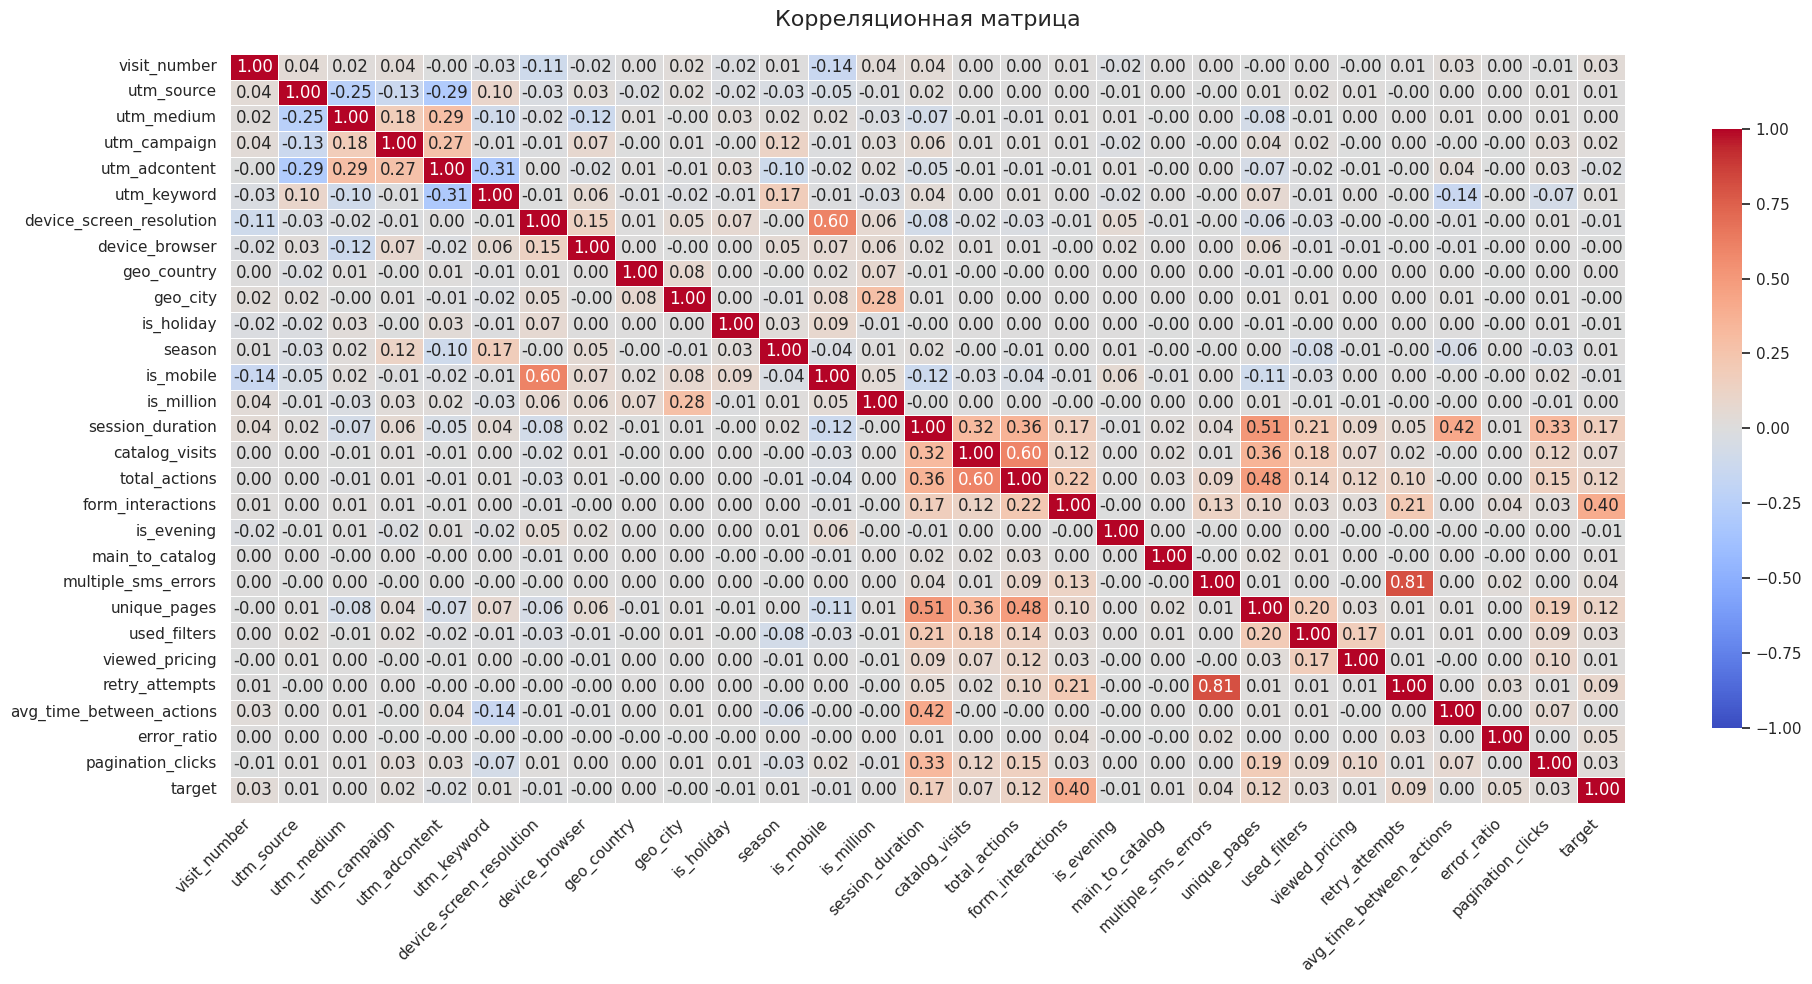

In [ ]:
# 1. Создаем корреляционную матрицу
corr_matrix = corr_analysis.corr()

# 2. Настраиваем размер графика
plt.figure(figsize=(20, 10))

# 3. Создаем тепловую карту
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,        # Показывать значения в ячейках
    fmt=".2f",        # Формат чисел (2 знака после запятой)
    cmap="coolwarm",  # Цветовая схема
    vmin=-1,          # Минимальное значение для шкалы
    vmax=1,           # Максимальное значение для шкалы
    center=0,         # Центр шкалы (0 для корреляции)
    square=False,      # Квадратные ячейки
    linewidths=.5,    # Ширина линий между ячейками
    cbar_kws={"shrink": .8}  # Настройки цветовой шкалы
)

# 4. Добавляем заголовок
plt.title("Корреляционная матрица", pad=20, fontsize=16)

# 5. Настраиваем подписи осей
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# 6. Улучшаем layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

threshold = 0.7
corr_matrix = corr_analysis.corr().abs()  # Берем абсолютные значения

# Выбор верхнего треугольника матрицы (без диагонали)
upper_triangle = np.triu(corr_matrix, k=1)

# Поиск индексов, где корреляция превышает порог
rows, cols = np.where(upper_triangle > threshold)

# Сбор результатов
high_corr_pairs = [
    (corr_matrix.index[row], corr_matrix.columns[col], corr_matrix.iloc[row, col].round(3))
    for row, col in zip(rows, cols)
]

# Вывод
if high_corr_pairs:
    print("Признаки с высокой корреляцией (>{}):".format(threshold))
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]}")
else:
    print("Нет пар с корреляцией > {}".format(threshold))

Признаки с высокой корреляцией (>0.7):
multiple_sms_errors - retry_attempts: 0.81


In [ ]:
threshold = 1000

# 1. Считаем частоту каждого значения в столбце
value_counts = final_table['utm_source'].value_counts()
print(f"Количество уникальных значений utm_source: {value_counts.shape[0]}")

# 2. Выбираем значения, которые встречаются ПОРОГ ИЛИ БОЛЬШЕ
valid_values = value_counts.filter(pl.col('count') >= threshold)['utm_source'].to_list()

# 3. Заменяем РЕДКИЕ значения на 'other'
final_table = final_table.with_columns(
    pl.when(~pl.col('utm_source').is_in(valid_values))  # <-- здесь инвертировано условие
      .then(pl.lit('other'))
      .otherwise(pl.col('utm_source'))
      .alias('utm_source')
)

Количество уникальных значений utm_source: 278


In [ ]:
threshold = 1000

# 1. Считаем частоту каждого значения в столбце
value_counts = final_table['device_browser'].value_counts()
print(f"Количество уникальных значений device_browser: {value_counts.shape[0]}")

# 2. Выбираем значения, которые встречаются ПОРОГ ИЛИ БОЛЬШЕ
valid_values = value_counts.filter(pl.col('count') >= threshold)['device_browser'].to_list()

# 3. Заменяем РЕДКИЕ значения на 'other'
final_table = final_table.with_columns(
    pl.when(~pl.col('device_browser').is_in(valid_values))  # <-- здесь инвертировано условие
      .then(pl.lit('other'))
      .otherwise(pl.col('device_browser'))
      .alias('device_browser')
)

Количество уникальных значений device_browser: 54


In [ ]:
threshold = 1000

# 1. Считаем частоту каждого значения в столбце
value_counts = final_table['geo_country'].value_counts()
print(f"Количество уникальных значений geo_country: {value_counts.shape[0]}")

# 2. Выбираем значения, которые встречаются ПОРОГ ИЛИ БОЛЬШЕ
valid_values = value_counts.filter(pl.col('count') >= threshold)['geo_country'].to_list()

# 3. Заменяем РЕДКИЕ значения на 'other'
final_table = final_table.with_columns(
    pl.when(~pl.col('geo_country').is_in(valid_values))  # <-- здесь инвертировано условие
      .then(pl.lit('other'))
      .otherwise(pl.col('geo_country'))
      .alias('geo_country')
)

Количество уникальных значений geo_country: 132


In [ ]:
final_table.write_parquet("/content/drive/MyDrive/mephi_ml/Hack/final_table.parquet")

In [ ]:
final_table["utm_source"].unique()

shape: (38,)
Series: 'utm_source' [str]
[
	"jaSOmLICuBzCFqHfBdRg"
	"KgicpPxiEQfzPlPwQZJq"
	"vFcAhRxLfOWKhvxjELkx"
	"bByPQxmDaMXgpHeypKSM"
	"nSReTmyFtbSjlPrTKoaX"
	…
	"iNFgfQPqHPBuvGCYtrQE"
	"IZEXUFLARCUMynmHNBGo"
	"MvfHsxITijuriZxsqZqt"
	"gDBGzjFKYabGgSPZvrDH"
	"aXQzDWsJuGXeBXexNHjc"
]

In [ ]:
final_table['geo_country'].value_counts().sort(by="count")

shape: (8, 2)
┌───────────────┬─────────┐
│ geo_country   ┆ count   │
│ ---           ┆ ---     │
│ str           ┆ u32     │
╞═══════════════╪═════════╡
│ (not set)     ┆ 1146    │
│ Ukraine       ┆ 1791    │
│ Sweden        ┆ 2238    │
│ Belarus       ┆ 2333    │
│ Ireland       ┆ 4030    │
│ other         ┆ 5637    │
│ United States ┆ 7903    │
│ Russia        ┆ 1705306 │
└───────────────┴─────────┘

In [ ]:
final_table.filter(
    pl.col("utm_source").is_in(["other"])
).head(5)

shape: (5, 33)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ client_id  ┆ visit_date ┆ visit_tim ┆ visit_num ┆ … ┆ avg_time_ ┆ error_rat ┆ paginatio ┆ target │
│ ---        ┆ ---        ┆ e         ┆ ber       ┆   ┆ between_a ┆ io        ┆ n_clicks  ┆ ---    │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ ctions    ┆ ---       ┆ ---       ┆ i32    │
│            ┆            ┆ str       ┆ i64       ┆   ┆ ---       ┆ f64       ┆ u32       ┆        │
│            ┆            ┆           ┆           ┆   ┆ f64       ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 232933842. ┆ 2021-05-24 ┆ 10:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1621842587 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 233272747. ┆ 2021-07-29 ┆ 22:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1627585782 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 233457329. ┆ 2021-08-08 ┆ 09:00:00  ┆ 2         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1628404779 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 23357469.1 ┆ 2021-07-18 ┆ 21:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 626634499  ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 233686612. ┆ 2021-07-15 ┆ 14:00:00  ┆ 2         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1626337858 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴────────┘

In [ ]:
final_table.head(5)

shape: (5, 33)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ client_id  ┆ visit_date ┆ visit_tim ┆ visit_num ┆ … ┆ avg_time_ ┆ error_rat ┆ paginatio ┆ target │
│ ---        ┆ ---        ┆ e         ┆ ber       ┆   ┆ between_a ┆ io        ┆ n_clicks  ┆ ---    │
│ str        ┆ str        ┆ ---       ┆ ---       ┆   ┆ ctions    ┆ ---       ┆ ---       ┆ i32    │
│            ┆            ┆ str       ┆ i64       ┆   ┆ ---       ┆ f64       ┆ u32       ┆        │
│            ┆            ┆           ┆           ┆   ┆ f64       ┆           ┆           ┆        │
╞════════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ 232833013. ┆ 2021-10-23 ┆ 21:24:03  ┆ 1         ┆ … ┆ 47.74     ┆ 0.0       ┆ 0         ┆ 0      │
│ 1635013438 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232833760. ┆ 2021-10-28 ┆ 09:35:56  ┆ 1         ┆ … ┆ 17.0554   ┆ 0.0       ┆ 0         ┆ 0      │
│ 1635402955 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232834672. ┆ 2021-06-12 ┆ 12:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1623489295 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232835435. ┆ 2021-06-29 ┆ 08:00:00  ┆ 1         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1624943349 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
│ 232835435. ┆ 2021-06-29 ┆ 16:00:00  ┆ 2         ┆ … ┆ 0.0       ┆ 0.0       ┆ 0         ┆ 0      │
│ 1624943349 ┆            ┆           ┆           ┆   ┆           ┆           ┆           ┆        │
└────────────┴────────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴────────┘